<a href="https://colab.research.google.com/github/owenchoi96/templates/blob/master/%EB%A1%AC%EC%95%A4_%EB%85%B8%EC%B6%9C%EC%98%88%EC%B8%A1_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# 이외
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 결측치 채우기 알고리즘
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 푸리에 변환 라이브러리
from scipy.fft import fft
from scipy.signal import welch

# 시간 데이터 수정하기 위한 라이브러리
from datetime import timedelta

# 이후 푸리에 변환 결과 유사성을 계산하는데 소수점이 너무 김
pd.options.display.float_format = '{:.5f}'.format

# Data

> Impression Data (train data)

In [ ]:
# # 노출, 예측
# impression= [173463,144376,147818,163796,171595,173917,149934,140660,161928,144536,149647,147579,152413,142914,160556,184998,167564,172784,172127,184513,193216,212800,204664,233076,250209,241517,213173,211756,206892,206673,204463,221839,233751,429857,392950,419294,400023,336754,321650,344546,277173,274197,288394,288394,298209,174558,197213,180516,145733,162727,156576,169827,148070,150835,191881,211999,212367,282828,245631,264089,162799,116641,122261,131298,127175,128036,122244,136791,190881,178313,193980,206596,183455,160850,167222,194605,188920,187123,169932,201504,221868,198138,182356,183952,203086,209091,208615,182634,188654,156328,169581,198977,187639,189245,197116,235008,364742,395127,445323,383147,192651,102714,105439,103737,111878,126516,117926,110850,80785,75386,85153,105290,108255,118235,104492,109690,116636,111468,117116,126143,150998,207456,169919,180839,213875,206588,227623,198463,169552,123700,108724,112136,98989,123730,120224,105257,101280,100321,98476,88641,100967,90838,119448,118638,146900,145545,148701,149262,158580,141839,212018,177318,166368,175810,180297,172307,161436,134200,139022,135365,106021,105818,116573,121967,138702,191534,145400,158795,151618,185616,157856,177787,183611,166706,159096,169187,168844,132721,111394,77922,72857,154273,138126,158178,156196,126931,110272,109805,103935,111655,106292,113368,116573,115897,111822,106491,103467,106702,101352,99195,91199,101051,112677,120730,131064,119920,117875,132228,133119,124329,148220,158385,105919,98990,94156,101803,103206,108657,63876,72169,73217,82877,76106,71475,81337,90097,83857,75394,92406,99010,101057,96574,91113,82046,74878,76718,78224,86316,95546,94934,101938,132798,123215,37417,0,0,0,41099,46432,59141,63812,67044,63878,84703,99158,104961,103848,96702,107053,119926,132520,117342,115640,88609,82709,94254,101554,108745,110642,127478,129219,165494,145178,164472,152073,137697,88904,125386,128390,169366,171850,165923,165534,126574,96405,79860,94036,119893,144787,214852,208088,207583,221030,224984,257949,230367,215064,171345,104616,101050,114350,126360,117980,89618,108048,116859,126620,144727,94644,136553,127010,127168,102940,58446,65340,68896,77439,66807,59422,65573,73983,71133,66537,60045,61165,55354,130096,136900,154199,163296,154744,148852,147085,167976,70141,67640,77601,72747,68073,61344,57706,148947,154202,184517,140554,101368,83579,85539,170804,227721,233740,235173,210978,219984,168222,146921,148548,146375,160907,160425,154112,169825,213181,230758,272407]
# cost= [476526,460931,546302,605501,624212,633664,647766,692363,666307,639525,634077,626842,638053,652833,687884,645336,643226,636620,715947,832396,851554,898446,871717,835773,828285,822166,861585,832028,897387,862019,833959,827848,944390,1616603,1670567,1738634,1575459,1429137,1344138,1308634,1178138,1175723,1265562,1143667,1036333,851711,821029,708102,652923,686588,660073,640801,577205,576029,758295,1075815,1157434,1188269,1263575,1274632,1087455,1047086,1067231,1103821,1059167,1032264,1026324,922401,1149860,1175961,1214691,1160615,1140645,1174625,1167858,1188974,1214313,1264154,1219061,1179489,1179466,1165386,1183517,1208927,1263564,1215074,1179252,1176839,1166795,940179,755413,785776,758094,738827,745050,744012,733151,629211,682021,655577,692636,781366,776115,787457,803309,841433,806017,784245,591317,482913,550388,639910,694760,661794,643619,638459,631251,635703,644414,682337,783134,1034803,1026069,1030316,1038307,1054964,1107048,953846,878682,627833,532155,537321,554041,579642,552266,537553,540852,539134,544592,555961,548853,488308,768007,789336,799277,774981,765426,761979,762610,697657,1068747,1002727,971005,967778,1024031,984663,982911,1010782,1032985,985058,979570,1049832,1018906,985152,1099860,1315528,1329332,1348433,1416684,1381856,1333857,1393505,1461664,1364977,1341915,1417714,1265805,1020197,1033856,927232,891589,1259561,1300753,1270638,1235608,1230137,1215832,1224356,1248868,1300931,1272388,1321315,1570058,1569352,1572921,1593245,1685386,1637104,1387665,1362234,1362664,1485111,1566307,1684234,1627048,1581460,1567077,1563503,1563272,1637253,1865375,1833861,740356,736664,733573,739438,750187,787726,540052,612624,606148,609807,612790,628248,630785,595318,557186,553824,666301,674968,677044,696581,653997,517173,488561,489785,523259,647792,676801,640934,609876,956950,943900,270944,0,0,0,468177,394486,376716,385056,491065,521879,603881,768445,866451,970558,1011047,1065398,1106801,1062897,1005598,975191,848536,840430,880815,914871,892658,851388,698123,685687,692888,703347,747964,723479,706623,511404,688127,674448,688121,733155,709652,693097,687779,633368,555889,564283,591633,871982,1538233,1591643,1558912,1603284,1622783,1675429,1644571,1589722,1186894,627127,631077,643753,680904,628245,594166,609985,633628,720279,805690,591871,716635,678393,674298,625302,371843,349922,377877,485645,428318,393165,384623,391353,401459,398860,386594,374045,369869,896342,1198113,1189014,1256274,1141533,1057956,1035200,1048169,590039,566964,629937,578798,541025,516456,456810,1127919,1141897,1070129,880074,665838,554813,576982,1025244,1195712,1268333,1239862,1179629,1174376,994275,954959,978269,1021125,988068,949803,929556,1066071,1333824,1378142,1440310]

# # 날짜
# train_date = pd.to_datetime(pd.date_range('2023-01', '2023-12-31'))

# # 데이터프레임화
# train_raw_df = pd.DataFrame({'date' : train_date, 'impression' : impression, 'cost': cost})

# # 데이터 카피
# train_romand_df = train_raw_df.copy()
# train_romand_df.head()

# train_df = train_romand_df.iloc[:, [0,1]]
# train_df.head()

In [3]:
impression= [173463,144376,147818,163796,171595,173917,149934,140660,161928,144536,149647,147579,152413,142914,160556,184998,167564,172784,172127,184513,193216,212800,204664,233076,250209,241517,213173,211756,206892,206673,204463,221839,233751,429857,392950,419294,400023,336754,321650,344546,277173,274197,288394,288394,298209,174558,197213,180516,145733,162727,156576,169827,148070,150835,191881,211999,212367,282828,245631,264089,162799,116641,122261,131298,127175,128036,122244,136791,190881,178313,193980,206596,183455,160850,167222,194605,188920,187123,169932,201504,221868,198138,182356,183952,203086,209091,208615,182634,188654,156328,169581,198977,187639,189245,197116,235008,364742,395127,445323,383147,192651,102714,105439,103737,111878,126516,117926,110850,80785,75386,85153,105290,108255,118235,104492,109690,116636,111468,117116,126143,150998,207456,169919,180839,213875,206588,227623,198463,169552,123700,108724,112136,98989,123730,120224,105257,101280,100321,98476,88641,100967,90838,119448,118638,146900,145545,148701,149262,158580,141839,212018,177318,166368,175810,180297,172307,161436,134200,139022,135365,106021,105818,116573,121967,138702,191534,145400,158795,151618,185616,157856,177787,183611,166706,159096,169187,168844,132721,111394,77922,72857,154273,138126,158178,156196,126931,110272,109805,103935,111655,106292,113368,116573,115897,111822,106491,103467,106702,101352,99195,91199,101051,112677,120730,131064,119920,117875,132228,133119,124329,148220,158385,105919,98990,94156,101803,103206,108657,63876,72169,73217,82877,76106,71475,81337,90097,83857,75394,92406,99010,101057,96574,91113,82046,74878,76718,78224,86316,95546,94934,101938,132798,123215,37417,0,0,0,41099,46432,59141,63812,67044,63878,84703,99158,104961,103848,96702,107053,119926,132520,117342,115640,88609,82709,94254,101554,108745,110642,127478,129219,165494,145178,164472,152073,137697,88904,125386,128390,169366,171850,165923,165534,126574,96405,79860,94036,119893,144787,214852,208088,207583,221030,224984,257949,230367,215064,171345,104616,101050,114350,126360,117980,89618,108048,116859,126620,144727,94644,136553,127010,127168,102940,58446,65340,68896,77439,66807,59422,65573,73983,71133,66537,60045,61165,55354,130096,136900,154199,163296,154744,148852,147085,167976,70141,67640,77601,72747,68073,61344,57706,148947,154202,184517,140554,101368,83579,85539,170804,227721,233740,235173,210978,219984,168222,146921,148548,146375,160907,160425,154112,169825,213181,230758,272407]
cost= [476526,460931,546302,605501,624212,633664,647766,692363,666307,639525,634077,626842,638053,652833,687884,645336,643226,636620,715947,832396,851554,898446,871717,835773,828285,822166,861585,832028,897387,862019,833959,827848,944390,1616603,1670567,1738634,1575459,1429137,1344138,1308634,1178138,1175723,1265562,1143667,1036333,851711,821029,708102,652923,686588,660073,640801,577205,576029,758295,1075815,1157434,1188269,1263575,1274632,1087455,1047086,1067231,1103821,1059167,1032264,1026324,922401,1149860,1175961,1214691,1160615,1140645,1174625,1167858,1188974,1214313,1264154,1219061,1179489,1179466,1165386,1183517,1208927,1263564,1215074,1179252,1176839,1166795,940179,755413,785776,758094,738827,745050,744012,733151,629211,682021,655577,692636,781366,776115,787457,803309,841433,806017,784245,591317,482913,550388,639910,694760,661794,643619,638459,631251,635703,644414,682337,783134,1034803,1026069,1030316,1038307,1054964,1107048,953846,878682,627833,532155,537321,554041,579642,552266,537553,540852,539134,544592,555961,548853,488308,768007,789336,799277,774981,765426,761979,762610,697657,1068747,1002727,971005,967778,1024031,984663,982911,1010782,1032985,985058,979570,1049832,1018906,985152,1099860,1315528,1329332,1348433,1416684,1381856,1333857,1393505,1461664,1364977,1341915,1417714,1265805,1020197,1033856,927232,891589,1259561,1300753,1270638,1235608,1230137,1215832,1224356,1248868,1300931,1272388,1321315,1570058,1569352,1572921,1593245,1685386,1637104,1387665,1362234,1362664,1485111,1566307,1684234,1627048,1581460,1567077,1563503,1563272,1637253,1865375,1833861,740356,736664,733573,739438,750187,787726,540052,612624,606148,609807,612790,628248,630785,595318,557186,553824,666301,674968,677044,696581,653997,517173,488561,489785,523259,647792,676801,640934,609876,956950,943900,270944,0,0,0,468177,394486,376716,385056,491065,521879,603881,768445,866451,970558,1011047,1065398,1106801,1062897,1005598,975191,848536,840430,880815,914871,892658,851388,698123,685687,692888,703347,747964,723479,706623,511404,688127,674448,688121,733155,709652,693097,687779,633368,555889,564283,591633,871982,1538233,1591643,1558912,1603284,1622783,1675429,1644571,1589722,1186894,627127,631077,643753,680904,628245,594166,609985,633628,720279,805690,591871,716635,678393,674298,625302,371843,349922,377877,485645,428318,393165,384623,391353,401459,398860,386594,374045,369869,896342,1198113,1189014,1256274,1141533,1057956,1035200,1048169,590039,566964,629937,578798,541025,516456,456810,1127919,1141897,1070129,880074,665838,554813,576982,1025244,1195712,1268333,1239862,1179629,1174376,994275,954959,978269,1021125,988068,949803,929556,1066071,1333824,1378142,1440310]

preprocessed_train_df = pd.DataFrame({'impression' : impression, 'cost': cost})
preprocessed_train_df = preprocessed_train_df.drop([244, 245, 246], axis=0).reset_index(drop=True)
preprocessed_train_df['date'] = pd.to_datetime(pd.date_range('2023-01', '2023-12-28'))

train_romand_df = preprocessed_train_df.copy()

train_df = train_romand_df.iloc[:, [0,2]]
train_df.tail()

,impression,date
357,154112,2023-12-24
358,169825,2023-12-25
359,213181,2023-12-26
360,230758,2023-12-27
361,272407,2023-12-28


> Test Data

In [ ]:
# # 노출, 예측
# test_impression= [324806,191442,145994,106327,135649,130241,147150,153791,213267,210222,217631,216318,228532,269159,164079,131231,129573,152286,271534,223735,175456,174653]
# test_cost= [1388231,1105252,840829,638092,685686,705129,751806,784625,1042097,1038596,1042438,1059959,1096939,1123038,852042,734928,734876,954348,1332620,930374,731296,785857]

# # 날짜
# test_date = pd.to_datetime(pd.date_range('2024-01', '2024-01-22'))

# # 데이터프레임화
# test_raw_df = pd.DataFrame({'date' : test_date, 'impression' : test_impression, 'cost': test_cost})
# test_romand_df = test_raw_df.copy()


# test_df = test_romand_df.iloc[:, [0,1]]
# test_df.head()

In [4]:
test_impression= [324806,191442,145994,106327,135649,130241,147150,153791,213267,210222,217631,216318,228532,269159,164079,131231,129573,152286,271534,223735,175456,174653]
test_cost= [1388231,1105252,840829,638092,685686,705129,751806,784625,1042097,1038596,1042438,1059959,1096939,1123038,852042,734928,734876,954348,1332620,930374,731296,785857]

preprocessed_test_df = pd.DataFrame({'impression' : test_impression, 'cost': test_cost})
preprocessed_test_df['date'] = pd.to_datetime(pd.date_range('2023-12-29', '2024-01-19'))
preprocessed_test_df.tail()

test_romand_df = preprocessed_test_df.copy()

test_df = test_romand_df.iloc[:, [0,2]]
test_df.head()

,impression,date
0,324806,2023-12-29
1,191442,2023-12-30
2,145994,2023-12-31
3,106327,2024-01-01
4,135649,2024-01-02


# 전처리

## Feature Engineering

In [ ]:
def fe_with_impression_and_cost(train_romand_df: pd.Series):
  # 날짜
  train_romand_df['month'] = train_romand_df['date'].dt.month
  train_romand_df['day'] = train_romand_df['date'].dt.day
  train_romand_df['dayofweek'] = train_romand_df['date'].dt.dayofweek
  train_romand_df['week'] = train_romand_df['date'].dt.week

  # 연도별 impression 비율
  train_romand_df['sum_impression_by_year'] = train_romand_df['impression'].sum()
  train_romand_df['ratio_impression_by_year'] = train_romand_df['impression']/train_romand_df['sum_impression_by_year']

  # 월별 impression 비율
  sum_df_1 = train_romand_df.groupby(['month'])['impression'].sum().reset_index()
  sum_df_1.columns = ['month', 'sum_impression_by_month'] # 여기서 월별 노출량 합계 들어감 --> 이후에 원래 시트에서 빼줘야됨
  train_romand_df = train_romand_df.merge(sum_df_1, how='left', on='month')
  train_romand_df['ratio_impression_by_month'] = train_romand_df['impression']/train_romand_df['sum_impression_by_month']

  # 연도별 cost 비율
  train_romand_df['sum_cost_by_year'] = train_romand_df['cost'].sum()
  train_romand_df['ratio_cost_by_year'] = train_romand_df['cost']/train_romand_df['sum_cost_by_year']

  # 월별 cost 비율
  sum_df_2 = train_romand_df.groupby(['month'])['cost'].sum().reset_index()
  sum_df_2.columns = ['month', 'sum_cost_by_month'] # 여기서 월별 지출비용 합계 들어감 --> 이후에 원래 시트에서 빼줘야 함
  train_romand_df = train_romand_df.merge(sum_df_2, how='left', on='month')
  train_romand_df['ratio_cost_by_month'] = train_romand_df['cost']/train_romand_df['sum_cost_by_month']

  # 월별 impression의 variance, standard deviation
  var_impression_by_month_df = train_romand_df.groupby(['month'])['impression'].var().reset_index()
  var_impression_by_month_df.columns = ['month', 'var_impression_by_month']
  std_impression_by_month_df = train_romand_df.groupby(['month'])['impression'].std().reset_index()
  std_impression_by_month_df.columns = ['month', 'std_impression_by_month']

  train_romand_df = train_romand_df.merge(var_impression_by_month_df, on='month', how='left')
  train_romand_df = train_romand_df.merge(std_impression_by_month_df, on='month', how='left')

  # 월별 cost의 variance, standard deviation
  var_cost_by_month_df = train_romand_df.groupby(['month'])['cost'].var().reset_index()
  var_cost_by_month_df.columns = ['month', 'var_cost_by_month']
  std_cost_by_month_df = train_romand_df.groupby(['month'])['cost'].std().reset_index()
  std_cost_by_month_df.columns = ['month', 'std_cost_by_month']

  train_romand_df = train_romand_df.merge(var_cost_by_month_df, on='month', how='left')
  train_romand_df = train_romand_df.merge(std_cost_by_month_df, on='month', how='left')

  # 월별 min, max 노출
  min_impression_by_month_df = train_romand_df.groupby(['month'])['impression'].min().reset_index()
  min_impression_by_month_df.columns = ['month', 'min_impression_by_month']
  max_impression_by_month_df = train_romand_df.groupby(['month'])['impression'].max().reset_index()
  max_impression_by_month_df.columns = ['month', 'max_impression_by_month']

  train_romand_df = train_romand_df.merge(min_impression_by_month_df, how='left', on='month')
  train_romand_df = train_romand_df.merge(max_impression_by_month_df, how='left', on='month')

  # 월별 min, max 지출비용
  min_cost_by_month_df = train_romand_df.groupby(['month'])['cost'].min().reset_index()
  min_cost_by_month_df.columns = ['month', 'min_cost_by_month']
  max_cost_by_month_df = train_romand_df.groupby(['month'])['cost'].max().reset_index()
  max_cost_by_month_df.columns = ['month', 'max_cost_by_month']

  train_romand_df = train_romand_df.merge(min_cost_by_month_df, how='left', on='month')
  train_romand_df = train_romand_df.merge(max_cost_by_month_df, how='left', on='month')

  # --- skew부터 진행 필요 --
  # 월별 노출 skew 값
  skew_impression_by_month_df = train_romand_df.groupby(['month'])['impression'].skew().reset_index()
  skew_impression_by_month_df.columns = ['month', 'skew_impression_by_month']

  train_romand_df = train_romand_df.merge(skew_impression_by_month_df, how='left', on='month')

  # 월별 지출비용 skew 값
  skew_cost_by_month_df = train_romand_df.groupby(['month'])['cost'].skew().reset_index()
  skew_cost_by_month_df.columns = ['month', 'skew_cost_by_month']

  # 노출량 kurtosis
  for m in range(1, 12+1):
    train_romand_df.loc[train_romand_df['month'] == m, 'kurtosis_impression_by_month'] = train_romand_df[train_romand_df['month'] == m]['impression'].kurt()

  # 지출비용 kurtosis
  for m in range(1, 12+1):
    train_romand_df.loc[train_romand_df['month'] == m, 'kurtosis_cost_by_month'] = train_romand_df[train_romand_df['month'] == m]['cost'].kurt()

  # 월별 노출 평균값, 중앙값
  mean_impression_by_month_df = train_romand_df.groupby(['month'])['impression'].mean().reset_index()
  mean_impression_by_month_df.columns = ['month', 'mean_impression_by_month']

  median_impression_by_month_df = train_romand_df.groupby(['month'])['impression'].median().reset_index()
  median_impression_by_month_df.columns = ['month', 'median_impression_by_month']

  train_romand_df = train_romand_df.merge(mean_impression_by_month_df, how='left', on='month')
  train_romand_df = train_romand_df.merge(median_impression_by_month_df, how='left', on='month')

  # 월별 지출비용 평균값, 중앙값
  mean_cost_by_month_df = train_romand_df.groupby(['month'])['cost'].mean().reset_index()
  mean_cost_by_month_df.columns = ['month', 'mean_cost_by_month']

  median_cost_by_month_df = train_romand_df.groupby(['month'])['cost'].median().reset_index()
  median_cost_by_month_df.columns = ['month', 'median_cost_by_month']

  train_romand_df = train_romand_df.merge(mean_cost_by_month_df, how='left', on='month')
  train_romand_df = train_romand_df.merge(median_cost_by_month_df, how='left', on='month')

  # 주별 impression 비율
  sum_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].sum().reset_index()
  sum_impression_by_week_df.columns = ['week', 'sum_impression_by_week']

  train_romand_df = train_romand_df.merge(sum_impression_by_week_df, on='week', how='left')
  train_romand_df['ratio_impression_by_week'] = train_romand_df['impression']/train_romand_df['sum_impression_by_week']

  # 주별 cost 비율
  sum_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].sum().reset_index()
  sum_cost_by_week_df.columns = ['week', 'sum_cost_by_week']

  train_romand_df = train_romand_df.merge(sum_cost_by_week_df, on='week', how='left')
  train_romand_df['ratio_cost_by_week'] = train_romand_df['cost']/train_romand_df['sum_cost_by_week']

  # 주별 mean 값
  mean_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].mean().reset_index()
  mean_impression_by_week_df.columns = ['week', 'mean_impression_by_week']

  mean_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].mean().reset_index()
  mean_cost_by_week_df.columns = ['week', 'mean_cost_by_week']

  train_romand_df = train_romand_df.merge(mean_impression_by_week_df, on='week', how='left')
  train_romand_df = train_romand_df.merge(mean_cost_by_week_df, on='week', how='left')

  # 주별 median 값
  median_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].median().reset_index()
  median_impression_by_week_df.columns = ['week', 'median_impression_by_week']

  median_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].median().reset_index()
  median_cost_by_week_df.columns = ['week', 'median_cost_by_week']

  train_romand_df = train_romand_df.merge(median_impression_by_week_df, on='week', how='left')
  train_romand_df = train_romand_df.merge(median_cost_by_week_df, on='week', how='left')

  # 주별 variance
  var_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].var().reset_index()
  var_impression_by_week_df.columns = ['week', 'var_impression_by_week']

  var_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].var().reset_index()
  var_cost_by_week_df.columns = ['week', 'var_cost_by_week']

  train_romand_df = train_romand_df.merge(var_impression_by_week_df, on='week', how='left')
  train_romand_df = train_romand_df.merge(var_cost_by_week_df, on='week', how='left')

  # 주별 standard deviation
  std_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].std().reset_index()
  std_impression_by_week_df.columns = ['week', 'std_impression_by_week']

  std_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].std().reset_index()
  std_cost_by_week_df.columns = ['week', 'std_cost_by_week']

  train_romand_df = train_romand_df.merge(std_impression_by_week_df, on='week', how='left')
  train_romand_df = train_romand_df.merge(std_cost_by_week_df, on='week', how='left')

  # 주별 min
  min_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].min().reset_index()
  min_impression_by_week_df.columns = ['week', 'min_impression_by_week']

  min_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].min().reset_index()
  min_cost_by_week_df.columns = ['week', 'min_cost_by_week']

  train_romand_df = train_romand_df.merge(min_impression_by_week_df, on='week', how='left')
  train_romand_df = train_romand_df.merge(min_cost_by_week_df, on='week', how='left')

  # 주별 max
  max_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].max().reset_index()
  max_impression_by_week_df.columns = ['week', 'max_impression_by_week']

  max_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].max().reset_index()
  max_cost_by_week_df.columns = ['week', 'max_cost_by_week']

  train_romand_df = train_romand_df.merge(max_impression_by_week_df, on='week', how='left')
  train_romand_df = train_romand_df.merge(max_cost_by_week_df, on='week', how='left')

  # 주별 skew
  skew_impression_by_week_df = train_romand_df.groupby(['week'])['impression'].skew().reset_index()
  skew_impression_by_week_df.columns = ['week', 'skew_impression_by_week']

  skew_cost_by_week_df = train_romand_df.groupby(['week'])['cost'].skew().reset_index()
  skew_cost_by_week_df.columns = ['week', 'skew_cost_by_week']

  train_romand_df = train_romand_df.merge(skew_impression_by_week_df, on='week', how='left')
  train_romand_df = train_romand_df.merge(skew_cost_by_week_df, on='week', how='left')

  # 노출량 kurtosis
  for i in range(1, 52+1):
    train_romand_df.loc[train_romand_df['week'] == i, 'kurtosis_impression_by_week'] = train_romand_df[train_romand_df['week'] == i]['impression'].kurt()

  # 지출비용 kurtosis
  for j in range(1, 52+1):
    train_romand_df.loc[train_romand_df['week'] == j, 'kurtosis_cost_by_week'] = train_romand_df[train_romand_df['week'] == j]['cost'].kurt()

  return train_romand_df

## 푸리에 함수

In [6]:
def fft_media_expect(data1: list, data2: list):

  # data1 --> 변하는 데이터
  # data2 --> 안 변하는 데이터

  # -- 선형 유사성 --
  similarity = np.corrcoef(data1, data2)[0, 1]
  similarity_percent = similarity * 100

  # 푸리에 변환 수행
  fft_data1 = fft(data1)
  fft_data2 = fft(data2)

  # -- 푸리에 유사성 --
  fft_similarity = np.corrcoef(fft_data1[1:], fft_data2[1:])[0, 1]
  fft_similarity_percent = abs(fft_similarity) * 100

  # 주파수와 PSD를 계산합니다.
  frequencies, psd1 = welch(data1, nperseg=len(data1), scaling='spectrum')  # PSD 계산 (data1)
  _, psd2 = welch(data2, nperseg=len(data2), scaling='spectrum')           # PSD 계산 (data2)

  # 0번 값을 제외합니다.
  frequencies = frequencies[1:]
  psd1 = psd1[1:]
  psd2 = psd2[1:]

  # -- PSD 유사성 --
  correlation = np.corrcoef(psd1, psd2)[0, 1]
  similarity_psd = correlation * 100

  # print('선형 유사성: {}, FFT 유사성: {}, PSD 유사성: {}'.format(round(similarity*100, 2), round(fft_similarity*100, 2), round(correlation*100, 2)))
  return similarity, fft_similarity, correlation



## Conversion

  0%|          | 0/22 [00:00<?, ?it/s]

fft가 가장 높았던 포인트의 인덱스 -->  0
그때의 선형 유사도: 1.00000, FFT 유사도: 1.00000, PSD 유사도: nan


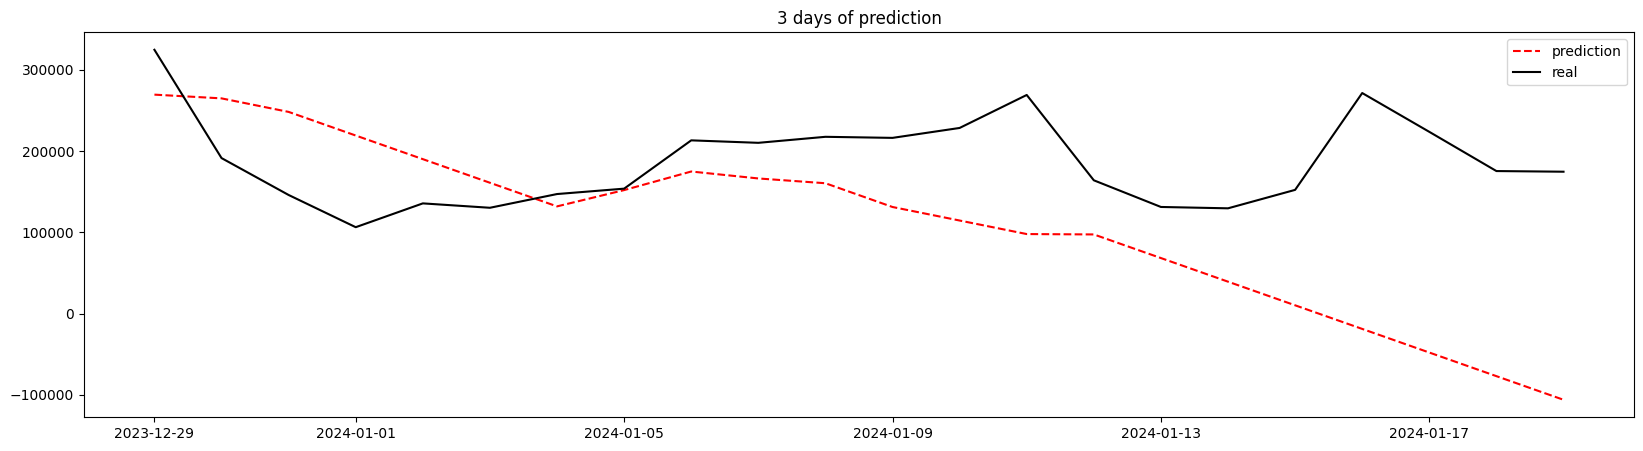

fft가 가장 높았던 포인트의 인덱스 -->  168
그때의 선형 유사도: 0.99903, FFT 유사도: 1.00000, PSD 유사도: 1.00000


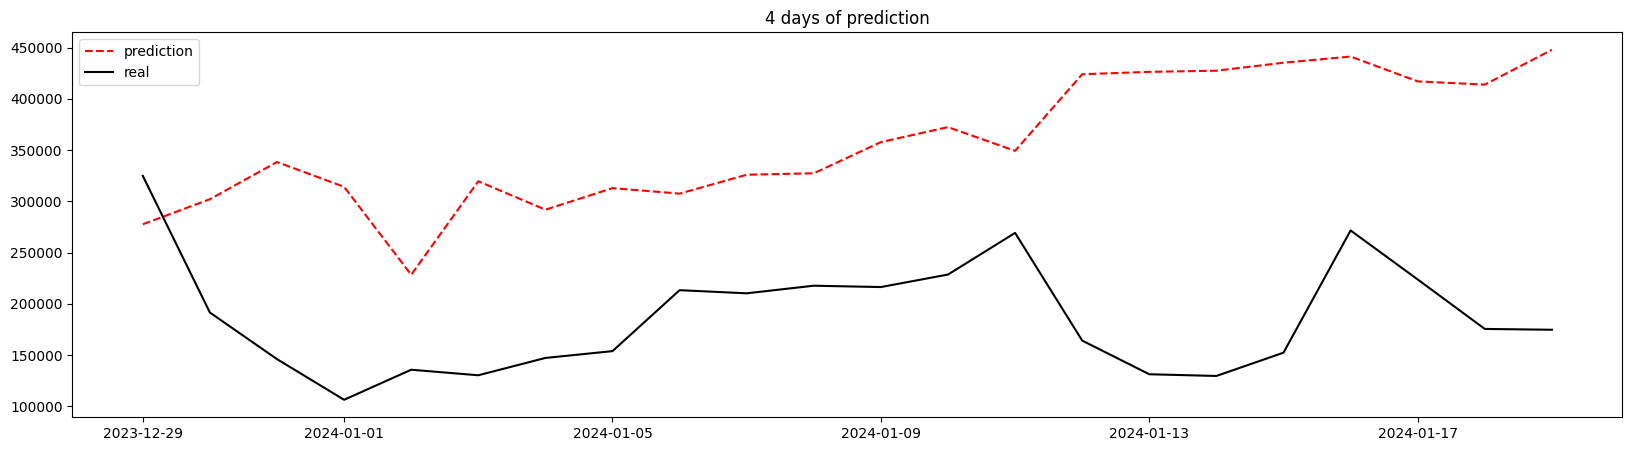

fft가 가장 높았던 포인트의 인덱스 -->  227
그때의 선형 유사도: 0.19150, FFT 유사도: 0.97986, PSD 유사도: 1.00000


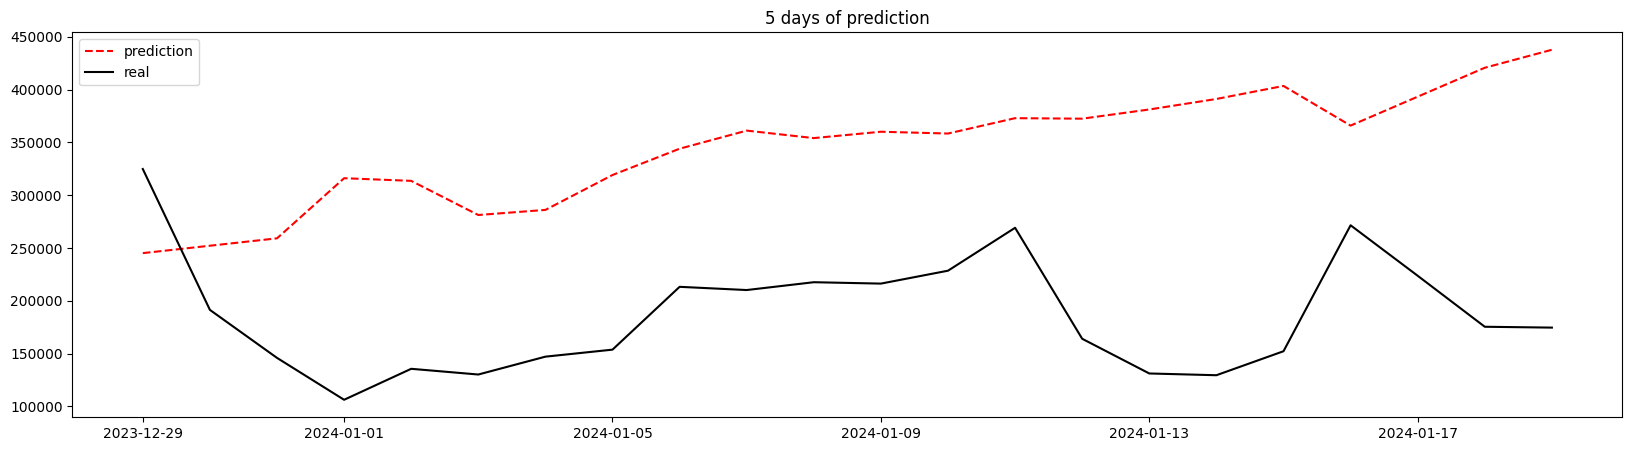

fft가 가장 높았던 포인트의 인덱스 -->  73
그때의 선형 유사도: 0.66871, FFT 유사도: 0.95175, PSD 유사도: 0.85180


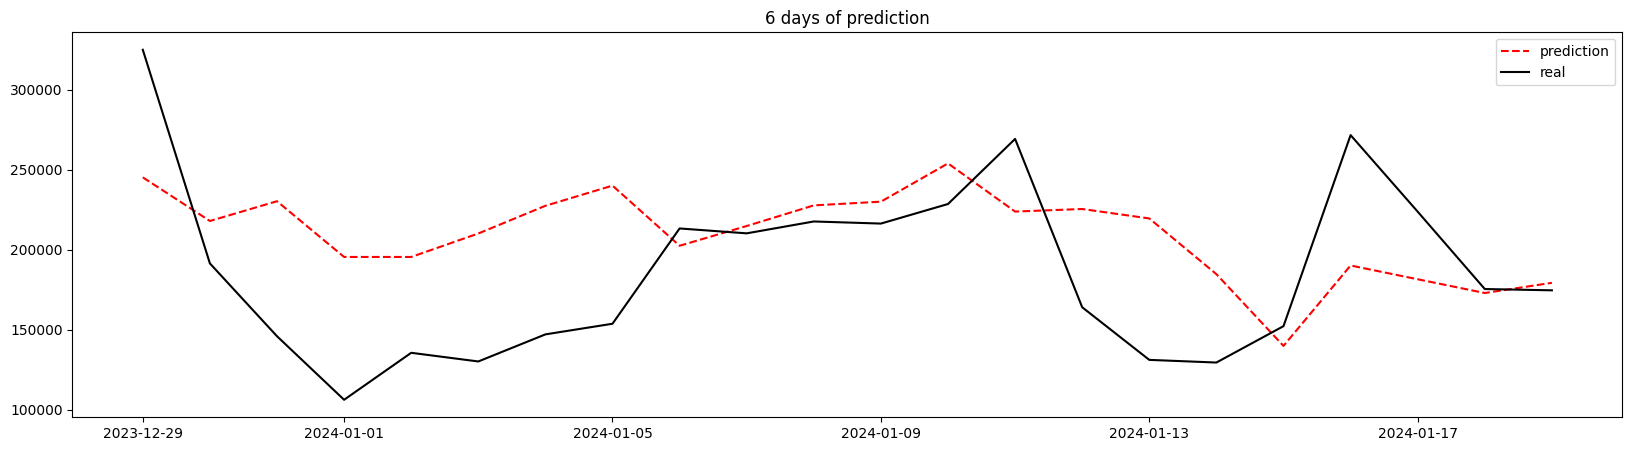

fft가 가장 높았던 포인트의 인덱스 -->  299
그때의 선형 유사도: 0.82721, FFT 유사도: 0.96778, PSD 유사도: 0.85010


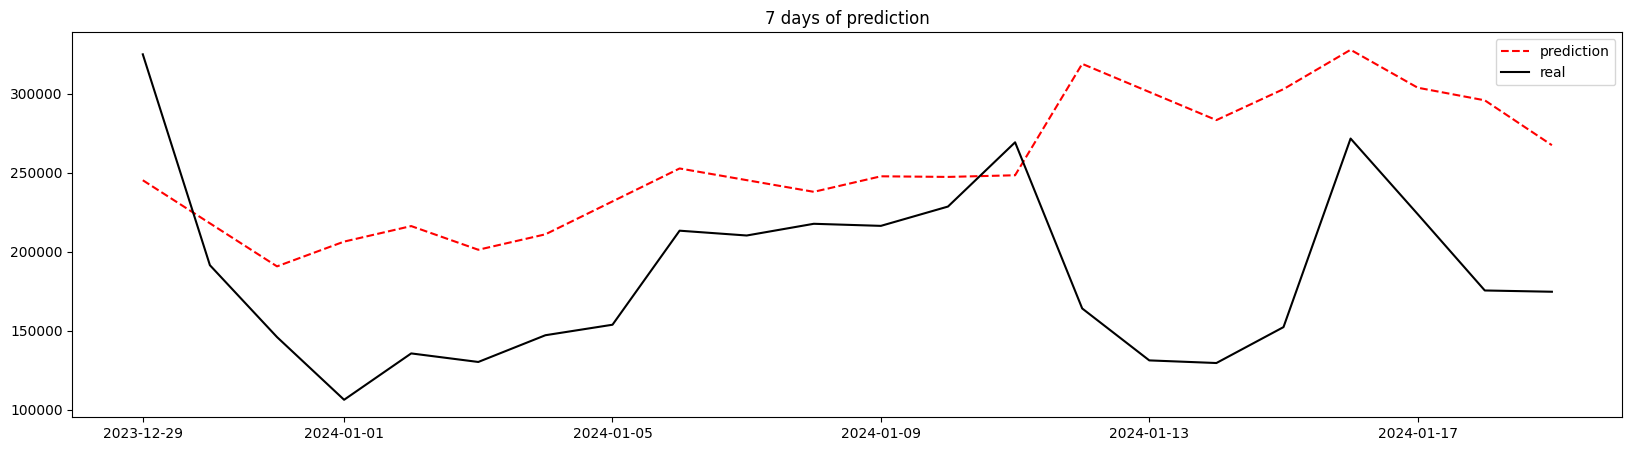

fft가 가장 높았던 포인트의 인덱스 -->  86
그때의 선형 유사도: 0.91150, FFT 유사도: 0.93541, PSD 유사도: 0.98501


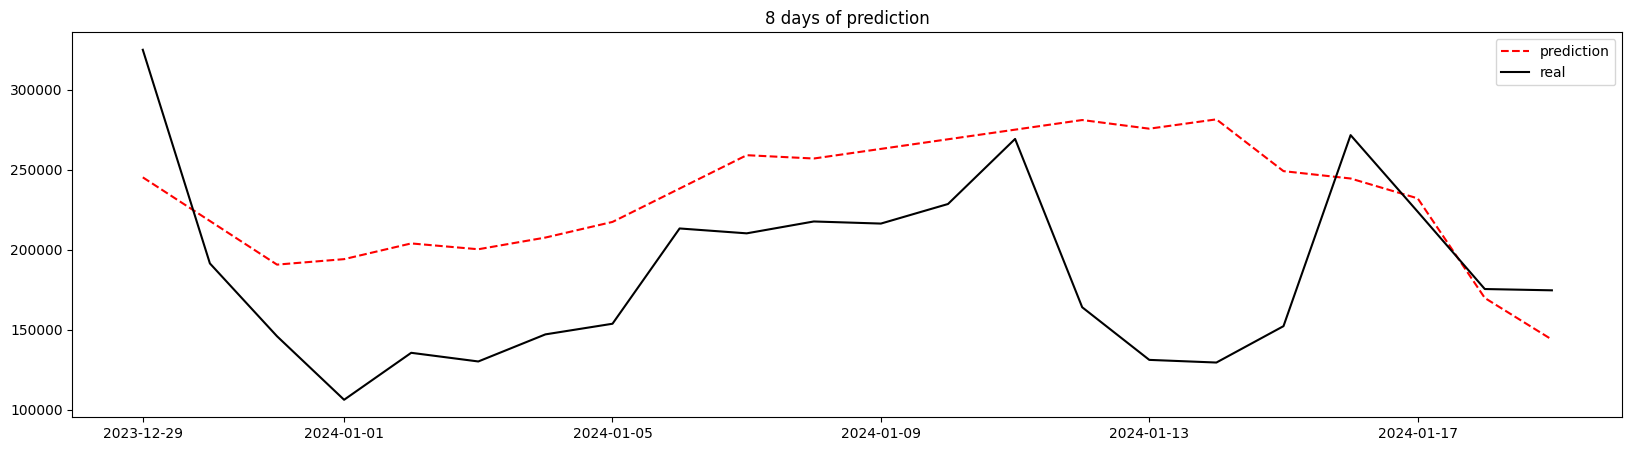

fft가 가장 높았던 포인트의 인덱스 -->  251
그때의 선형 유사도: 0.97767, FFT 유사도: 0.97805, PSD 유사도: 0.99589


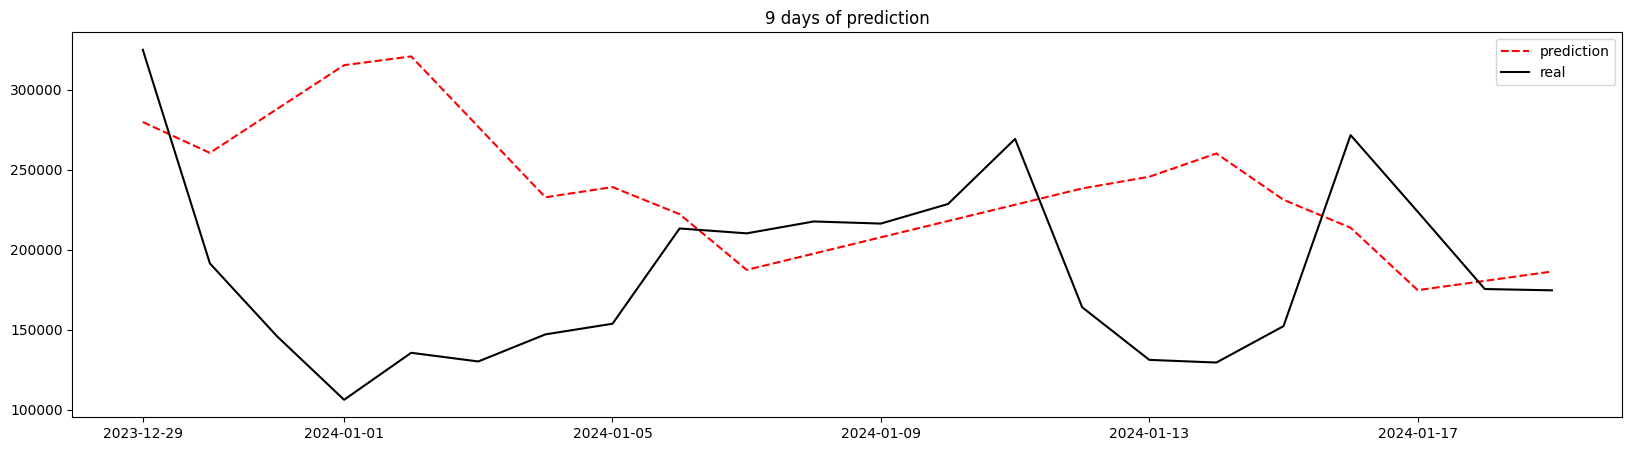

fft가 가장 높았던 포인트의 인덱스 -->  37
그때의 선형 유사도: 0.95156, FFT 유사도: 0.95779, PSD 유사도: 0.99468


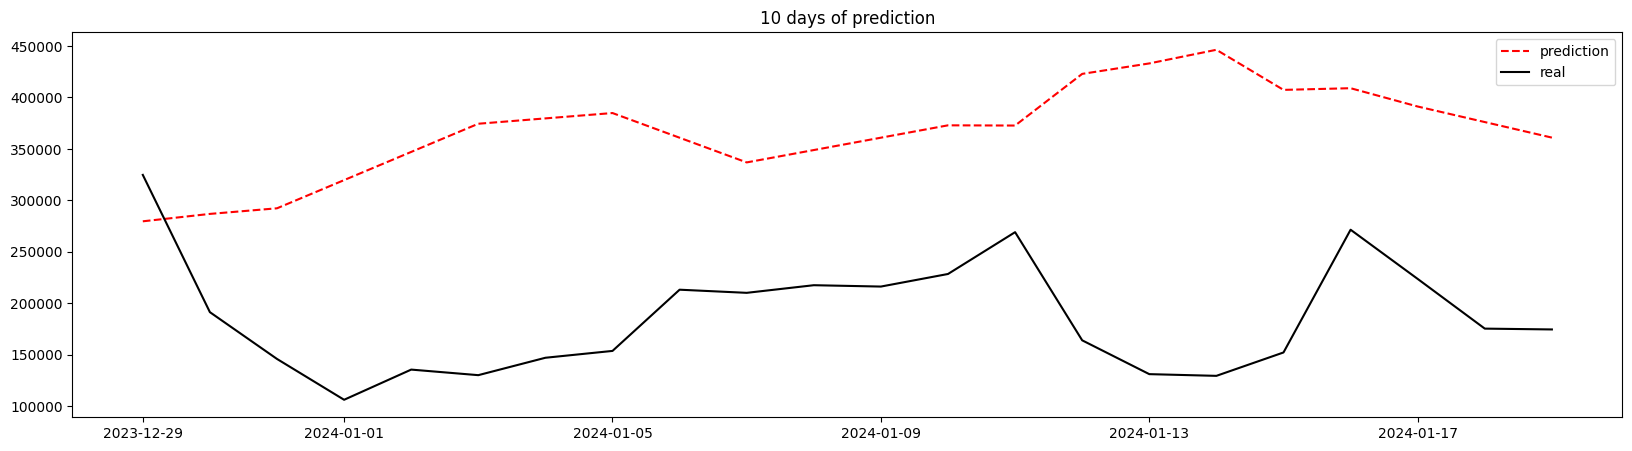

fft가 가장 높았던 포인트의 인덱스 -->  201
그때의 선형 유사도: 0.96262, FFT 유사도: 0.96289, PSD 유사도: 0.96992


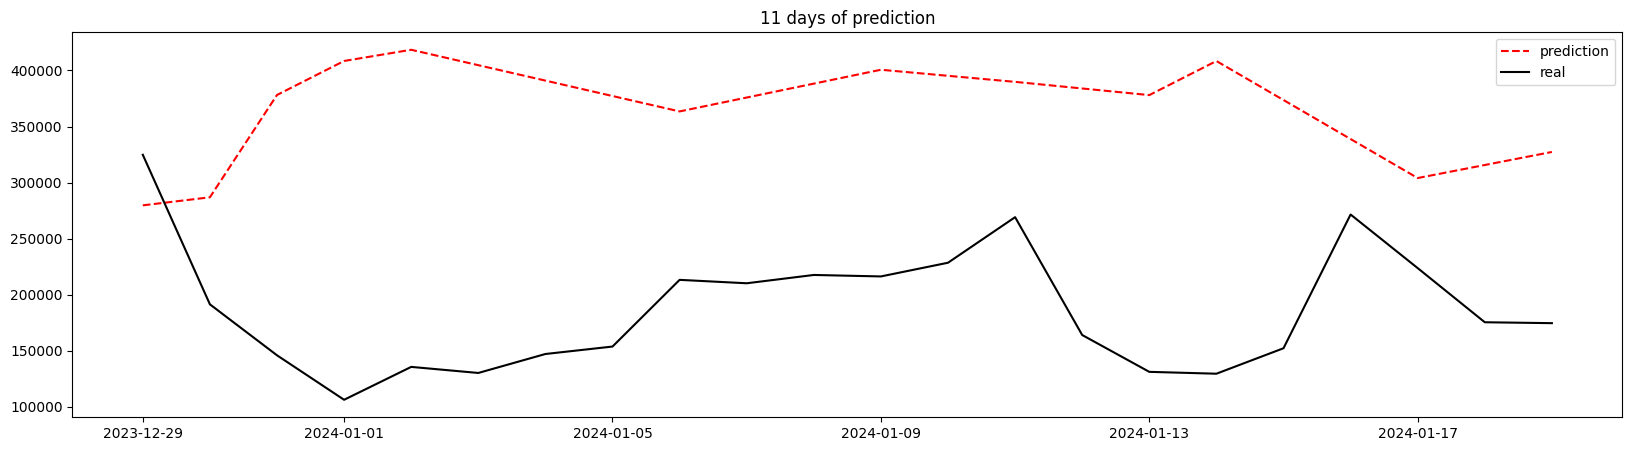

fft가 가장 높았던 포인트의 인덱스 -->  37
그때의 선형 유사도: 0.91237, FFT 유사도: 0.91489, PSD 유사도: 0.97714


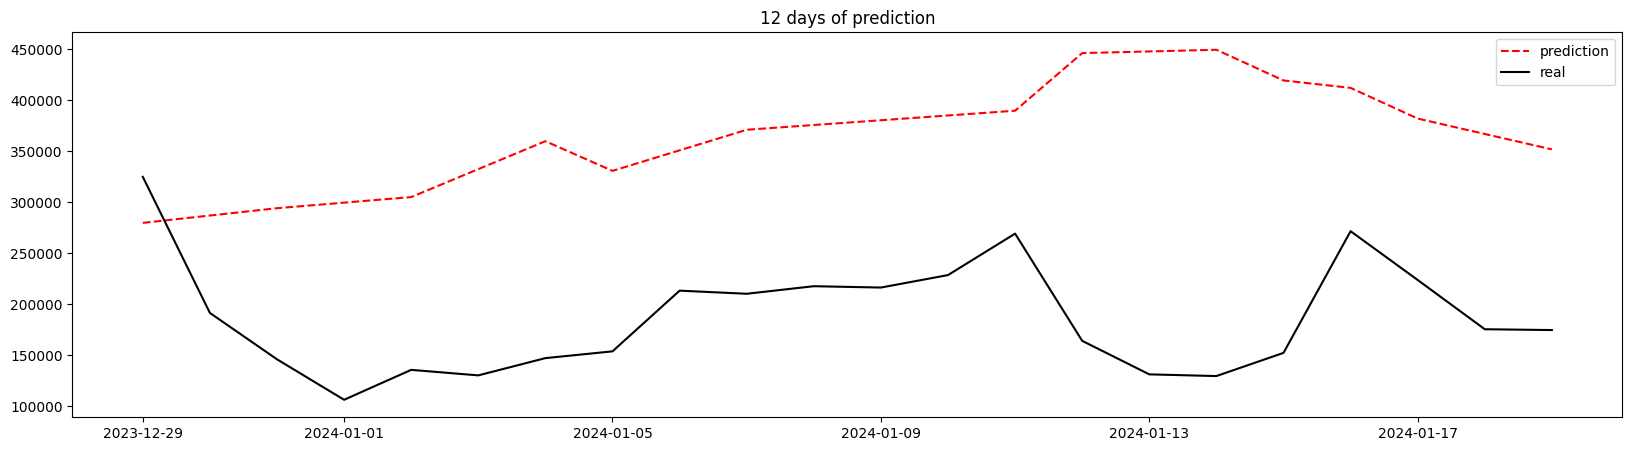

fft가 가장 높았던 포인트의 인덱스 -->  187
그때의 선형 유사도: 0.90708, FFT 유사도: 0.94168, PSD 유사도: 0.99565


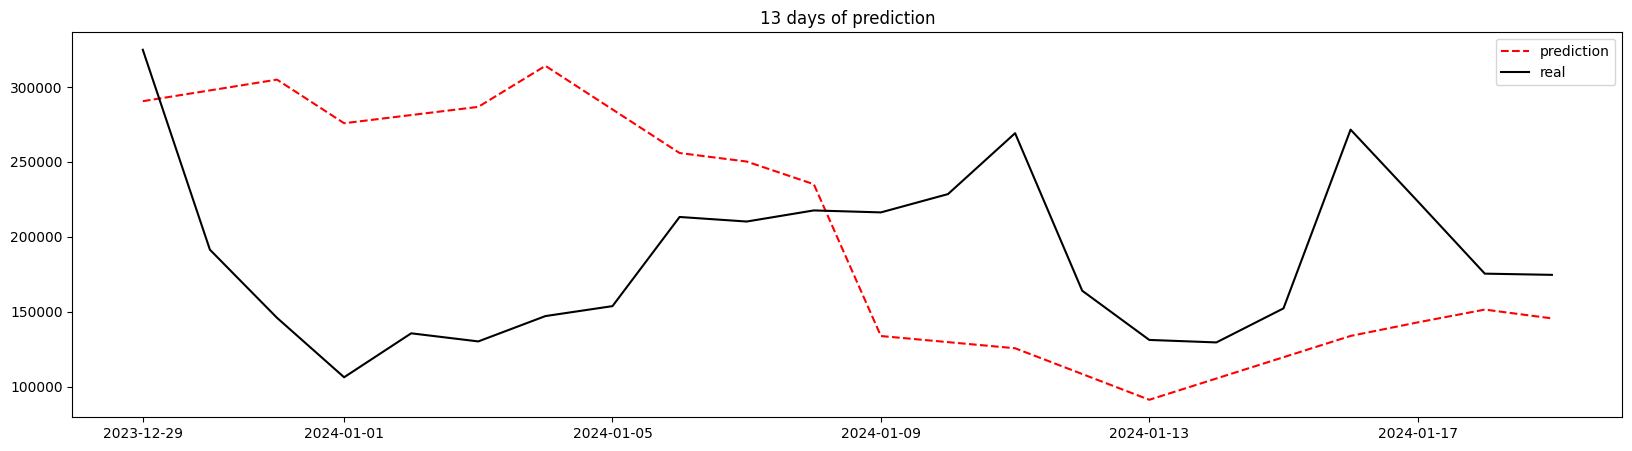

fft가 가장 높았던 포인트의 인덱스 -->  24
그때의 선형 유사도: 0.29243, FFT 유사도: 0.93429, PSD 유사도: 0.97775


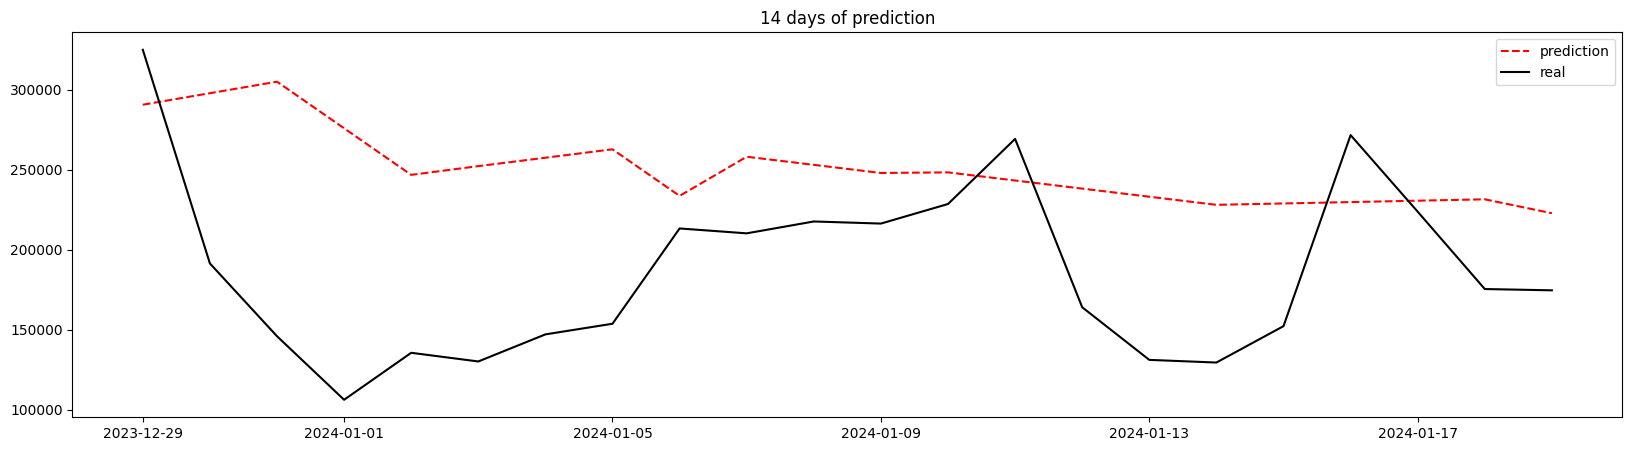

fft가 가장 높았던 포인트의 인덱스 -->  271
그때의 선형 유사도: 0.93918, FFT 유사도: 0.93488, PSD 유사도: 0.99239


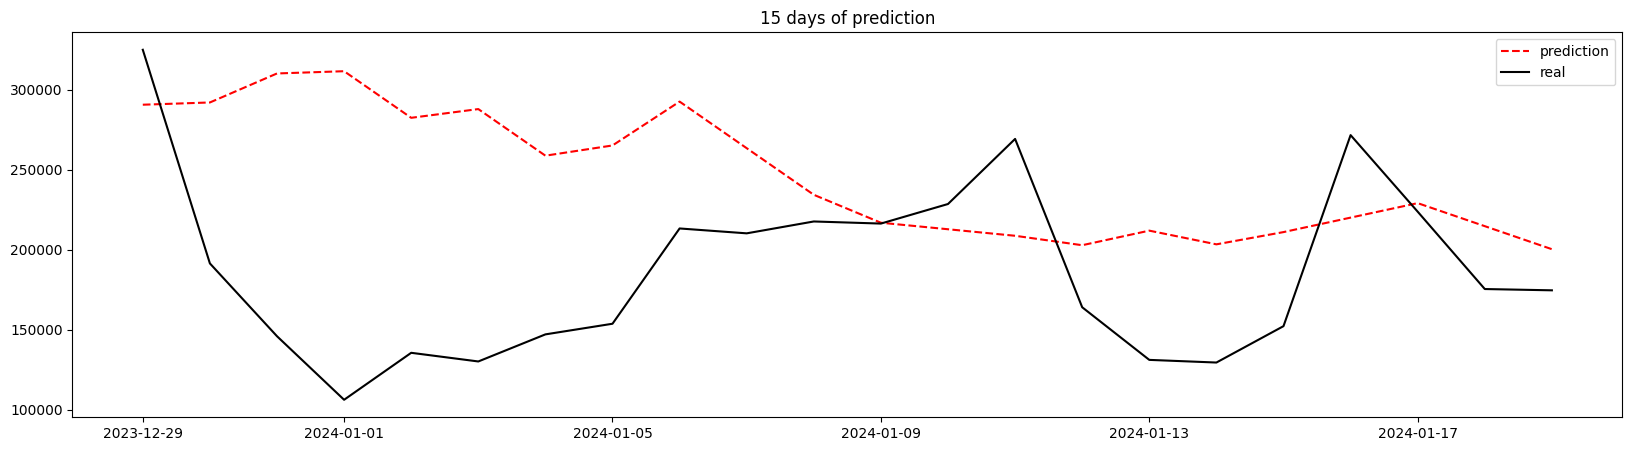

fft가 가장 높았던 포인트의 인덱스 -->  3
그때의 선형 유사도: 0.98168, FFT 유사도: 0.99033, PSD 유사도: 0.99933


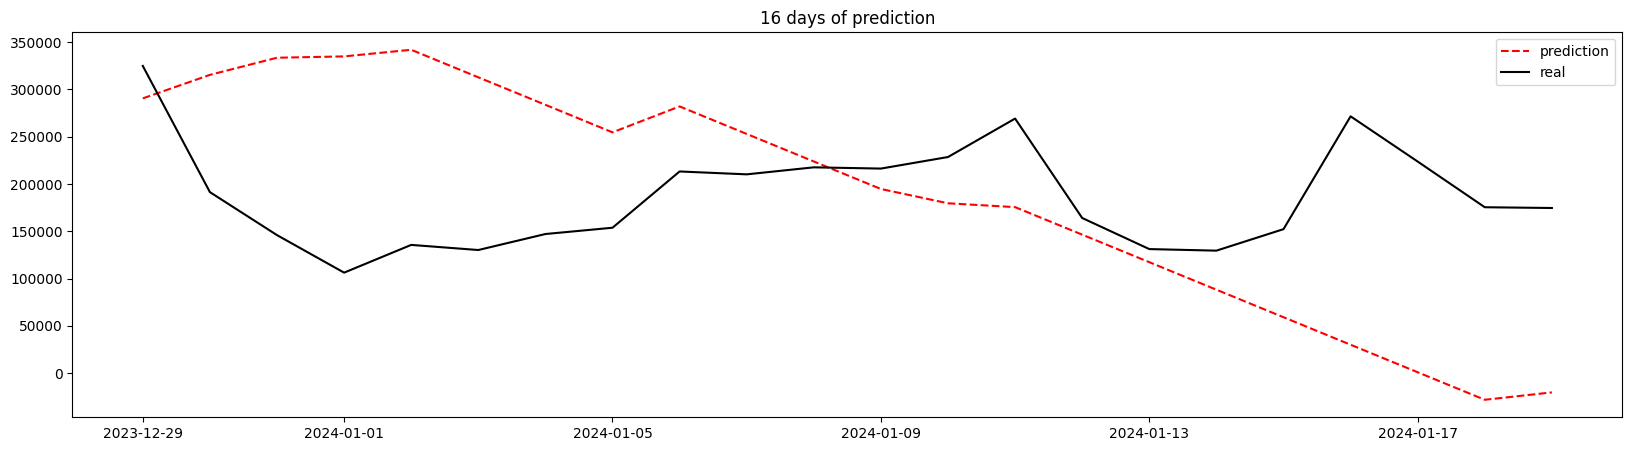

fft가 가장 높았던 포인트의 인덱스 -->  328
그때의 선형 유사도: 0.91440, FFT 유사도: 0.91837, PSD 유사도: 0.89028


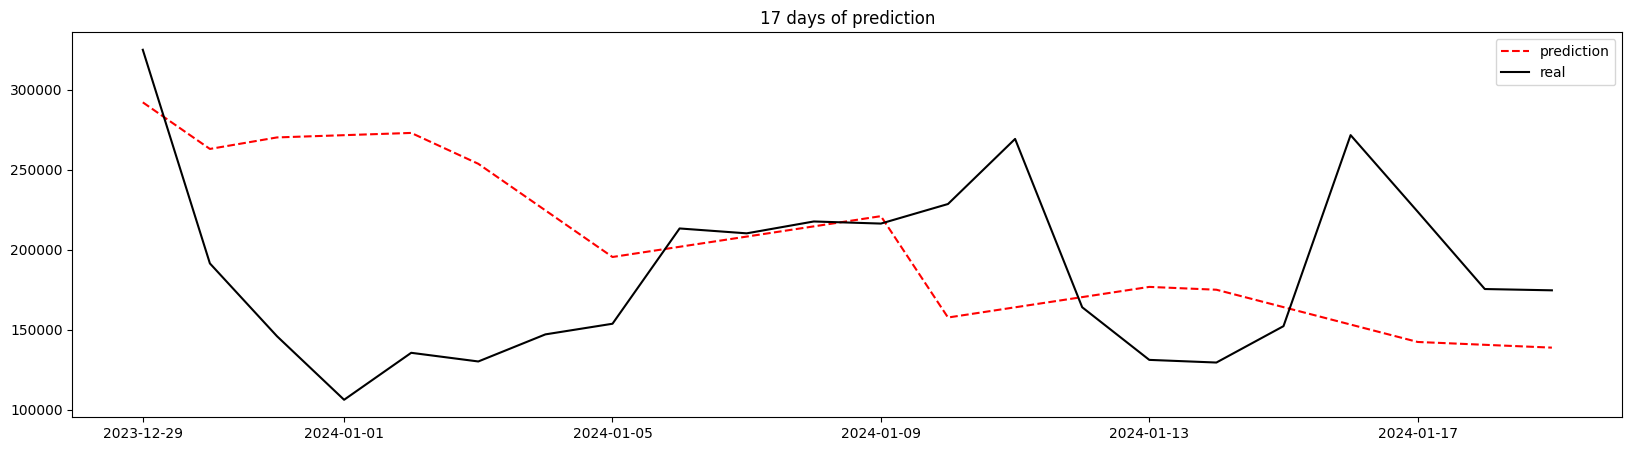

fft가 가장 높았던 포인트의 인덱스 -->  0
그때의 선형 유사도: 0.93985, FFT 유사도: 0.93973, PSD 유사도: 0.99609


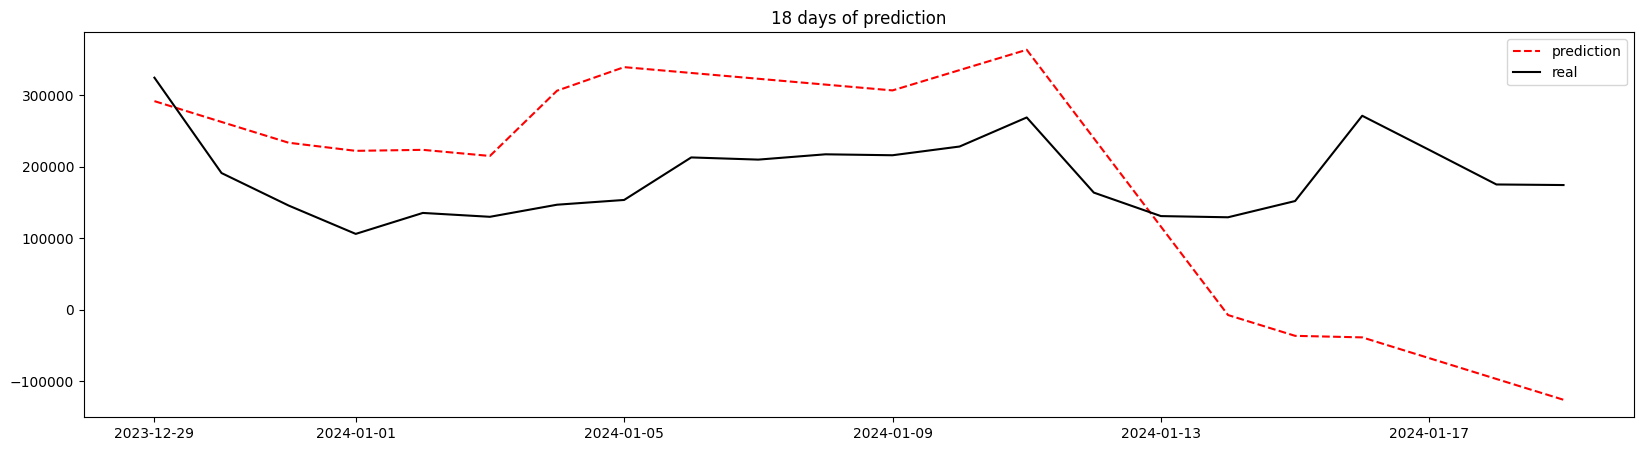

fft가 가장 높았던 포인트의 인덱스 -->  0
그때의 선형 유사도: 0.99693, FFT 유사도: 0.99875, PSD 유사도: 0.99994


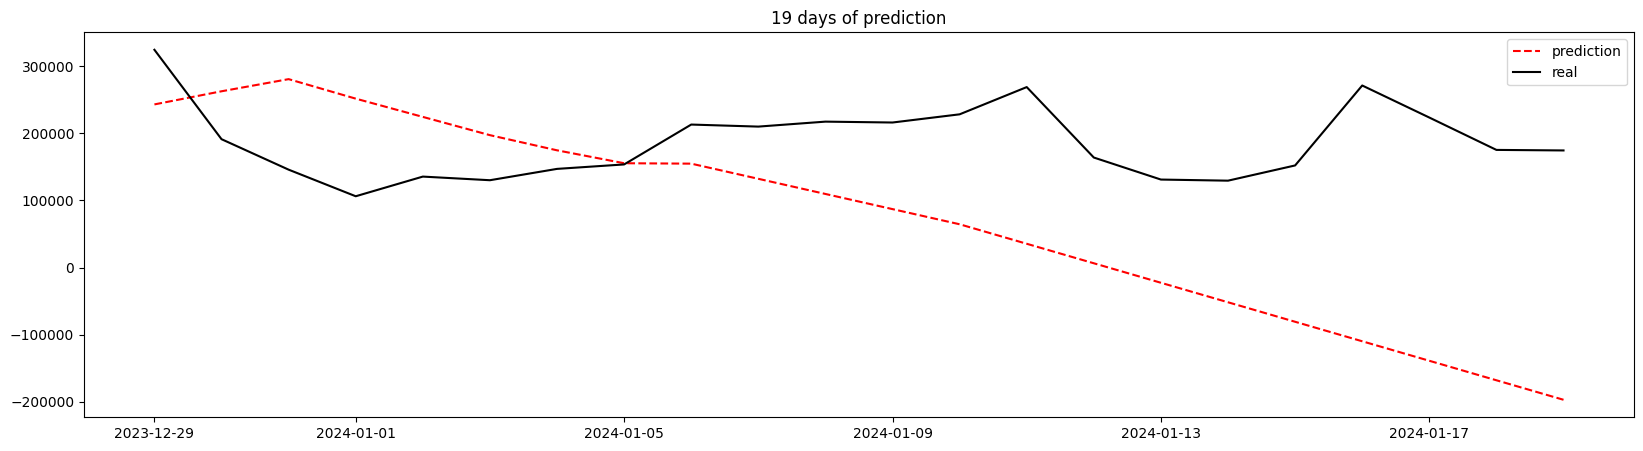

fft가 가장 높았던 포인트의 인덱스 -->  79
그때의 선형 유사도: 0.86886, FFT 유사도: 0.87417, PSD 유사도: 0.99494


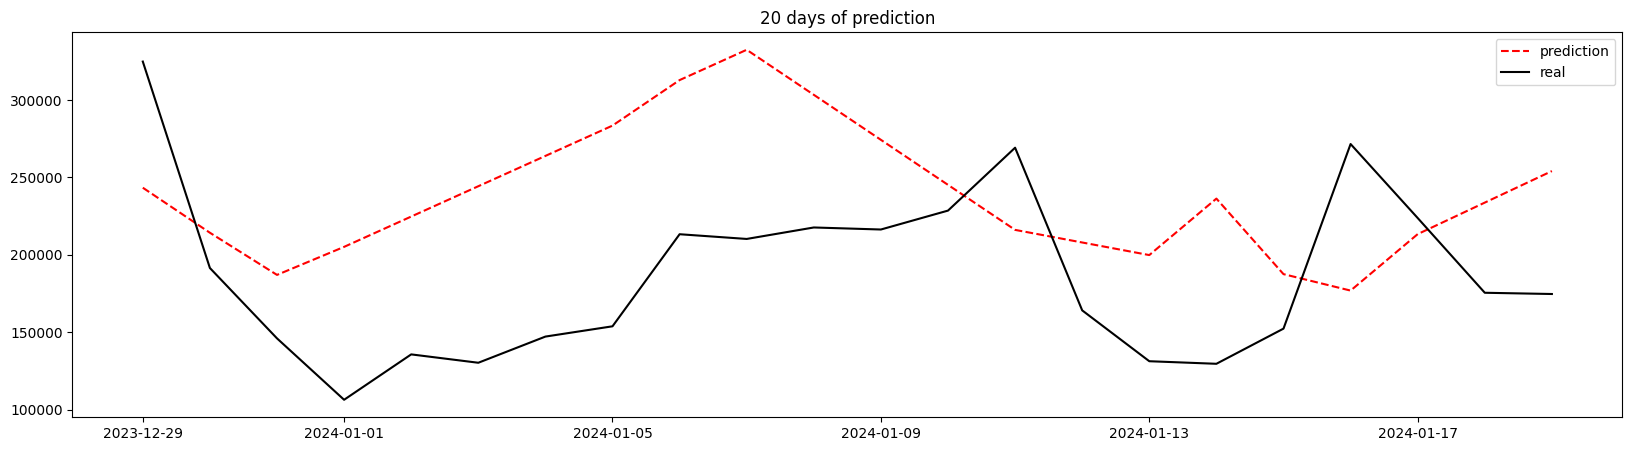

fft가 가장 높았던 포인트의 인덱스 -->  0
그때의 선형 유사도: 0.94313, FFT 유사도: 0.94570, PSD 유사도: 0.98324


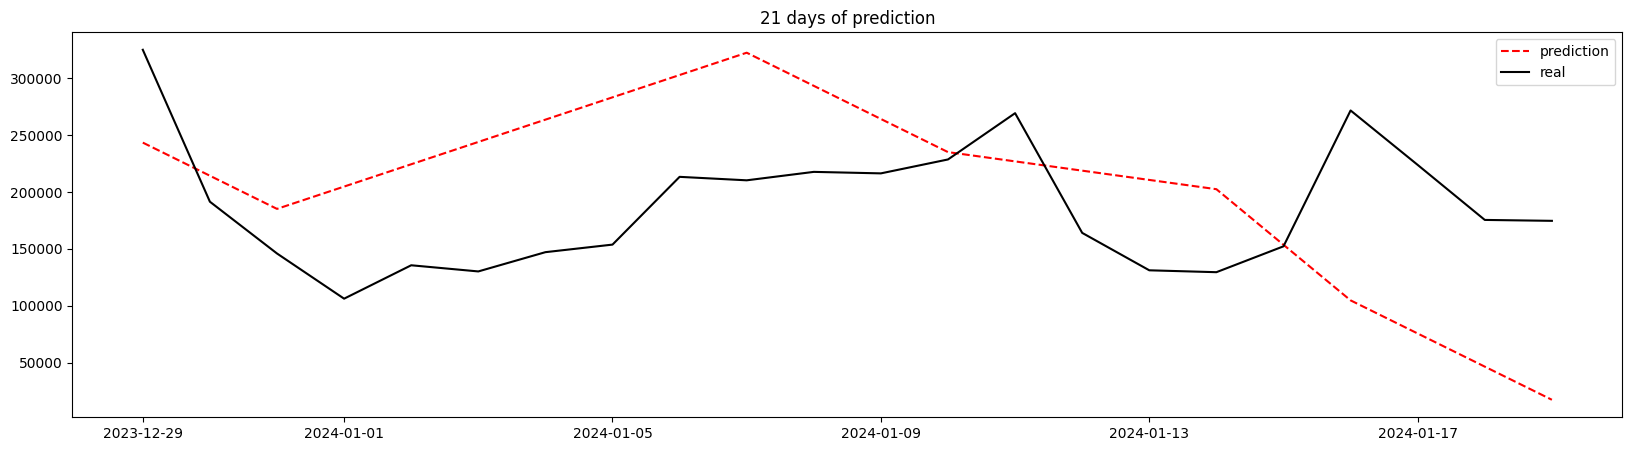

KeyboardInterrupt: 

In [105]:
# 우선 바로 다음날짜만 구해보는 것 시도, 노이즈 데이터 제거 할 수 있으면 베리 굿
# 끝에서부터
# import warnings; warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import warnings; warnings.filterwarnings('ignore')

train_df = train_romand_df.loc[:, ['impression', 'date']]

range_days_list = list(range(3, 24+1))

prediction_excel_file_df = pd.DataFrame() # 예측 데이터 엑셀로 내보내기 위한 데이터 프레임
prediction_excel_file_df['date'] = pd.to_datetime(pd.date_range('2023-12-29', '2024-01-19'))
prediction_excel_file_df['test_data'] = test_impression

# 선형, fft 유사도 비교 데이터프레임
linear_fft_psd_comparison_df = pd.DataFrame()

for r in tqdm(range_days_list):

  for iter in range(len(test_df)):
    # print(iter)

    # -- 유사도 측정 ---------------------------------------------------------------------------------------------------------------------------------------
    range_days = r                                                             # FFT로 사용할 기간 범위
    fixed_range = list(train_df['impression'].iloc[-range_days:])                              # train_df 맨끝에서부터 range_days에 대한 고정된 기간
    linear_list, fft_list, psd_list = list(), list(), list()                                   # 선형, FFT, PSD를 담아줄 리스트
    fft_df = pd.DataFrame(columns = ['linear_similarity', 'fft_similarity', 'psd_similarity']) # 위의 리스트를 데이터프레임화

    for i in range(1, len(train_df)): # --> 우선 365일을 고정으로 했지만 나중에 다른 로직으로 교체 필요
      flexible_range = list(train_df['impression'].iloc[-(range_days+i):-i])                            # 하루씩 밀리는 변동되는 구간 --> "fixed range" (고정된 기간)과 FFT를 통해 유사도를 측정
      linear_similarity, fft_similarity, psd_simliarity = fft_media_expect(flexible_range, fixed_range) # FFT 함수 적용

      linear_list.append(float(linear_similarity)) # 적용 후의 선형 유사도 --> negative가 아닌 것을 찾기 위해
      fft_list.append(float(fft_similarity))       # 적용 후의 FFT 유사도
      psd_list.append(float(psd_simliarity))       # 적용 후의 PSD 유사도

      if (len(train_df)-1) - (range_days+i) < 0:                 # range_days보다 적은 데이터를 유사도로 측정할 경우 stop
        break

    fft_df['linear_similarity'], fft_df['fft_similarity'], fft_df['psd_similarity'] = linear_list, fft_list, psd_list # 유사도 리스트들을 데이터프레임화

    # -- FFT 유사도가 가장 높고 선형 유사도는 negative가 아닌 데이터의 인덱스 찾기 -----------------------------------------------------------------------------------
    argsort_idx_list = list(np.argsort(list(fft_df['fft_similarity']))[::-1]) # np.argsort를 통해 FFT 유사도가 가장 높은 순으로 정렬
    idx = 0
    next_point_idx = 0


    while True:
      if fft_df.loc[argsort_idx_list[idx], 'linear_similarity'] > 0:
        # print('FFT 유사도: ', fft_df.loc[argsort_idx_list[idx], 'fft_similarity'])
        next_point_idx = argsort_idx_list[idx]+1
        break
      else: # 선형 유사도가 negative라면
        idx+=1


    current_point = train_df.loc[argsort_idx_list[idx], 'impression']          # 예측을 하기 전의 데이터 포인트
    next_point = train_df.loc[next_point_idx, 'impression']            # 예측 후의 데이터 포인트


    # prev_momentum_ratio = (next_point - current_point) / current_point      # 유사도가 가장 높았던 선의 바로 다음 데이터 포인트의 변동률 (momentum)
    # prediction = (list(train_df['impression'])[-1])*(1+prev_momentum_ratio) # 변동률을 실제 예측하기 직전 데이터 포인트에 적용 --> 최종 예측값

    tan_momentum = (next_point - current_point)/1                               # tan 변동률
    prediction = (list(train_df['impression'])[-1])+tan_momentum

    # train_romand_df에 예측값 넣어주기
    train_df.loc[len(train_df), 'impression'] = prediction                               # 최종 예측값을 train_df 맨 뒤에 넣기
    last_day = pd.to_datetime(train_df.loc[len(train_df)-2, 'date']) + timedelta(days=1) # 최종 예측값에 다음 날짜를 적용
    train_df.loc[len(train_df)-1, 'date'] = last_day                                     # 최종 예측값에 다음 날짜를 적용 22

  # FFT의 유사도가 가장 높았던 시점의 인덱스와 그때 각각의 유사도
  print('fft가 가장 높았던 포인트의 인덱스 --> ', argsort_idx_list[idx])
  print('그때의 선형 유사도: {:.5f}, FFT 유사도: {:.5f}, PSD 유사도: {:.5f}'.format(float(fft_df.loc[argsort_idx_list[idx], 'linear_similarity']),
                                                                            float(fft_df.loc[argsort_idx_list[idx], 'fft_similarity']),
                                                                            float(fft_df.loc[argsort_idx_list[idx], 'psd_similarity'])))

  # 가장 유사도가 높았다고

  # fft의 유사도가 큰 기준의 인덱스로 선형과 fft, psd의 유사도를 같이 넣어주기
  linear_fft_psd_comparison_df[f'linear_{range_days}days'] = fft_df.loc[argsort_idx_list, 'linear_similarity']
  linear_fft_psd_comparison_df[f'fft_{range_days}days'] = fft_df.loc[argsort_idx_list, 'fft_similarity']
  linear_fft_psd_comparison_df[f'psd_{range_days}days'] = fft_df.loc[argsort_idx_list, 'psd_similarity']

  # 시각화
  train_ts_df = train_df[(len(train_df)-len(test_df)):].set_index('date')
  test_ts_df = test_df.set_index('date')

  plt.figure(figsize=(20,5))
  plt.plot(train_ts_df, label='prediction', color='red', linestyle='dashed')
  plt.plot(test_ts_df, label='real', color='black')
  plt.legend()
  plt.title(f'{range_days} days of prediction')
  plt.show()

  prediction_excel_file_df[f'best_preds_{range_days}days'] = list(train_df.loc[362:, 'impression'])

  train_df = train_romand_df.loc[:, ['impression', 'date']] # 데이터 다시 비워주기

In [ ]:
linear_fft_comparison_df.to_excel('선형_FFT_유사도_비교_엑셀.xlsx', index=False)

In [ ]:
# excel file로 추출
prediction_excel_file_df.to_excel('노다무_V3_Conv_tan.xlsx', index=False)

## 예측을 하는데 유사도가 높았던 22개 (len(test_df))의 선들을 다 보여주기 대신
   대신 모든 range_days가 아닌 하나하나씩

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.9712, fft_similarity: 0.9799, psd_similarity: 0.9971
1st highest --> linear/fft :0.9911, linear/psd: 0.9740, fft/linear: 1.0090, fft/psd: 0.9828, psd/linear: 1.0267, psd/fft: 1.0175

2nd highest --> linear similarity: 0.9740, fft_similarity: 0.9722, psd_similarity: 0.9973
2nd highest --> linear/fft :1.0019, linear/psd: 0.9767, fft/linear: 0.9981, fft/psd: 0.9749, psd/linear: 1.0239, psd/fft: 1.0258

3rd highest --> linear similarity: 0.9705, fft_similarity: 0.9675, psd_similarity: 0.9999
3rd highest --> linear/fft :1.0032, linear/psd: 0.9706, fft/linear: 0.9968, fft/psd: 0.9676, psd/linear: 1.0303, psd/fft: 1.0335

4th highest --> linear similarity: 0.6147, fft_similarity: 0.9646, psd_similarity: 0.9733
4th highest --> linear/fft :0.6373, linear/psd: 0.6315, fft/linear: 1.5692, fft/psd: 0.9910, psd/linear: 1.5835, psd/fft: 1.0091

5th highest --> linear similarity: 0.8654, fft_similarity:

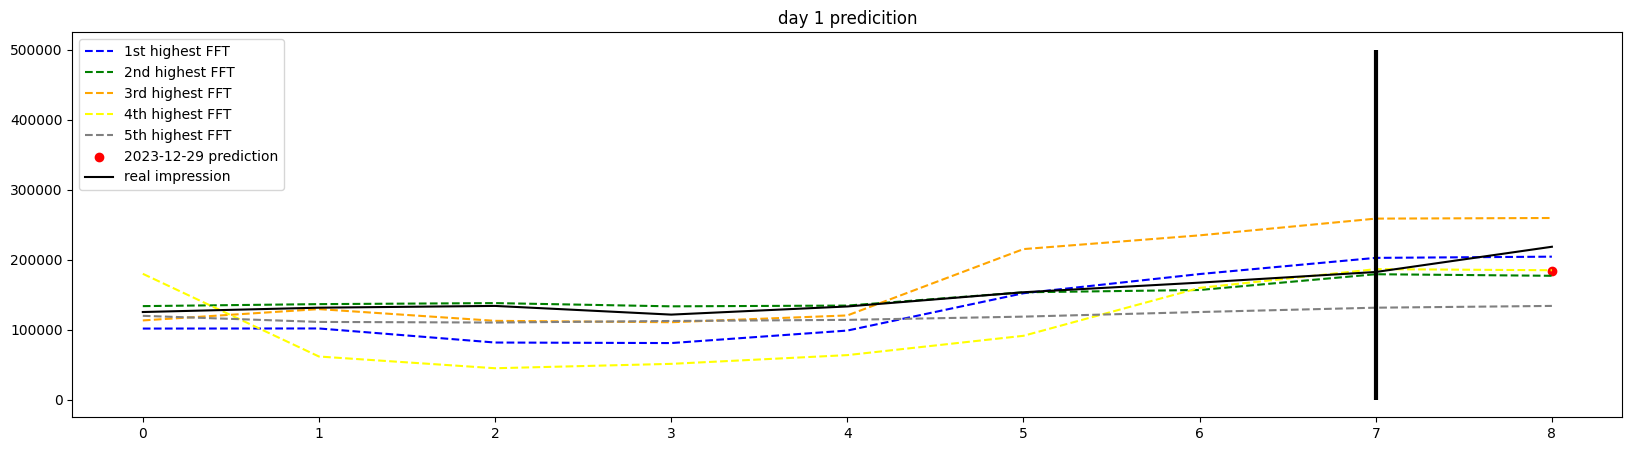

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.8569, fft_similarity: 0.9900, psd_similarity: 0.9998
1st highest --> linear/fft :0.8656, linear/psd: 0.8571, fft/linear: 1.1553, fft/psd: 0.9903, psd/linear: 1.1667, psd/fft: 1.0098

2nd highest --> linear similarity: 0.9844, fft_similarity: 0.9842, psd_similarity: 0.9996
2nd highest --> linear/fft :1.0002, linear/psd: 0.9848, fft/linear: 0.9998, fft/psd: 0.9846, psd/linear: 1.0155, psd/fft: 1.0156

3rd highest --> linear similarity: 0.9806, fft_similarity: 0.9785, psd_similarity: 0.9947
3rd highest --> linear/fft :1.0022, linear/psd: 0.9859, fft/linear: 0.9978, fft/psd: 0.9838, psd/linear: 1.0143, psd/fft: 1.0165

4th highest --> linear similarity: 0.9743, fft_similarity: 0.9723, psd_similarity: 0.9968
4th highest --> linear/fft :1.0021, linear/psd: 0.9774, fft/linear: 0.9979, fft/psd: 0.9754, psd/linear: 1.0231, psd/fft: 1.0252

5th highest --> linear similarity: 0.9706, fft_similarity:

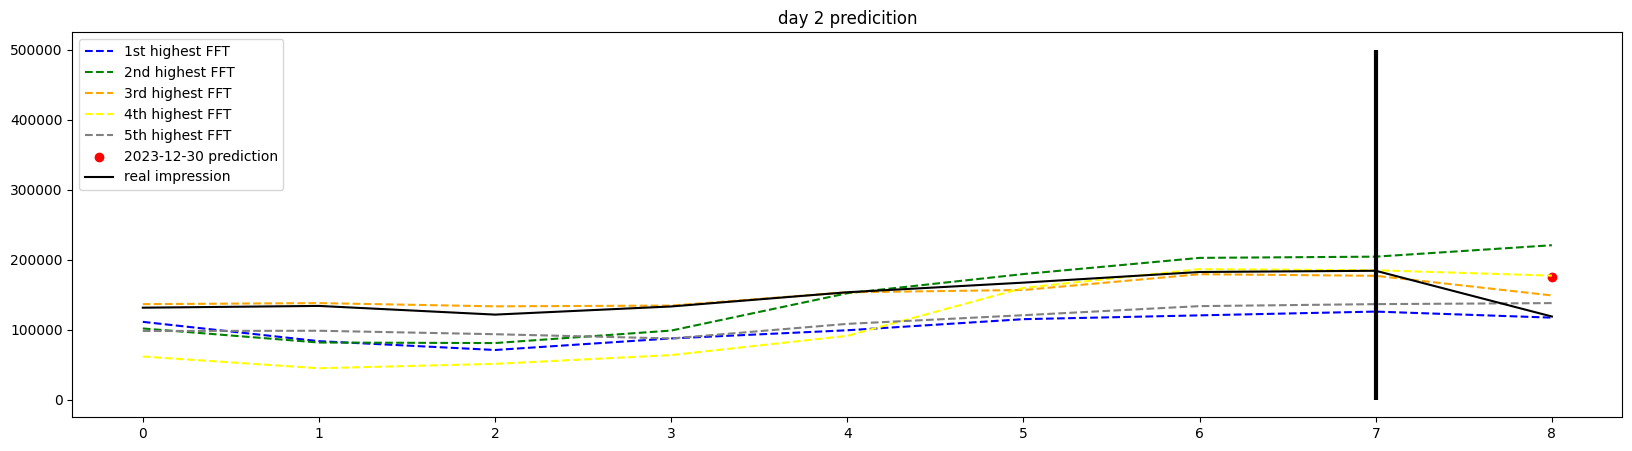

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.9908, fft_similarity: 0.9893, psd_similarity: 0.9998
1st highest --> linear/fft :1.0015, linear/psd: 0.9909, fft/linear: 0.9985, fft/psd: 0.9895, psd/linear: 1.0091, psd/fft: 1.0106

2nd highest --> linear similarity: 0.9740, fft_similarity: 0.9771, psd_similarity: 0.9916
2nd highest --> linear/fft :0.9969, linear/psd: 0.9823, fft/linear: 1.0032, fft/psd: 0.9854, psd/linear: 1.0181, psd/fft: 1.0149

3rd highest --> linear similarity: 0.9718, fft_similarity: 0.9766, psd_similarity: 0.9998
3rd highest --> linear/fft :0.9952, linear/psd: 0.9720, fft/linear: 1.0048, fft/psd: 0.9767, psd/linear: 1.0288, psd/fft: 1.0238

4th highest --> linear similarity: 0.9674, fft_similarity: 0.9695, psd_similarity: 0.9994
4th highest --> linear/fft :0.9978, linear/psd: 0.9680, fft/linear: 1.0022, fft/psd: 0.9701, psd/linear: 1.0331, psd/fft: 1.0308

5th highest --> linear similarity: 0.9631, fft_similarity:

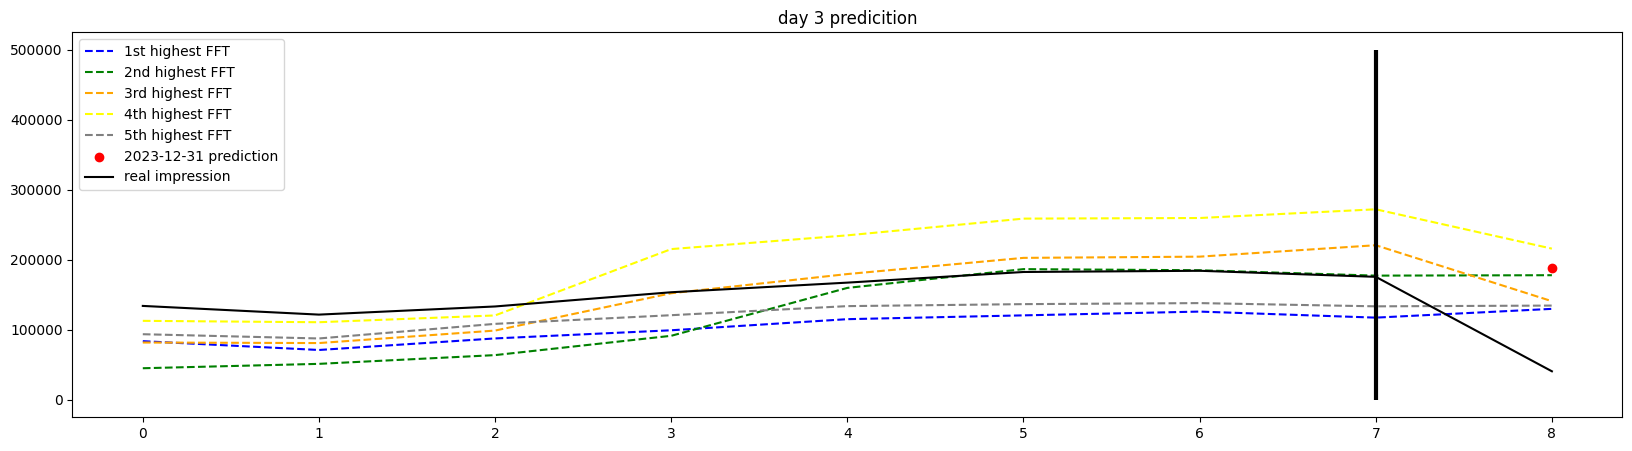

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.9909, fft_similarity: 0.9882, psd_similarity: 0.9977
1st highest --> linear/fft :1.0028, linear/psd: 0.9932, fft/linear: 0.9972, fft/psd: 0.9905, psd/linear: 1.0068, psd/fft: 1.0096

2nd highest --> linear similarity: 0.9684, fft_similarity: 0.9803, psd_similarity: 0.9974
2nd highest --> linear/fft :0.9879, linear/psd: 0.9709, fft/linear: 1.0123, fft/psd: 0.9828, psd/linear: 1.0299, psd/fft: 1.0175

3rd highest --> linear similarity: 0.9567, fft_similarity: 0.9662, psd_similarity: 0.9958
3rd highest --> linear/fft :0.9901, linear/psd: 0.9607, fft/linear: 1.0100, fft/psd: 0.9703, psd/linear: 1.0409, psd/fft: 1.0306

4th highest --> linear similarity: 0.9333, fft_similarity: 0.9638, psd_similarity: 0.9998
4th highest --> linear/fft :0.9684, linear/psd: 0.9335, fft/linear: 1.0326, fft/psd: 0.9640, psd/linear: 1.0712, psd/fft: 1.0373

5th highest --> linear similarity: 0.9724, fft_similarity:

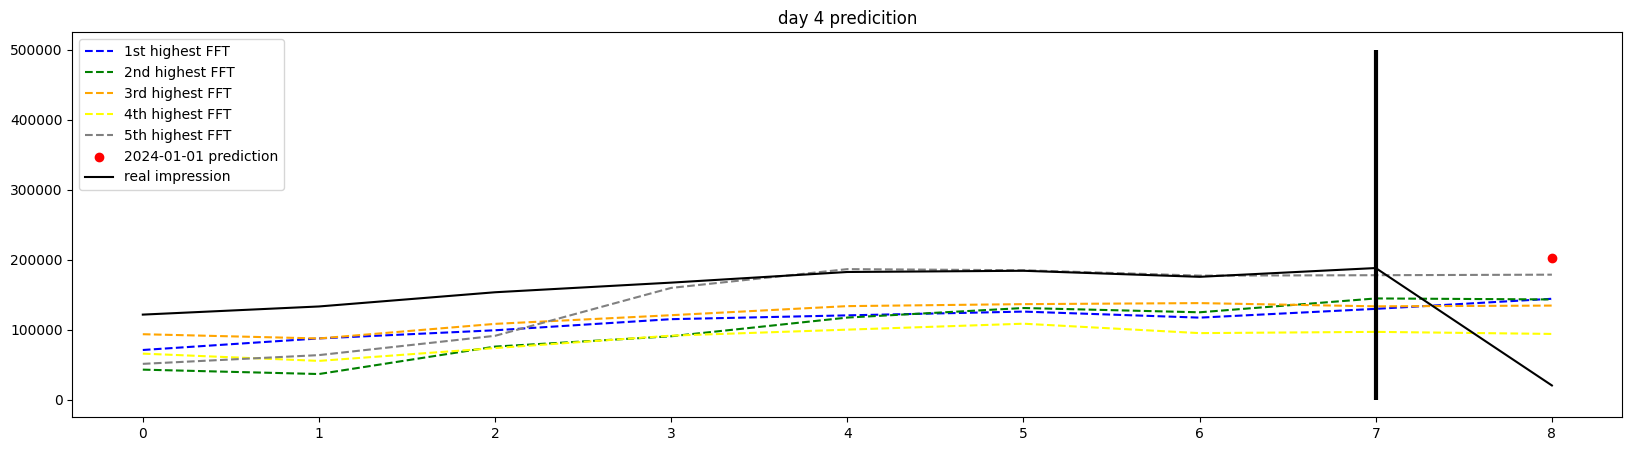

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.9883, fft_similarity: 0.9840, psd_similarity: 0.9878
1st highest --> linear/fft :1.0045, linear/psd: 1.0006, fft/linear: 0.9956, fft/psd: 0.9961, psd/linear: 0.9994, psd/fft: 1.0039

2nd highest --> linear similarity: 0.9177, fft_similarity: 0.9402, psd_similarity: 0.8963
2nd highest --> linear/fft :0.9760, linear/psd: 1.0238, fft/linear: 1.0245, fft/psd: 1.0490, psd/linear: 0.9767, psd/fft: 0.9533

3rd highest --> linear similarity: 0.9018, fft_similarity: 0.9318, psd_similarity: 0.9267
3rd highest --> linear/fft :0.9678, linear/psd: 0.9731, fft/linear: 1.0333, fft/psd: 1.0055, psd/linear: 1.0276, psd/fft: 0.9945

4th highest --> linear similarity: 0.8623, fft_similarity: 0.9275, psd_similarity: 0.8999
4th highest --> linear/fft :0.9297, linear/psd: 0.9583, fft/linear: 1.0756, fft/psd: 1.0307, psd/linear: 1.0435, psd/fft: 0.9702

5th highest --> linear similarity: 0.9677, fft_similarity:

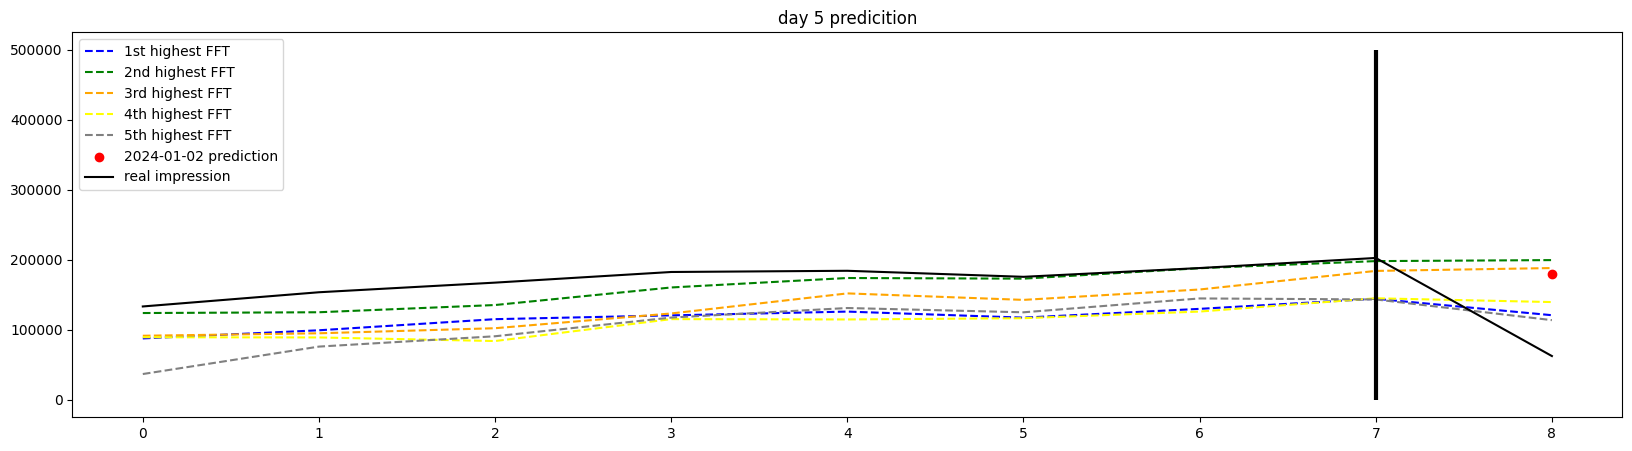

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.9836, fft_similarity: 0.9675, psd_similarity: 0.9633
1st highest --> linear/fft :1.0167, linear/psd: 1.0211, fft/linear: 0.9836, fft/psd: 1.0044, psd/linear: 0.9793, psd/fft: 0.9957

2nd highest --> linear similarity: 0.9238, fft_similarity: 0.8491, psd_similarity: 0.2915
2nd highest --> linear/fft :1.0880, linear/psd: 3.1697, fft/linear: 0.9191, fft/psd: 2.9132, psd/linear: 0.3155, psd/fft: 0.3433

3rd highest --> linear similarity: 0.7938, fft_similarity: 0.8162, psd_similarity: 0.5596
3rd highest --> linear/fft :0.9725, linear/psd: 1.4185, fft/linear: 1.0283, fft/psd: 1.4585, psd/linear: 0.7050, psd/fft: 0.6856

4th highest --> linear similarity: 0.9031, fft_similarity: 0.8104, psd_similarity: 0.4818
4th highest --> linear/fft :1.1144, linear/psd: 1.8746, fft/linear: 0.8973, fft/psd: 1.6821, psd/linear: 0.5335, psd/fft: 0.5945

5th highest --> linear similarity: 0.7593, fft_similarity:

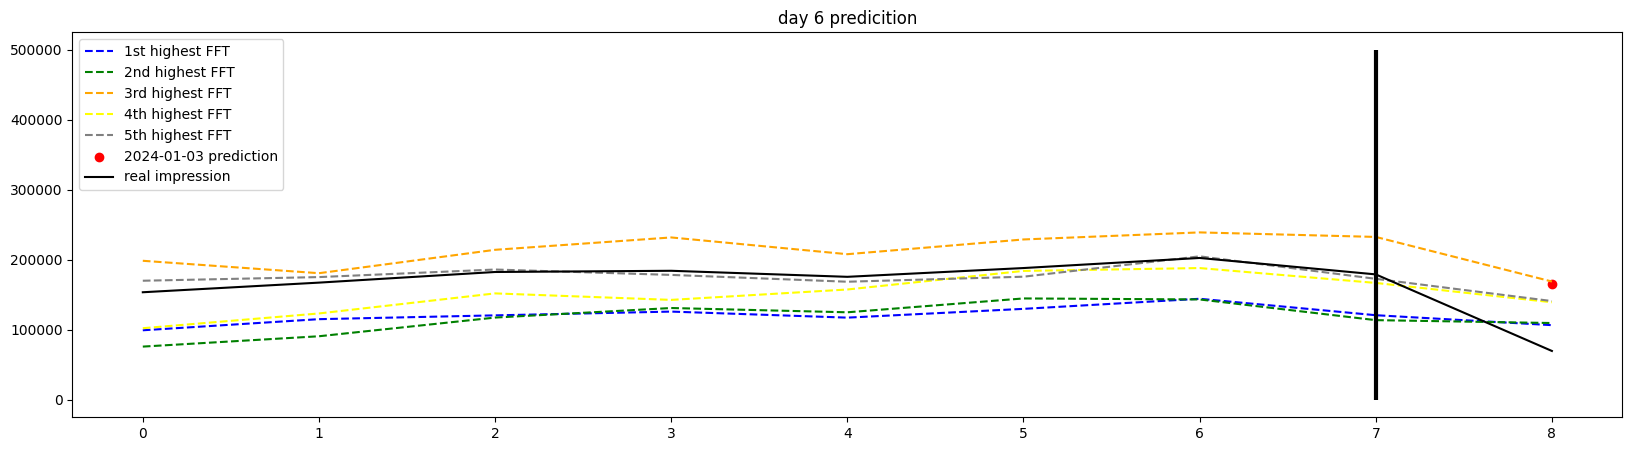

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.9758, fft_similarity: 0.9930, psd_similarity: 0.9987
1st highest --> linear/fft :0.9827, linear/psd: 0.9771, fft/linear: 1.0176, fft/psd: 0.9943, psd/linear: 1.0234, psd/fft: 1.0057

2nd highest --> linear similarity: 0.8428, fft_similarity: 0.9404, psd_similarity: 0.8640
2nd highest --> linear/fft :0.8962, linear/psd: 0.9754, fft/linear: 1.1158, fft/psd: 1.0884, psd/linear: 1.0252, psd/fft: 0.9188

3rd highest --> linear similarity: 0.1685, fft_similarity: 0.8440, psd_similarity: 0.0355
3rd highest --> linear/fft :0.1997, linear/psd: 4.7429, fft/linear: 5.0080, fft/psd: 23.7528, psd/linear: 0.2108, psd/fft: 0.0421

4th highest --> linear similarity: 0.8661, fft_similarity: 0.8296, psd_similarity: 0.8058
4th highest --> linear/fft :1.0439, linear/psd: 1.0748, fft/linear: 0.9579, fft/psd: 1.0296, psd/linear: 0.9304, psd/fft: 0.9713

5th highest --> linear similarity: 0.8387, fft_similarity

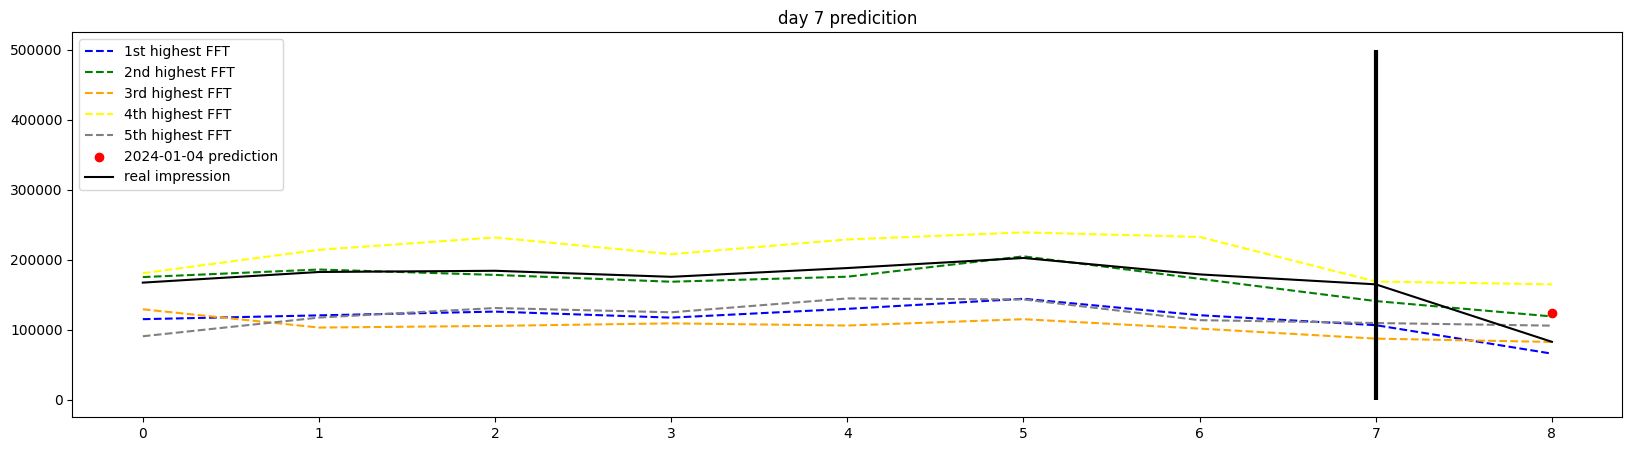

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 0.9985, fft_similarity: 1.0000, psd_similarity: 0.9998
1st highest --> linear/fft :0.9985, linear/psd: 0.9986, fft/linear: 1.0015, fft/psd: 1.0002, psd/linear: 1.0014, psd/fft: 0.9998

2nd highest --> linear similarity: 0.9505, fft_similarity: 0.9588, psd_similarity: 0.9150
2nd highest --> linear/fft :0.9913, linear/psd: 1.0388, fft/linear: 1.0088, fft/psd: 1.0479, psd/linear: 0.9626, psd/fft: 0.9543

3rd highest --> linear similarity: 0.9343, fft_similarity: 0.9368, psd_similarity: 0.9072
3rd highest --> linear/fft :0.9974, linear/psd: 1.0299, fft/linear: 1.0026, fft/psd: 1.0325, psd/linear: 0.9710, psd/fft: 0.9685

4th highest --> linear similarity: 0.9283, fft_similarity: 0.9332, psd_similarity: 0.6528
4th highest --> linear/fft :0.9947, linear/psd: 1.4220, fft/linear: 1.0053, fft/psd: 1.4296, psd/linear: 0.7032, psd/fft: 0.6995

5th highest --> linear similarity: 0.8703, fft_similarity:

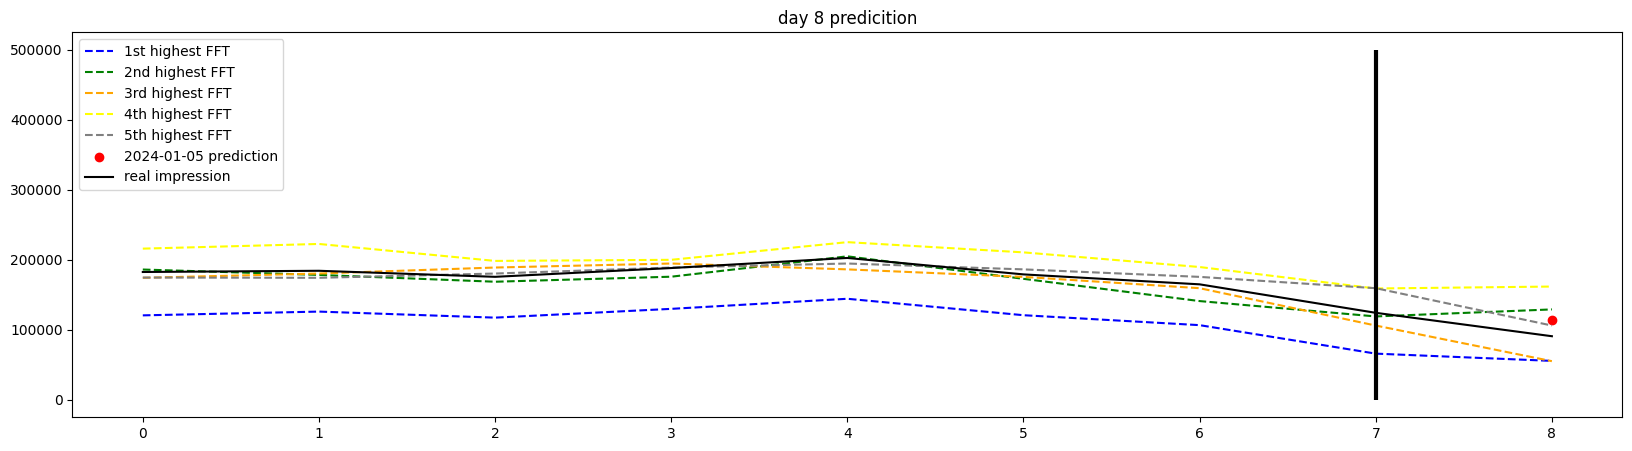

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9199, fft_similarity: 0.9821, psd_similarity: 0.9981
2nd highest --> linear/fft :0.9367, linear/psd: 0.9216, fft/linear: 1.0676, fft/psd: 0.9839, psd/linear: 1.0850, psd/fft: 1.0163

3rd highest --> linear similarity: 0.4958, fft_similarity: 0.9797, psd_similarity: 0.9999
3rd highest --> linear/fft :0.5061, linear/psd: 0.4958, fft/linear: 1.9759, fft/psd: 0.9798, psd/linear: 2.0167, psd/fft: 1.0207

4th highest --> linear similarity: 0.9459, fft_similarity: 0.9651, psd_similarity: 0.9424
4th highest --> linear/fft :0.9801, linear/psd: 1.0038, fft/linear: 1.0203, fft/psd: 1.0241, psd/linear: 0.9963, psd/fft: 0.9765

5th highest --> linear similarity: 0.9465, fft_similarity:

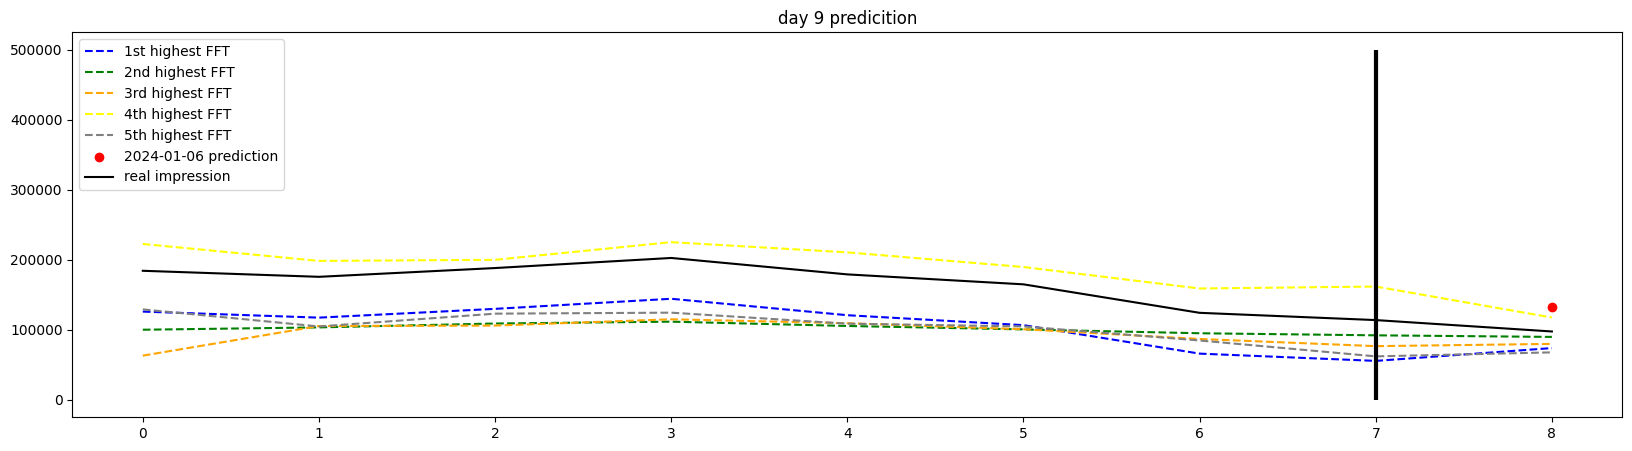

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.2883, fft_similarity: 0.9935, psd_similarity: 0.9986
2nd highest --> linear/fft :0.2902, linear/psd: 0.2887, fft/linear: 3.4463, fft/psd: 0.9949, psd/linear: 3.4641, psd/fft: 1.0052

3rd highest --> linear similarity: 0.9700, fft_similarity: 0.9691, psd_similarity: 1.0000
3rd highest --> linear/fft :1.0010, linear/psd: 0.9700, fft/linear: 0.9990, fft/psd: 0.9691, psd/linear: 1.0309, psd/fft: 1.0319

4th highest --> linear similarity: 0.9422, fft_similarity: 0.9656, psd_similarity: 0.9976
4th highest --> linear/fft :0.9757, linear/psd: 0.9444, fft/linear: 1.0249, fft/psd: 0.9679, psd/linear: 1.0588, psd/fft: 1.0331

5th highest --> linear similarity: 0.9264, fft_similarity:

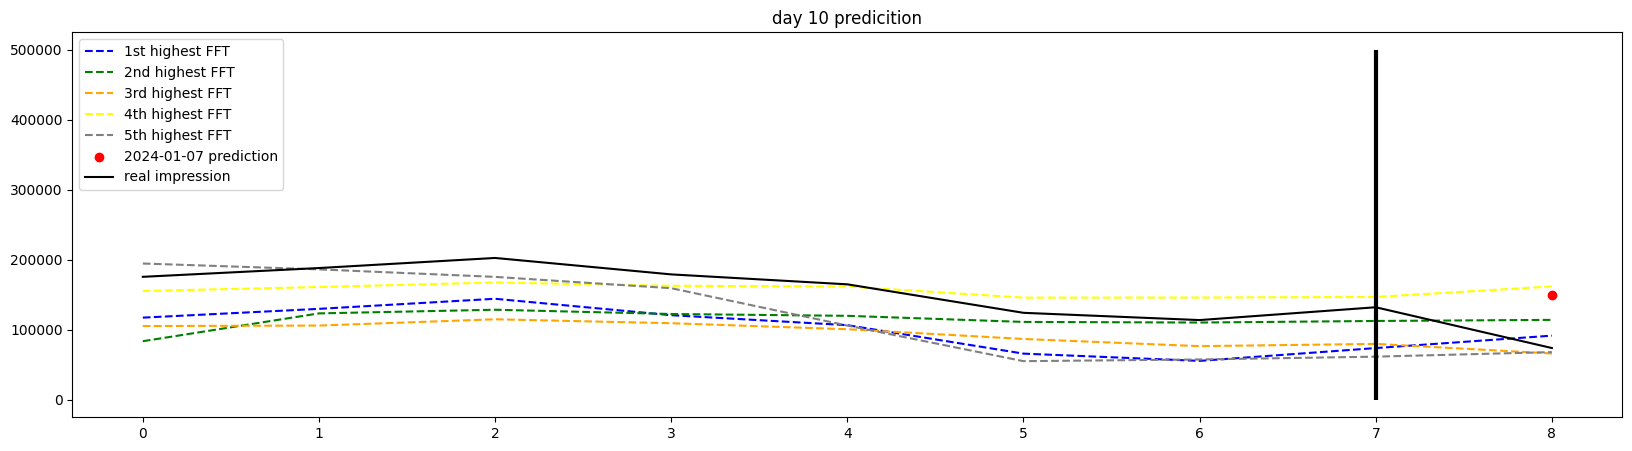

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9843, fft_similarity: 0.9842, psd_similarity: 0.9987
2nd highest --> linear/fft :1.0001, linear/psd: 0.9856, fft/linear: 0.9999, fft/psd: 0.9855, psd/linear: 1.0147, psd/fft: 1.0147

3rd highest --> linear similarity: 0.9071, fft_similarity: 0.9503, psd_similarity: 0.9765
3rd highest --> linear/fft :0.9545, linear/psd: 0.9289, fft/linear: 1.0477, fft/psd: 0.9732, psd/linear: 1.0765, psd/fft: 1.0276

4th highest --> linear similarity: 0.9432, fft_similarity: 0.9472, psd_similarity: 0.9953
4th highest --> linear/fft :0.9957, linear/psd: 0.9476, fft/linear: 1.0043, fft/psd: 0.9517, psd/linear: 1.0552, psd/fft: 1.0507

5th highest --> linear similarity: 0.8834, fft_similarity:

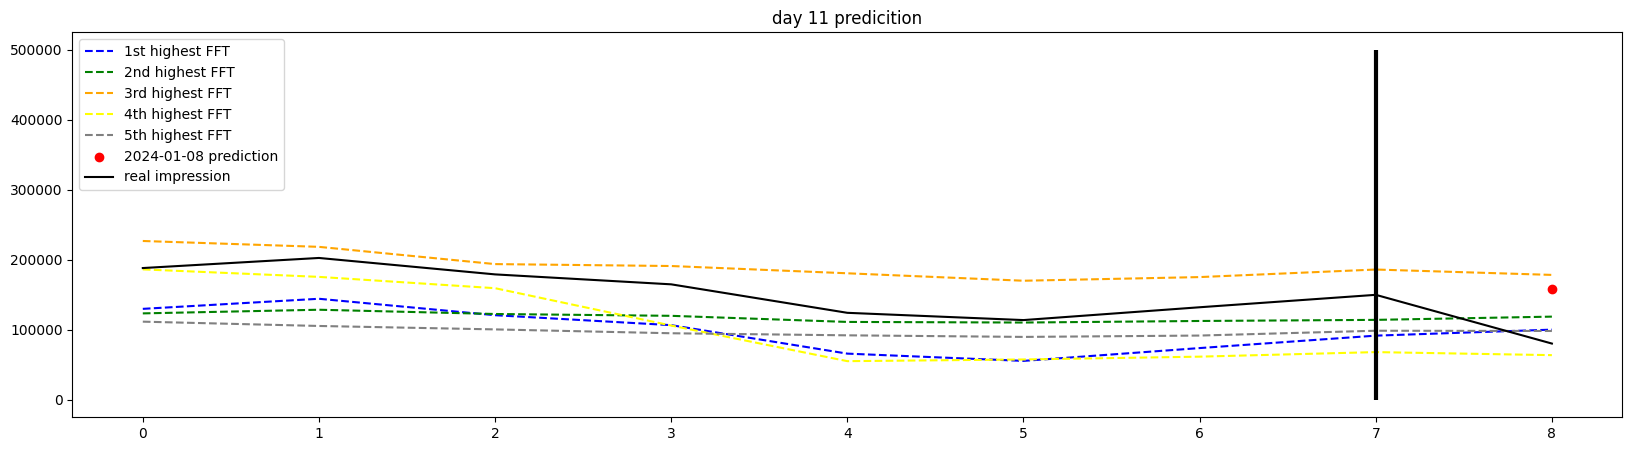

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9067, fft_similarity: 0.9830, psd_similarity: 0.9978
2nd highest --> linear/fft :0.9224, linear/psd: 0.9087, fft/linear: 1.0841, fft/psd: 0.9852, psd/linear: 1.1004, psd/fft: 1.0150

3rd highest --> linear similarity: 0.9840, fft_similarity: 0.9728, psd_similarity: 0.9861
3rd highest --> linear/fft :1.0115, linear/psd: 0.9979, fft/linear: 0.9886, fft/psd: 0.9866, psd/linear: 1.0021, psd/fft: 1.0136

4th highest --> linear similarity: 0.9020, fft_similarity: 0.9637, psd_similarity: 0.9999
4th highest --> linear/fft :0.9360, linear/psd: 0.9022, fft/linear: 1.0684, fft/psd: 0.9639, psd/linear: 1.1084, psd/fft: 1.0375

5th highest --> linear similarity: 0.8138, fft_similarity:

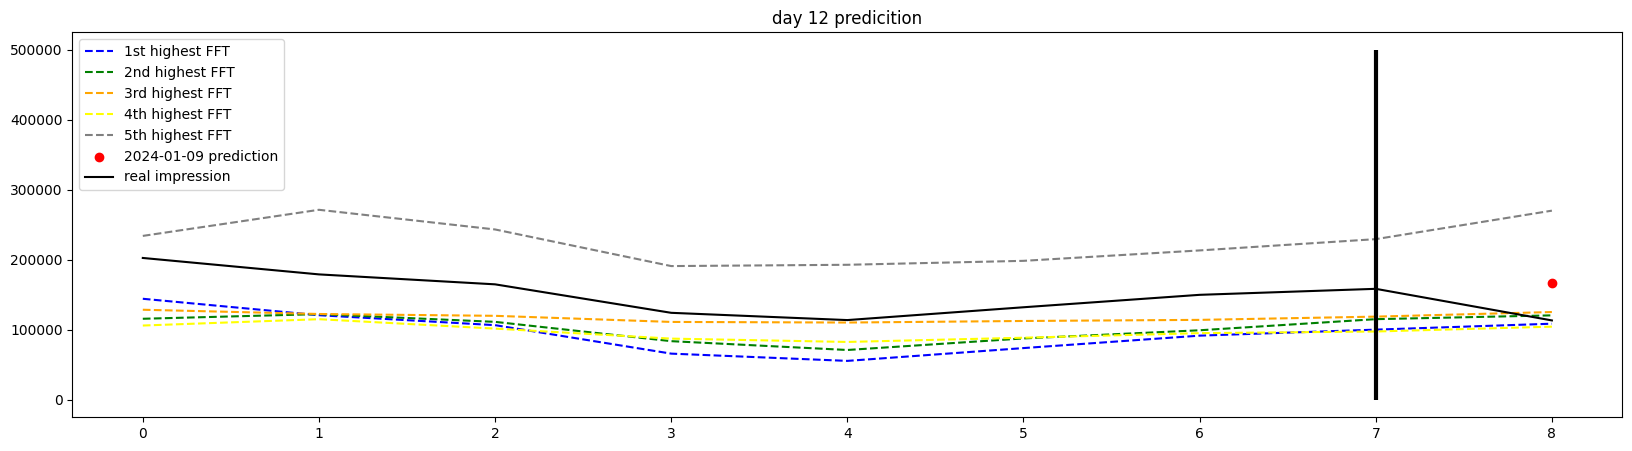

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9671, fft_similarity: 0.9879, psd_similarity: 0.9958
2nd highest --> linear/fft :0.9789, linear/psd: 0.9711, fft/linear: 1.0216, fft/psd: 0.9921, psd/linear: 1.0297, psd/fft: 1.0080

3rd highest --> linear similarity: 0.9809, fft_similarity: 0.9813, psd_similarity: 0.9978
3rd highest --> linear/fft :0.9995, linear/psd: 0.9830, fft/linear: 1.0005, fft/psd: 0.9835, psd/linear: 1.0173, psd/fft: 1.0168

4th highest --> linear similarity: 0.9236, fft_similarity: 0.9133, psd_similarity: 0.9643
4th highest --> linear/fft :1.0113, linear/psd: 0.9578, fft/linear: 0.9889, fft/psd: 0.9471, psd/linear: 1.0441, psd/fft: 1.0558

5th highest --> linear similarity: 0.8497, fft_similarity:

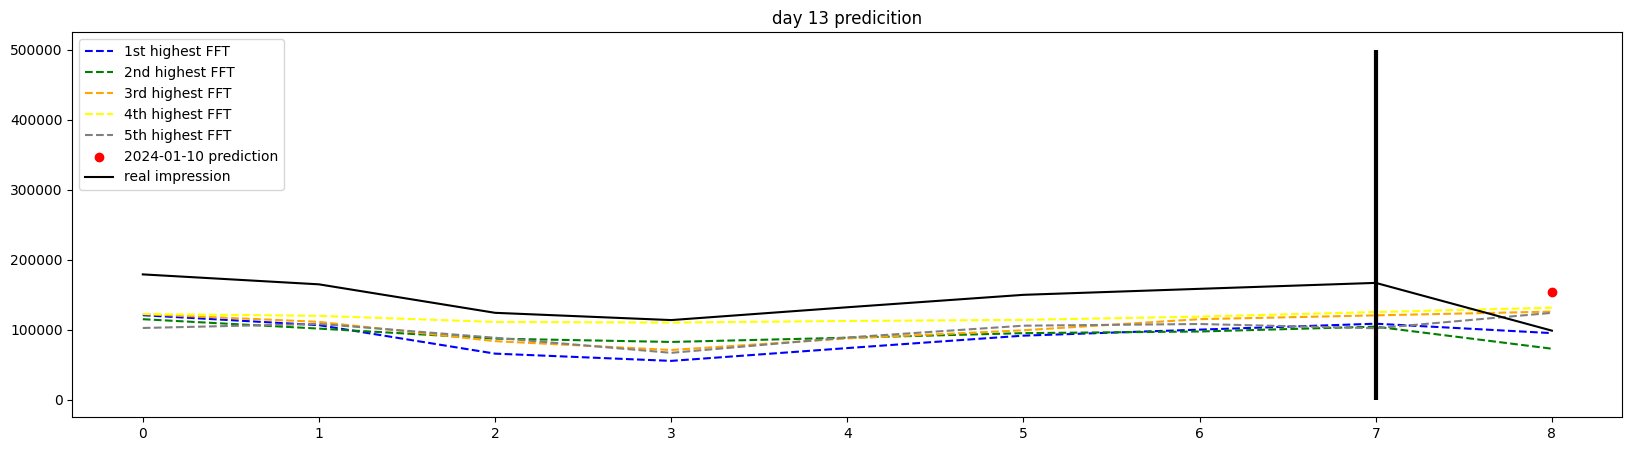

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.7147, fft_similarity: 0.9678, psd_similarity: 0.9978
2nd highest --> linear/fft :0.7385, linear/psd: 0.7163, fft/linear: 1.3541, fft/psd: 0.9699, psd/linear: 1.3961, psd/fft: 1.0310

3rd highest --> linear similarity: 0.5817, fft_similarity: 0.9599, psd_similarity: 0.9985
3rd highest --> linear/fft :0.6059, linear/psd: 0.5825, fft/linear: 1.6503, fft/psd: 0.9614, psd/linear: 1.7166, psd/fft: 1.0402

4th highest --> linear similarity: 0.7470, fft_similarity: 0.9596, psd_similarity: 0.9836
4th highest --> linear/fft :0.7785, linear/psd: 0.7594, fft/linear: 1.2846, fft/psd: 0.9755, psd/linear: 1.3168, psd/fft: 1.0251

5th highest --> linear similarity: 0.7587, fft_similarity:

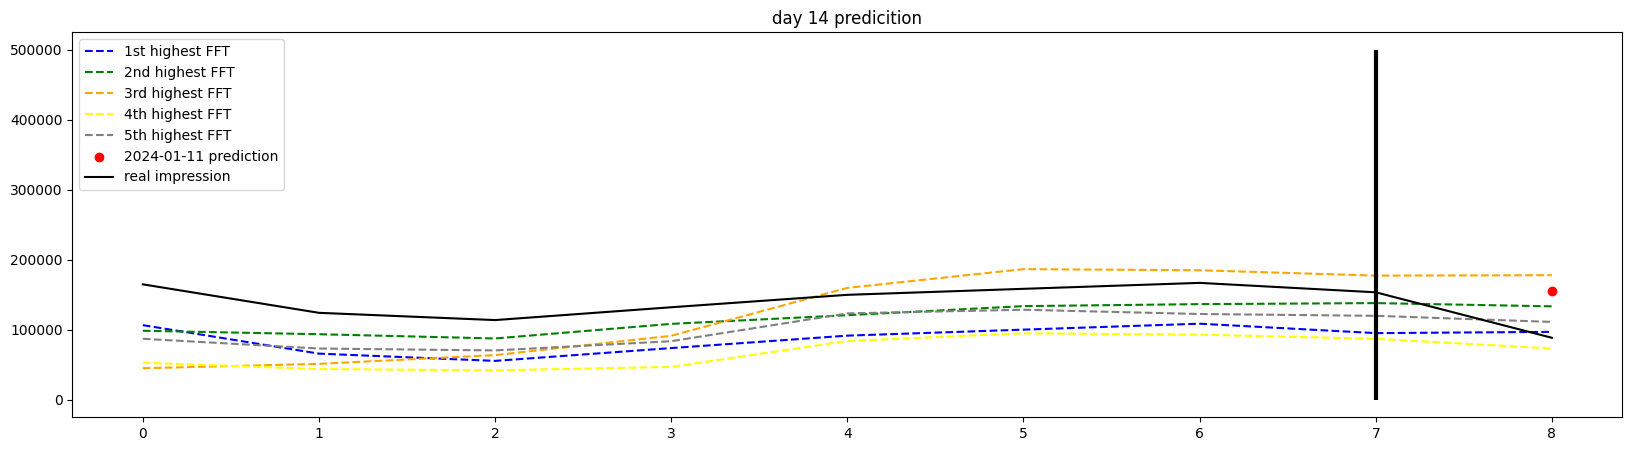

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.8588, fft_similarity: 0.9865, psd_similarity: 0.9976
2nd highest --> linear/fft :0.8705, linear/psd: 0.8608, fft/linear: 1.1487, fft/psd: 0.9888, psd/linear: 1.1617, psd/fft: 1.0113

3rd highest --> linear similarity: 0.9614, fft_similarity: 0.9712, psd_similarity: 0.9997
3rd highest --> linear/fft :0.9899, linear/psd: 0.9617, fft/linear: 1.0102, fft/psd: 0.9716, psd/linear: 1.0398, psd/fft: 1.0293

4th highest --> linear similarity: 0.9687, fft_similarity: 0.9642, psd_similarity: 0.9973
4th highest --> linear/fft :1.0048, linear/psd: 0.9713, fft/linear: 0.9953, fft/psd: 0.9667, psd/linear: 1.0295, psd/fft: 1.0344

5th highest --> linear similarity: 0.9333, fft_similarity:

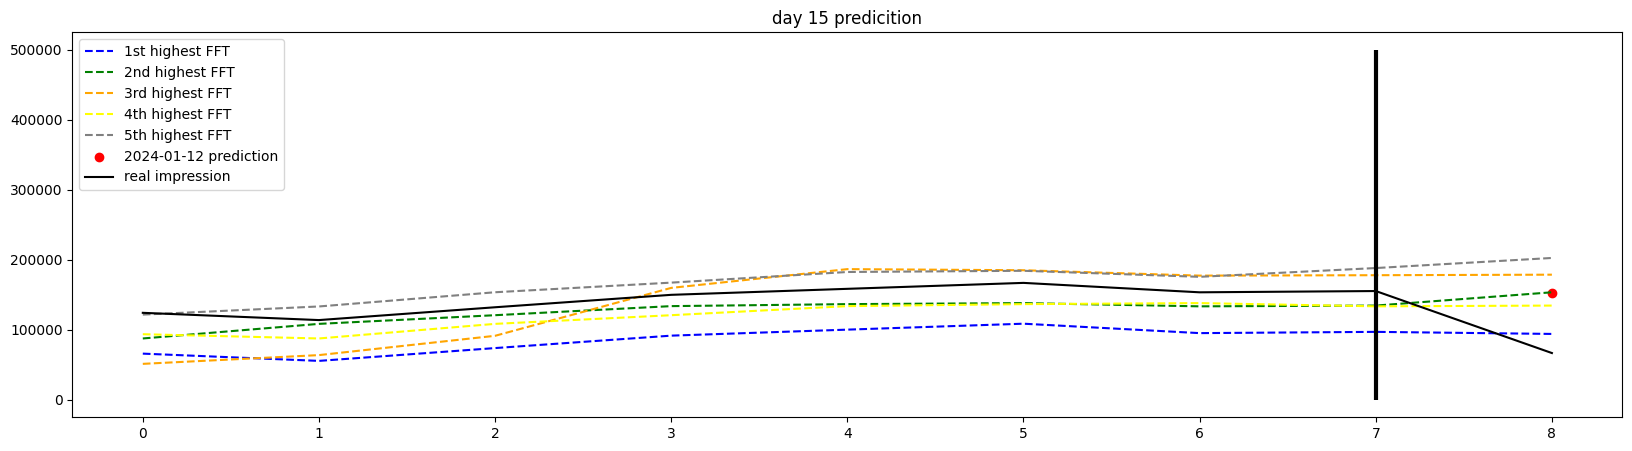

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9655, fft_similarity: 0.9216, psd_similarity: 0.9951
2nd highest --> linear/fft :1.0476, linear/psd: 0.9703, fft/linear: 0.9545, fft/psd: 0.9261, psd/linear: 1.0306, psd/fft: 1.0797

3rd highest --> linear similarity: 0.8079, fft_similarity: 0.9105, psd_similarity: 0.6762
3rd highest --> linear/fft :0.8872, linear/psd: 1.1946, fft/linear: 1.1271, fft/psd: 1.3465, psd/linear: 0.8371, psd/fft: 0.7427

4th highest --> linear similarity: 0.9097, fft_similarity: 0.8945, psd_similarity: 0.9950
4th highest --> linear/fft :1.0171, linear/psd: 0.9143, fft/linear: 0.9832, fft/psd: 0.8989, psd/linear: 1.0938, psd/fft: 1.1124

5th highest --> linear similarity: 0.9126, fft_similarity:

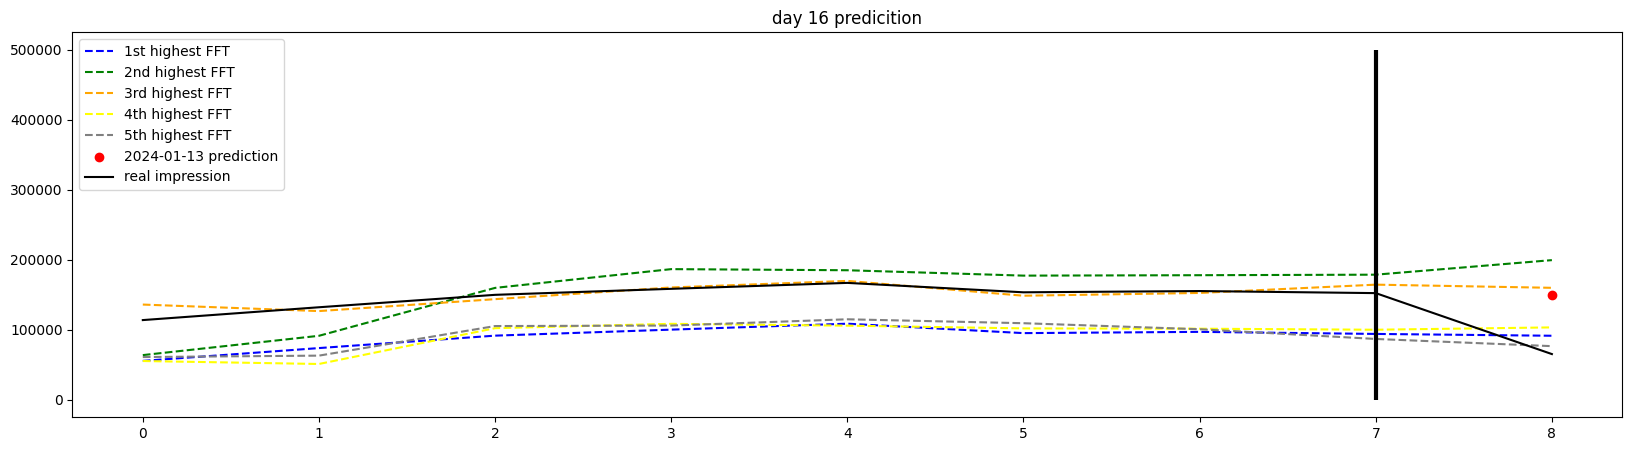

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.7730, fft_similarity: 0.8084, psd_similarity: 0.8049
2nd highest --> linear/fft :0.9562, linear/psd: 0.9604, fft/linear: 1.0458, fft/psd: 1.0044, psd/linear: 1.0412, psd/fft: 0.9956

3rd highest --> linear similarity: 0.7901, fft_similarity: 0.8034, psd_similarity: 0.7496
3rd highest --> linear/fft :0.9834, linear/psd: 1.0539, fft/linear: 1.0169, fft/psd: 1.0718, psd/linear: 0.9488, psd/fft: 0.9331

4th highest --> linear similarity: 0.5333, fft_similarity: 0.7653, psd_similarity: 0.9495
4th highest --> linear/fft :0.6969, linear/psd: 0.5617, fft/linear: 1.4350, fft/psd: 0.8060, psd/linear: 1.7804, psd/fft: 1.2407

5th highest --> linear similarity: 0.5110, fft_similarity:

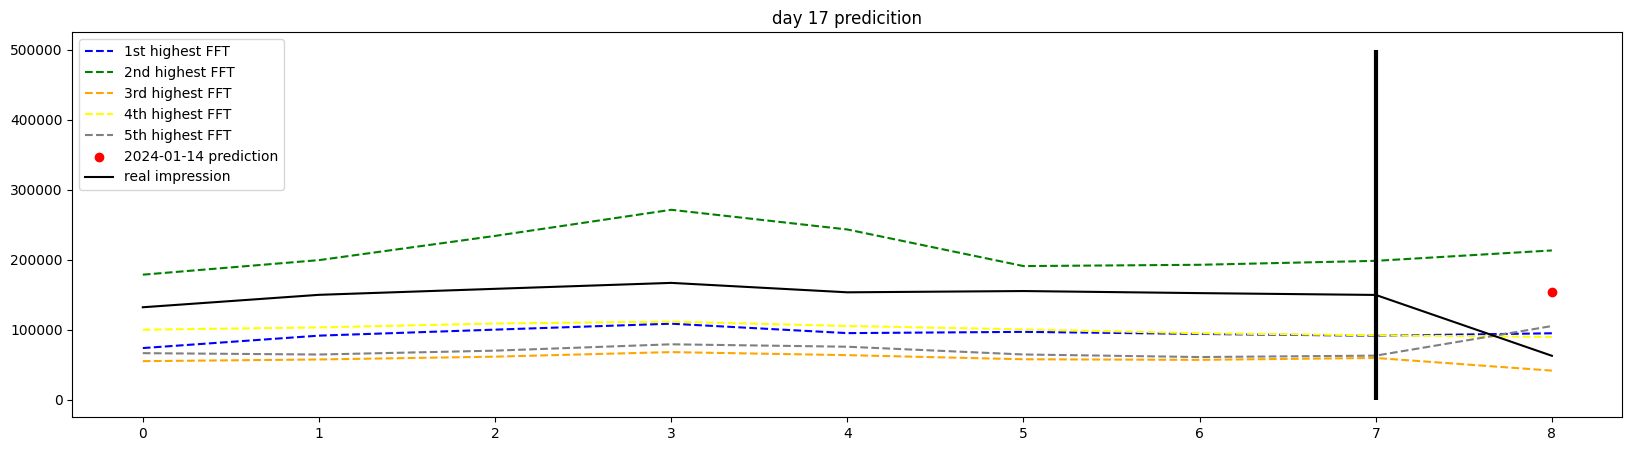

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.6533, fft_similarity: 0.9237, psd_similarity: 0.9146
2nd highest --> linear/fft :0.7073, linear/psd: 0.7143, fft/linear: 1.4139, fft/psd: 1.0099, psd/linear: 1.4001, psd/fft: 0.9902

3rd highest --> linear similarity: 0.7446, fft_similarity: 0.8761, psd_similarity: 0.9107
3rd highest --> linear/fft :0.8498, linear/psd: 0.8176, fft/linear: 1.1767, fft/psd: 0.9621, psd/linear: 1.2231, psd/fft: 1.0394

4th highest --> linear similarity: 0.5788, fft_similarity: 0.8634, psd_similarity: 0.7012
4th highest --> linear/fft :0.6704, linear/psd: 0.8255, fft/linear: 1.4916, fft/psd: 1.2313, psd/linear: 1.2113, psd/fft: 0.8121

5th highest --> linear similarity: 0.5784, fft_similarity:

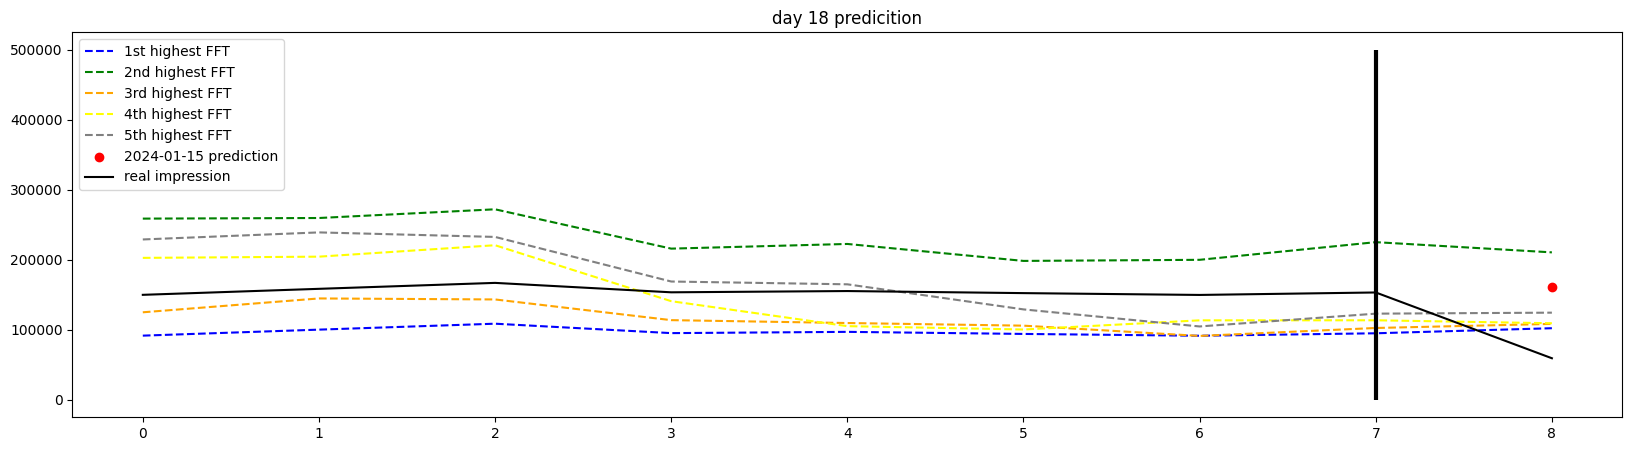

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.6369, fft_similarity: 0.9063, psd_similarity: 0.9950
2nd highest --> linear/fft :0.7028, linear/psd: 0.6402, fft/linear: 1.4230, fft/psd: 0.9109, psd/linear: 1.5621, psd/fft: 1.0978

3rd highest --> linear similarity: 0.7815, fft_similarity: 0.8860, psd_similarity: 0.9996
3rd highest --> linear/fft :0.8820, linear/psd: 0.7817, fft/linear: 1.1338, fft/psd: 0.8863, psd/linear: 1.2792, psd/fft: 1.1283

4th highest --> linear similarity: 0.8000, fft_similarity: 0.8859, psd_similarity: 0.9938
4th highest --> linear/fft :0.9030, linear/psd: 0.8050, fft/linear: 1.1075, fft/psd: 0.8915, psd/linear: 1.2423, psd/fft: 1.1217

5th highest --> linear similarity: 0.7314, fft_similarity:

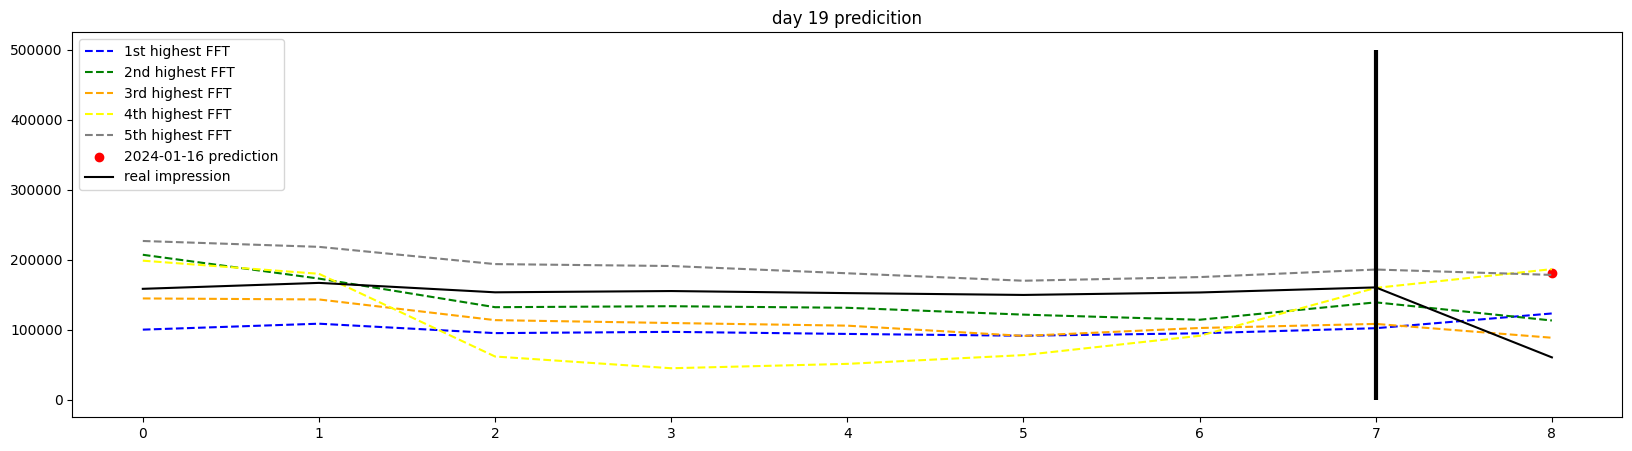

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.6605, fft_similarity: 0.9881, psd_similarity: 0.9964
2nd highest --> linear/fft :0.6685, linear/psd: 0.6629, fft/linear: 1.4960, fft/psd: 0.9917, psd/linear: 1.5085, psd/fft: 1.0084

3rd highest --> linear similarity: 0.9409, fft_similarity: 0.9736, psd_similarity: 0.9947
3rd highest --> linear/fft :0.9664, linear/psd: 0.9459, fft/linear: 1.0348, fft/psd: 0.9788, psd/linear: 1.0572, psd/fft: 1.0217

4th highest --> linear similarity: 0.8299, fft_similarity: 0.9579, psd_similarity: 0.9974
4th highest --> linear/fft :0.8665, linear/psd: 0.8322, fft/linear: 1.1541, fft/psd: 0.9604, psd/linear: 1.2017, psd/fft: 1.0412

5th highest --> linear similarity: 0.9381, fft_similarity:

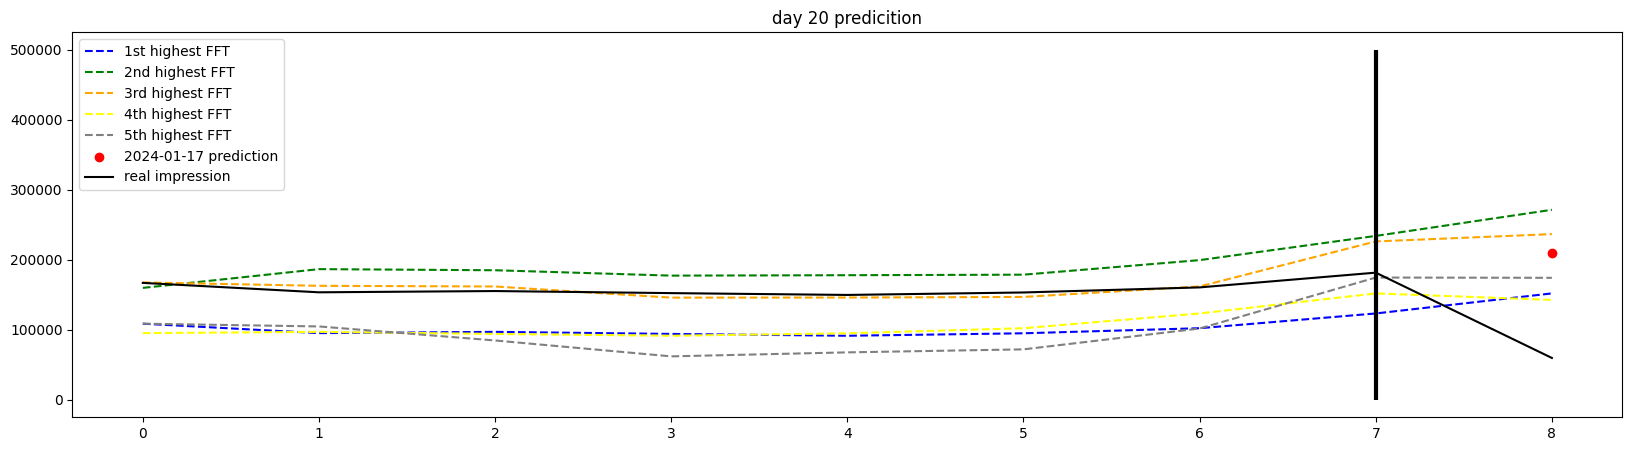

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9930, fft_similarity: 0.9935, psd_similarity: 0.9991
2nd highest --> linear/fft :0.9995, linear/psd: 0.9939, fft/linear: 1.0005, fft/psd: 0.9944, psd/linear: 1.0061, psd/fft: 1.0056

3rd highest --> linear similarity: 0.9508, fft_similarity: 0.9685, psd_similarity: 0.9858
3rd highest --> linear/fft :0.9817, linear/psd: 0.9646, fft/linear: 1.0186, fft/psd: 0.9825, psd/linear: 1.0367, psd/fft: 1.0178

4th highest --> linear similarity: 0.9642, fft_similarity: 0.9665, psd_similarity: 0.9722
4th highest --> linear/fft :0.9977, linear/psd: 0.9918, fft/linear: 1.0023, fft/psd: 0.9941, psd/linear: 1.0083, psd/fft: 1.0060

5th highest --> linear similarity: 0.9210, fft_similarity:

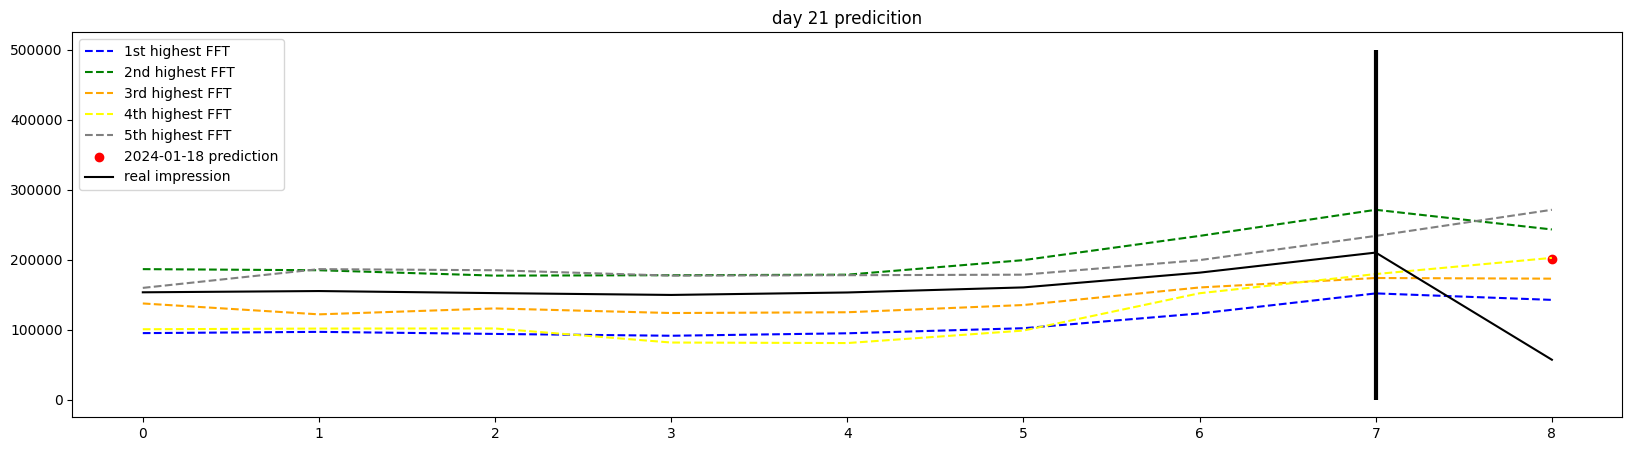

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9849, fft_similarity: 0.9838, psd_similarity: 0.9986
2nd highest --> linear/fft :1.0011, linear/psd: 0.9863, fft/linear: 0.9989, fft/psd: 0.9852, psd/linear: 1.0139, psd/fft: 1.0150

3rd highest --> linear similarity: 0.9768, fft_similarity: 0.9834, psd_similarity: 0.9975
3rd highest --> linear/fft :0.9932, linear/psd: 0.9792, fft/linear: 1.0068, fft/psd: 0.9859, psd/linear: 1.0212, psd/fft: 1.0143

4th highest --> linear similarity: 0.8780, fft_similarity: 0.9771, psd_similarity: 0.9907
4th highest --> linear/fft :0.8986, linear/psd: 0.8862, fft/linear: 1.1129, fft/psd: 0.9863, psd/linear: 1.1284, psd/fft: 1.0139

5th highest --> linear similarity: 0.9723, fft_similarity:

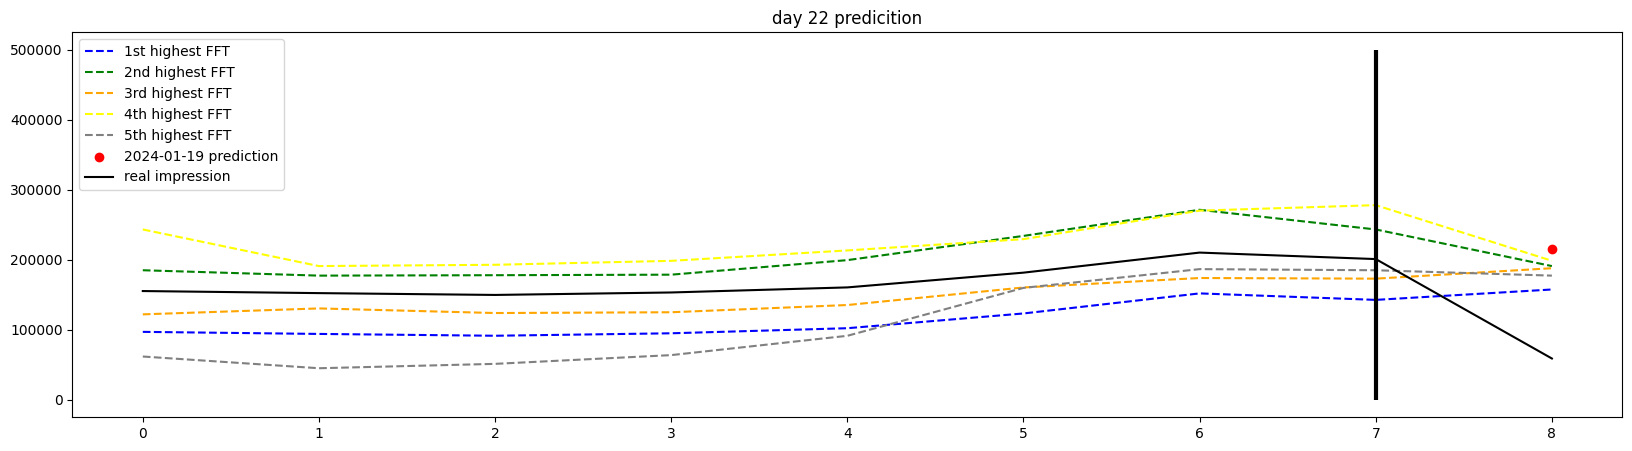

idx with highest FFT, yet positive linear similarity ? -->  0
1st highest --> linear similarity: 1.0000, fft_similarity: 1.0000, psd_similarity: 1.0000
1st highest --> linear/fft :1.0000, linear/psd: 1.0000, fft/linear: 1.0000, fft/psd: 1.0000, psd/linear: 1.0000, psd/fft: 1.0000

2nd highest --> linear similarity: 0.9880, fft_similarity: 0.9876, psd_similarity: 0.9987
2nd highest --> linear/fft :1.0004, linear/psd: 0.9893, fft/linear: 0.9996, fft/psd: 0.9889, psd/linear: 1.0109, psd/fft: 1.0112

3rd highest --> linear similarity: 0.9710, fft_similarity: 0.9806, psd_similarity: 0.9992
3rd highest --> linear/fft :0.9903, linear/psd: 0.9718, fft/linear: 1.0098, fft/psd: 0.9814, psd/linear: 1.0290, psd/fft: 1.0190

4th highest --> linear similarity: 0.9691, fft_similarity: 0.9718, psd_similarity: 0.9951
4th highest --> linear/fft :0.9972, linear/psd: 0.9739, fft/linear: 1.0028, fft/psd: 0.9766, psd/linear: 1.0268, psd/fft: 1.0239

5th highest --> linear similarity: 0.8778, fft_similarity:

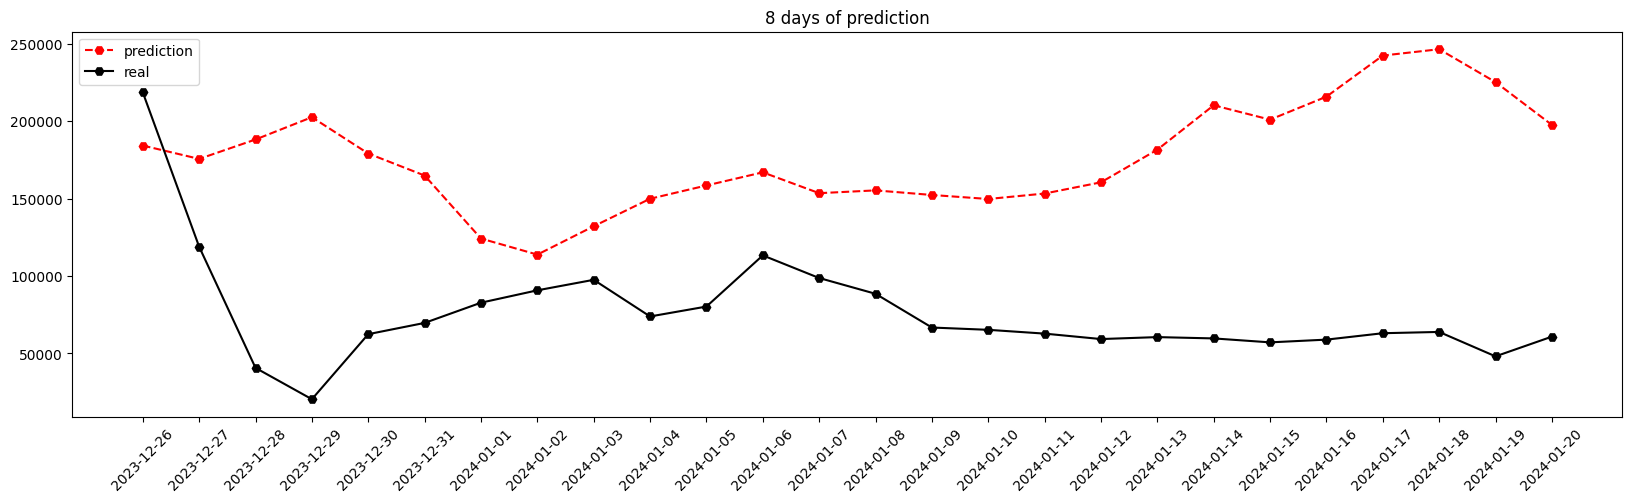

In [41]:
# 우선 바로 다음날짜만 구해보는 것 시도, 노이즈 데이터 제거 할 수 있으면 베리 굿
# 끝에서부터
# import warnings; warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import warnings; warnings.filterwarnings('ignore')
from datetime import datetime

train_df = train_romand_df.loc[:, ['impression', 'date']] # 데이터 다시 비워주기

r = 8

for iter in range(len(test_df)):
  # print(iter)

  # -- 유사도 측정 ---------------------------------------------------------------------------------------------------------------------------------------
  range_days = r                                                             # FFT로 사용할 기간 범위
  fixed_range = list(train_df['impression'].iloc[-range_days:])                              # train_df 맨끝에서부터 range_days에 대한 고정된 기간
  linear_list, fft_list, psd_list = list(), list(), list()                                   # 선형, FFT, PSD를 담아줄 리스트
  fft_df = pd.DataFrame(columns = ['linear_similarity', 'fft_similarity', 'psd_similarity']) # 위의 리스트를 데이터프레임화

  for i in range(1, len(train_df)): # --> 우선 365일을 고정으로 했지만 나중에 다른 로직으로 교체 필요
    flexible_range = list(train_df['impression'].iloc[-(range_days+i):-i])                            # 하루씩 밀리는 변동되는 구간 --> "fixed range" (고정된 기간)과 FFT를 통해 유사도를 측정
    linear_similarity, fft_similarity, psd_simliarity = fft_media_expect(flexible_range, fixed_range) # FFT 함수 적용

    linear_list.append(float(linear_similarity)) # 적용 후의 선형 유사도 --> negative가 아닌 것을 찾기 위해
    fft_list.append(float(fft_similarity))       # 적용 후의 FFT 유사도
    psd_list.append(float(psd_simliarity))       # 적용 후의 PSD 유사도

    if (len(train_df)-1) - (range_days+i) < 0:                 # range_days보다 적은 데이터를 유사도로 측정할 경우 stop
      break

  fft_df['linear_similarity'], fft_df['fft_similarity'], fft_df['psd_similarity'] = linear_list, fft_list, psd_list # 유사도 리스트들을 데이터프레임화

  # -- FFT 유사도가 가장 높고 선형 유사도는 negative가 아닌 데이터의 인덱스 찾기 -----------------------------------------------------------------------------------
  argsort_idx_list = list(np.argsort(list(fft_df['fft_similarity']))[::-1]) # np.argsort를 통해 FFT 유사도가 가장 높은 순으로 정렬
  idx = 0
  next_point_idx = 0


  while True:
    if fft_df.loc[argsort_idx_list[idx], 'linear_similarity'] > 0:
      # print('FFT 유사도: ', fft_df.loc[argsort_idx_list[idx], 'fft_similarity'])
      next_point_idx = argsort_idx_list[idx]-1 # -1이 되어야 함 -->
      break
    else: # 선형 유사도가 negative라면
      idx+=1


  current_point = train_df['impression'].iloc[-(argsort_idx_list[idx]+1+1)]          # 예측을 하기 전의 데이터 포인트
  next_point = train_df['impression'].iloc[-(next_point_idx+1+1)]          # 예측 후의 데이터 포인트

  # -- FFT 유사도가 높았던 5개 선의 선형, FFT, PSD 유사도 출력
  print('idx with highest FFT, yet positive linear similarity ? --> ', idx)
  print('1st highest --> linear similarity: {:.4f}, fft_similarity: {:.4f}, psd_similarity: {:.4f}'.format(
                                                                      fft_df['linear_similarity'].iloc[argsort_idx_list[idx]],
                                                                      fft_df['fft_similarity'].iloc[argsort_idx_list[idx]],
                                                                      fft_df['psd_similarity'].iloc[argsort_idx_list[idx]]))
  print('1st highest --> linear/fft :{:.4f}, linear/psd: {:.4f}, fft/linear: {:.4f}, fft/psd: {:.4f}, psd/linear: {:.4f}, psd/fft: {:.4f}'.format(
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx]],
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx]],
  ))
  print('')
  print('2nd highest --> linear similarity: {:.4f}, fft_similarity: {:.4f}, psd_similarity: {:.4f}'.format(
                                                                      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+1]],
                                                                      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+1]],
                                                                      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+1]]))
  print('2nd highest --> linear/fft :{:.4f}, linear/psd: {:.4f}, fft/linear: {:.4f}, fft/psd: {:.4f}, psd/linear: {:.4f}, psd/fft: {:.4f}'.format(
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+1]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+1]],
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+1]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+1]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+1]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+1]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+1]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+1]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+1]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+1]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+1]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+1]],
  ))
  print('')
  print('3rd highest --> linear similarity: {:.4f}, fft_similarity: {:.4f}, psd_similarity: {:.4f}'.format(
                                                                      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+2]],
                                                                      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+2]],
                                                                      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+2]]))
  print('3rd highest --> linear/fft :{:.4f}, linear/psd: {:.4f}, fft/linear: {:.4f}, fft/psd: {:.4f}, psd/linear: {:.4f}, psd/fft: {:.4f}'.format(
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+2]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+2]],
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+2]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+2]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+2]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+2]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+2]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+2]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+2]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+2]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+2]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+2]],
  ))
  print('')
  print('4th highest --> linear similarity: {:.4f}, fft_similarity: {:.4f}, psd_similarity: {:.4f}'.format(
                                                                      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+3]],
                                                                      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+3]],
                                                                      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+3]]))
  print('4th highest --> linear/fft :{:.4f}, linear/psd: {:.4f}, fft/linear: {:.4f}, fft/psd: {:.4f}, psd/linear: {:.4f}, psd/fft: {:.4f}'.format(
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+3]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+3]],
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+3]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+3]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+3]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+3]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+3]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+3]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+3]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+3]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+3]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+3]],
  ))
  print('')
  print('5th highest --> linear similarity: {:.4f}, fft_similarity: {:.4f}, psd_similarity: {:.4f}'.format(
                                                                      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+4]],
                                                                      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+4]],
                                                                      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+4]]))
  print('5th highest --> linear/fft :{:.4f}, linear/psd: {:.4f}, fft/linear: {:.4f}, fft/psd: {:.4f}, psd/linear: {:.4f}, psd/fft: {:.4f}'.format(
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+4]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+4]],
      fft_df['linear_similarity'].iloc[argsort_idx_list[idx+4]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+4]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+4]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+4]],
      fft_df['fft_similarity'].iloc[argsort_idx_list[idx+4]]/fft_df['psd_similarity'].iloc[argsort_idx_list[idx+4]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+4]]/fft_df['linear_similarity'].iloc[argsort_idx_list[idx+4]],
      fft_df['psd_similarity'].iloc[argsort_idx_list[idx+4]]/fft_df['fft_similarity'].iloc[argsort_idx_list[idx+4]],
  ))
  print('')




  # -- momentum --
  tan_momentum = (next_point - current_point)                           # tan 변동률
  # tan_momentum = (next_point/current_point)
  prediction = (list(train_df['impression'])[-1])+tan_momentum
  # prediction = (list(train_df['impression'])[-1])*tan_momentum

  if iter <= 21:
    label_for_visualization_1 = '1st highest FFT'
    label_for_visualization_2 = '2nd highest FFT'
    label_for_visualization_3 = '3rd highest FFT'
    label_for_visualization_4 = '4th highest FFT'
    label_for_visualization_5 = '5th highest FFT'


    plt.figure(figsize=(20,5))
                                                                                                        # 그 다음선까지 표현하기 위해 -1함 (원래선은 -1를 안하지만 next point까지 보여주기 위해)
    plt.plot(list(train_df['impression'].iloc[-(range_days+argsort_idx_list[idx]+1):-(argsort_idx_list[idx]+1-1)]), color='blue', linestyle='dashed', label=label_for_visualization_1)
    plt.plot(list(train_df['impression'].iloc[-(range_days+argsort_idx_list[idx+1]+1):-(argsort_idx_list[idx+1]+1-1)]), color='green', linestyle='dashed', label=label_for_visualization_2)
    plt.plot(list(train_df['impression'].iloc[-(range_days+argsort_idx_list[idx+2]+1):-(argsort_idx_list[idx+2]+1-1)]), color='orange', linestyle='dashed', label=label_for_visualization_3)
    plt.plot(list(train_df['impression'].iloc[-(range_days+argsort_idx_list[idx+3]+1):-(argsort_idx_list[idx+3]+1-1)]), color='yellow', linestyle='dashed', label=label_for_visualization_4)
    plt.plot(list(train_df['impression'].iloc[-(range_days+argsort_idx_list[idx+4]+1):-(argsort_idx_list[idx+4]+1-1)]), color='grey', linestyle='dashed', label=label_for_visualization_5)


    plt.scatter([range_days], [prediction], color='red', label='{} prediction'.format(datetime.strftime(pd.to_datetime('2023-12-28') + timedelta(days=iter+1), "%Y-%m-%d")))
    tmp_value = list(test_df['impression'])[iter]
    tmp_list = list(train_df['impression'].iloc[-(range_days):])
    tmp_list.append(tmp_value)
    plt.plot(tmp_list, color='black', label='real impression')
    plt.vlines(7, 0, 500000, color='black', linewidth=3)
    plt.title('day {} predicition'.format(iter+1))
    plt.legend(loc='upper left')
    plt.show()


  # train_romand_df에 예측값 넣어주기
  train_df.loc[len(train_df), 'impression'] = prediction                               # 최종 예측값을 train_df 맨 뒤에 넣기
  last_day = pd.to_datetime(train_df.loc[len(train_df)-2, 'date']) + timedelta(days=1) # 최종 예측값에 다음 날짜를 적용
  train_df.loc[len(train_df)-1, 'date'] = last_day                                     # 최종 예측값에 다음 날짜를 적용 22


# 가장 유사도가 높았다고

# fft의 유사도가 큰 기준의 인덱스로 선형과 fft, psd의 유사도를 같이 넣어주기
# linear_fft_psd_comparison_df[f'linear_{range_days}days'] = fft_df.loc[argsort_idx_list, 'linear_similarity']
# linear_fft_psd_comparison_df[f'fft_{range_days}days'] = fft_df.loc[argsort_idx_list, 'fft_similarity']
# linear_fft_psd_comparison_df[f'psd_{range_days}days'] = fft_df.loc[argsort_idx_list, 'psd_similarity']

# 시각화
train_ts_df = train_df[(len(train_df)-len(test_df)):].set_index('date')
test_ts_df = test_df.set_index('date')

plt.figure(figsize=(20,5))
plt.plot(train_ts_df, label='prediction', color='red', linestyle='dashed', marker='H')
plt.plot(test_ts_df, label='real', color='black', marker='H')
plt.legend()
plt.title(f'{range_days} days of prediction')
plt.xticks(test_df['date'], rotation=45, size=10)
plt.show()


## Traffic+Conversion Prediction

In [33]:
impression= [216517,181159,223795,254540,289034,305006,274908,285425,305251,258301,259301,253466,243647,245477,268947,273619,234622,261744,277969,292771,295343,336984,321190,356987,366865,360025,309340,310491,320253,336198,317227,332624,354241,645123,627846,678096,659699,608862,537575,567151,475551,474143,513574,498979,487866,333535,358970,298029,244727,263474,258307,271706,229853,231861,290756,364195,391969,485552,450087,484875,303644,221819,222644,244784,240739,237359,222386,310081,378929,367304,391281,411581,384817,354716,363893,410120,396694,413966,388402,395336,412953,378841,352415,359229,389158,387479,377255,358454,393589,329115,310587,318038,316731,304973,319485,346318,448477,466253,532969,482438,307807,223309,231419,221086,241763,270809,238745,217460,146710,130937,159014,196910,208456,226918,199716,206717,210702,202936,212107,228379,274310,359431,312621,338391,397964,394772,394556,337775,298818,226874,214266,221313,205055,238845,221900,192621,183894,188982,193669,186173,205432,163785,183007,191280,220912,215024,228733,238630,247634,225760,327245,292067,282914,301832,325290,311893,299025,256240,269531,259290,231061,241181,277018,295925,311734,379486,343498,358340,358776,358746,290122,311450,315025,288348,273415,308370,282096,202927,173797,133293,123994,256545,246621,264059,258184,228467,210338,213202,212890,223255,211732,213903,211603,207973,201630,198235,202107,204971,199956,192855,178787,209498,233502,254526,267703,258028,251363,266797,286674,281174,327583,335503,254982,235008,220867,245547,263660,278491,212523,224779,237688,242823,236295,236909,241809,262076,248334,229591,247811,260092,268683,259373,252959,227970,220943,223611,240153,312528,332197,275228,242227,331521,303194,99217,0,0,0,86157,97748,122957,155203,226881,250514,269752,276515,282924,282564,296205,341162,391336,375825,308344,308490,287093,296068,323733,371729,386803,309209,308302,343465,397394,353153,393501,391181,370341,257844,290336,257504,274103,294880,290374,274258,231343,181121,141862,161769,191914,246609,389477,382323,387927,409959,419646,444236,405938,374467,277387,159778,158627,175957,194467,181745,147488,165079,176592,168287,174751,111582,136553,127010,127168,137390,86287,100002,108637,143762,127829,126016,130222,144167,150386,142326,124759,122227,118413,235423,242924,269190,272678,255526,235731,223699,247799,136280,132470,146665,125685,111945,103407,104665,232952,249209,277484,227686,174586,154094,169200,294219,356348,356294,355107,322195,330324,280797,261069,267330,271746,292465,294509,275784,303131,366789,398118,454959]
cost= [583404,563955,775334,897207,913246,926684,944354,1013966,971897,935562,926207,914299,930678,957091,1007185,900847,841834,831197,945965,1198894,1231988,1318583,1277879,1228535,1209185,1212737,1269584,1232599,1318561,1266305,1226577,1209216,1331651,2395467,2503521,2582843,2479956,2519620,2339040,2276728,2062729,2049019,2217472,2024618,1824295,1560353,1497851,1265847,1143992,1221253,1170883,1136775,990707,961620,1262889,1853988,2008560,2087512,2248672,2252095,1782620,1635725,1667842,1737559,1663858,1623143,1614370,1629885,2028171,2075419,2168667,2068534,2023950,2054212,2045573,2079709,2121076,2215316,2132807,2065975,2062500,2038782,2069953,2114667,2214566,2125286,2063890,2128789,2326312,1877734,1523061,1259139,1213179,1182828,1193717,1190736,1110865,915348,998853,1101812,1201163,1220684,1213910,1224094,1264361,1315092,1256755,1225813,891622,719858,862024,1024527,1115534,1068081,1041557,1030806,1023116,1027480,1043426,1103991,1281669,1725179,1701505,1714593,1734073,1763840,1844349,1586470,1466331,1099521,968403,974507,1011011,1053590,1003742,976571,985314,980737,988138,1011908,1001881,828456,1062438,1094609,1107340,1071599,1057486,1068654,1069462,1042097,1605423,1510855,1449699,1446281,1537254,1476201,1475096,1520527,1551033,1486697,1469501,1579822,1725497,1770326,1942928,2237338,2250875,2314855,2423500,2147793,1975135,2021223,2091273,1941190,1894069,2004359,1726235,1370301,1365914,1200174,1131729,1780758,1819474,1764200,1726988,1708733,1699825,1720815,1768782,1819508,1761668,1789004,2011295,2016729,2018335,2048770,2159708,2091182,1827401,1797056,1803914,2015521,2164851,2316365,2223125,2168410,2143678,2144498,2179502,2275310,2572729,2519210,1230885,1218195,1223067,1232995,1262862,1314329,1066235,1239391,1241124,1240171,1238620,1310922,1312567,1249235,1197451,1146304,1303822,1319060,1376987,1378364,1294390,1130244,1101553,1115706,1234592,1583439,1649379,1405880,1233436,1931830,1931063,574875,0,0,0,834376,725112,659158,808354,1207231,1301675,1352996,1526588,1622657,1744471,1914217,2134877,2307455,2203570,2057888,2029844,1923175,1971948,2033072,2214877,2152097,1829351,1529337,1506294,1523230,1546802,1630683,1575969,1540334,1126333,1366508,1194140,1038501,1110230,1073849,1049243,1042809,910010,751943,763062,801592,1288534,2441755,2484668,2466053,2550127,2642899,2717762,2614738,2526429,1835299,984204,990823,1007344,1069126,1006410,966027,955081,976544,937359,897842,642947,716635,678393,674298,813352,467031,448023,482432,703587,643045,606480,596891,606623,623382,608254,589003,570744,565701,1321181,1625710,1635608,1675377,1546725,1452220,1425649,1427180,837410,771245,839056,746050,688256,663014,602996,1397281,1415974,1332599,1132552,912108,799645,862016,1458383,1654734,1740582,1692966,1614300,1616479,1438259,1399068,1438049,1491858,1442871,1390913,1359957,1557061,1928671,1982758,2072424]

test_impression= [543406,310370,186691,106327,135649,130241,147150,153791,233736,272703,287376,299117,319325,366734,237996,211539,242925,251032,360090,290501,240744,237422]
test_cost= [1993393,1515504,1030680,638092,685686,705129,751806,784625,1107988,1231382,1235965,1311485,1395953,1437695,1100106,1063991,1173525,1352235,1682671,1161467,941371,992454]

preprocessed_train_df = pd.DataFrame({'impression' : impression, 'cost': cost})
preprocessed_train_df = preprocessed_train_df.drop([244, 245, 246], axis=0).reset_index(drop=True)
preprocessed_train_df['date'] = pd.to_datetime(pd.date_range('2023-01', '2023-12-28'))

train_romand_df = preprocessed_train_df.copy()
train_df = train_romand_df.iloc[:, [0,2]]

preprocessed_test_df = pd.DataFrame({'impression' : test_impression, 'cost': test_cost})
preprocessed_test_df['date'] = pd.to_datetime(pd.date_range('2023-12-29', '2024-01-19'))

test_romand_df = preprocessed_test_df.copy()
test_df = test_romand_df.iloc[:, [0,2]]


  0%|          | 0/22 [00:00<?, ?it/s]

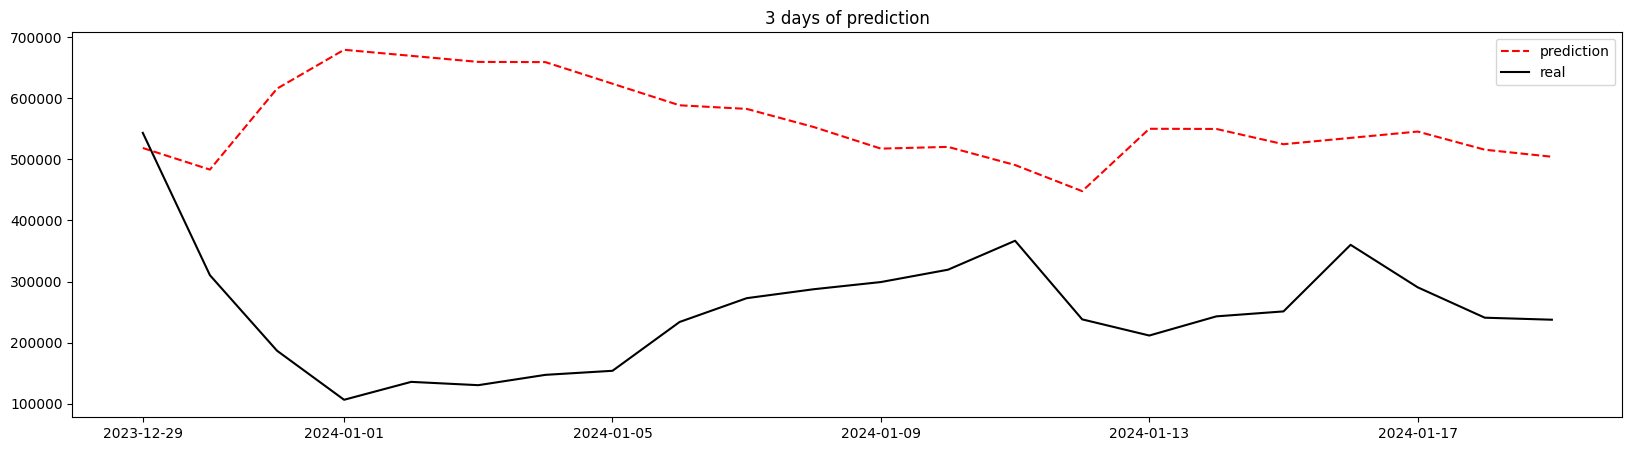

KeyboardInterrupt: 

In [43]:
# 우선 바로 다음날짜만 구해보는 것 시도, 노이즈 데이터 제거 할 수 있으면 베리 굿
# 끝에서부터
# import warnings; warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

train_df = train_romand_df.loc[:, ['impression', 'date']] # 처음 시작때 데이터 프레임 초기화 --> impression만 가져옴, 이후 cost 등의 데이터도 가져올 수 있음

range_days_list = list(range(3, 24+1))

prediction_excel_file_df = pd.DataFrame()                 # 예측 데이터 엑셀로 내보내기 위한 데이터 프레임
prediction_excel_file_df['date'] = pd.to_datetime(pd.date_range('2023-12-29', '2024-01-19'))
prediction_excel_file_df['test_data'] = test_impression

for r in tqdm(range_days_list):

  for iter in range(len(test_df)):                        # 22일치의 데이터에 대한 예측 --> 변동 가능
    # print(iter)

    # -- 유사도 측정 --
    range_days = r                                                                             # FFT로 사용할 기간 범위
    fixed_range = list(train_df['impression'].iloc[-range_days:])                              # train_df 맨끝에서부터 range_days에 대한 고정된 기간
    linear_list, fft_list, psd_list = list(), list(), list()                                   # 선형, FFT, PSD를 담아줄 리스트
    fft_df = pd.DataFrame(columns = ['linear_similarity', 'fft_similarity', 'psd_similarity']) # 위의 리스트를 데이터프레임화

    for i in range(1, len(train_df)):
      flexible_range = list(train_df['impression'].iloc[-(range_days+i):-i])                             # 하루씩 밀리는 변동되는 구간 --> "fixed range" (고정된 기간)과 FFT를 통해 유사도를 측정
      linear_similarity, fft_similarity, psd_simliarity = fft_media_expect(flexible_range, fixed_range)  # FFT 함수 적용

      linear_list.append(float(linear_similarity))    # 적용 후의 선형 유사도 --> negative가 아닌 것을 찾기 위해
      fft_list.append(float(fft_similarity))          # 적용 후의 FFT 유사도
      psd_list.append(float(psd_simliarity))          # 적용 후의 PSD 유사도

      if (len(train_df) - 1) - (range_days+i) < 0:    # range_days보다 적은 데이터를 유사도로 측정할 경우 stop
        break

    fft_df['linear_similarity'], fft_df['fft_similarity'], fft_df['psd_similarity'] = linear_list, fft_list, psd_list # 유사도 리스트들을 데이터프레임화

    # -- FFT 유사도가 가장 높고 선형 유사도는 negative가 아닌 데이터의 인덱스 찾기 --
    argsort_idx_list = list(np.argsort(list(fft_df['fft_similarity']))[::-1])                                         # np.argsort를 통해 FFT 유사도가 가장 높은 순으로 정렬
    idx = 0
    next_point_idx = 0


    while True:
      if fft_df.loc[argsort_idx_list[idx], 'linear_similarity'] > 0:
        # print('FFT 유사도: ', fft_df.loc[argsort_idx_list[idx], 'fft_similarity'])
        next_point_idx = argsort_idx_list[idx]+1
        break
      else: # 선형 유사도가 negative라면 인덱스 (idx)에 +1
        idx+=1

    current_point = train_df.loc[argsort_idx_list[idx], 'impression']          # 예측을 하기 전의 데이터 포인트
    next_point = train_df.loc[next_point_idx, 'impression']                    # 예측 후의 데이터 포인트


    prev_momentum_ratio = (next_point - current_point) / current_point      # 유사도가 가장 높았던 선의 바로 다음 데이터 포인트의 변동률 (momentum)
    prediction = (list(train_df['impression'])[-1])*(1+prev_momentum_ratio) # 변동률을 실제 예측하기 직전 데이터 포인트에 적용 --> 최종 예측값

    tan_momentum = next_point - current_point                               # tan 변동률
    prediction = (list(train_df['impression'])[-1])+tan_momentum

    # train_romand_df에 예측값 넣어주기
    train_df.loc[len(train_df), 'impression'] = prediction                               # 최종 예측값을 train_df 맨 뒤에 넣기
    last_day = pd.to_datetime(train_df.loc[len(train_df)-2, 'date']) + timedelta(days=1) # 최종 예측값에 다음 날짜를 적용
    train_df.loc[len(train_df)-1, 'date'] = last_day                                     # 최종 예측값에 다음 날짜를 적용 22

  # 시각화
  train_ts_df = train_df[(len(train_df) - len(test_df)):].set_index('date')
  test_ts_df = test_df.set_index('date')

  plt.figure(figsize=(20,5))
  plt.plot(train_ts_df, label='prediction', color='red', linestyle='dashed')
  plt.plot(test_ts_df, label='real', color='black')
  plt.legend()
  plt.title(f'{range_days} days of prediction')
  plt.show()

  prediction_excel_file_df[f'best_preds_{range_days}days'] = list(train_df.loc[(len(train_df) - len(test_df)):, 'impression'])

  train_df = train_romand_df.loc[:, ['impression', 'date']] # 새로운 기간 범위로 예측을 해주기 위해 데이터 다시 비워주기

In [ ]:
# excel file로 추출
prediction_excel_file_df.to_excel('노다무_V3_계정전체_tan.xlsx', index=False)

# FFT predict + ML (노스트라다무스) --ML 파트 (전체계정)


In [ ]:
impression= [216517,181159,223795,254540,289034,305006,274908,285425,305251,258301,259301,253466,243647,245477,268947,273619,234622,261744,277969,292771,295343,336984,321190,356987,366865,360025,309340,310491,320253,336198,317227,332624,354241,645123,627846,678096,659699,608862,537575,567151,475551,474143,513574,498979,487866,333535,358970,298029,244727,263474,258307,271706,229853,231861,290756,364195,391969,485552,450087,484875,303644,221819,222644,244784,240739,237359,222386,310081,378929,367304,391281,411581,384817,354716,363893,410120,396694,413966,388402,395336,412953,378841,352415,359229,389158,387479,377255,358454,393589,329115,310587,318038,316731,304973,319485,346318,448477,466253,532969,482438,307807,223309,231419,221086,241763,270809,238745,217460,146710,130937,159014,196910,208456,226918,199716,206717,210702,202936,212107,228379,274310,359431,312621,338391,397964,394772,394556,337775,298818,226874,214266,221313,205055,238845,221900,192621,183894,188982,193669,186173,205432,163785,183007,191280,220912,215024,228733,238630,247634,225760,327245,292067,282914,301832,325290,311893,299025,256240,269531,259290,231061,241181,277018,295925,311734,379486,343498,358340,358776,358746,290122,311450,315025,288348,273415,308370,282096,202927,173797,133293,123994,256545,246621,264059,258184,228467,210338,213202,212890,223255,211732,213903,211603,207973,201630,198235,202107,204971,199956,192855,178787,209498,233502,254526,267703,258028,251363,266797,286674,281174,327583,335503,254982,235008,220867,245547,263660,278491,212523,224779,237688,242823,236295,236909,241809,262076,248334,229591,247811,260092,268683,259373,252959,227970,220943,223611,240153,312528,332197,275228,242227,331521,303194,99217,0,0,0,86157,97748,122957,155203,226881,250514,269752,276515,282924,282564,296205,341162,391336,375825,308344,308490,287093,296068,323733,371729,386803,309209,308302,343465,397394,353153,393501,391181,370341,257844,290336,257504,274103,294880,290374,274258,231343,181121,141862,161769,191914,246609,389477,382323,387927,409959,419646,444236,405938,374467,277387,159778,158627,175957,194467,181745,147488,165079,176592,168287,174751,111582,136553,127010,127168,137390,86287,100002,108637,143762,127829,126016,130222,144167,150386,142326,124759,122227,118413,235423,242924,269190,272678,255526,235731,223699,247799,136280,132470,146665,125685,111945,103407,104665,232952,249209,277484,227686,174586,154094,169200,294219,356348,356294,355107,322195,330324,280797,261069,267330,271746,292465,294509,275784,303131,366789,398118,454959]
cost= [583404,563955,775334,897207,913246,926684,944354,1013966,971897,935562,926207,914299,930678,957091,1007185,900847,841834,831197,945965,1198894,1231988,1318583,1277879,1228535,1209185,1212737,1269584,1232599,1318561,1266305,1226577,1209216,1331651,2395467,2503521,2582843,2479956,2519620,2339040,2276728,2062729,2049019,2217472,2024618,1824295,1560353,1497851,1265847,1143992,1221253,1170883,1136775,990707,961620,1262889,1853988,2008560,2087512,2248672,2252095,1782620,1635725,1667842,1737559,1663858,1623143,1614370,1629885,2028171,2075419,2168667,2068534,2023950,2054212,2045573,2079709,2121076,2215316,2132807,2065975,2062500,2038782,2069953,2114667,2214566,2125286,2063890,2128789,2326312,1877734,1523061,1259139,1213179,1182828,1193717,1190736,1110865,915348,998853,1101812,1201163,1220684,1213910,1224094,1264361,1315092,1256755,1225813,891622,719858,862024,1024527,1115534,1068081,1041557,1030806,1023116,1027480,1043426,1103991,1281669,1725179,1701505,1714593,1734073,1763840,1844349,1586470,1466331,1099521,968403,974507,1011011,1053590,1003742,976571,985314,980737,988138,1011908,1001881,828456,1062438,1094609,1107340,1071599,1057486,1068654,1069462,1042097,1605423,1510855,1449699,1446281,1537254,1476201,1475096,1520527,1551033,1486697,1469501,1579822,1725497,1770326,1942928,2237338,2250875,2314855,2423500,2147793,1975135,2021223,2091273,1941190,1894069,2004359,1726235,1370301,1365914,1200174,1131729,1780758,1819474,1764200,1726988,1708733,1699825,1720815,1768782,1819508,1761668,1789004,2011295,2016729,2018335,2048770,2159708,2091182,1827401,1797056,1803914,2015521,2164851,2316365,2223125,2168410,2143678,2144498,2179502,2275310,2572729,2519210,1230885,1218195,1223067,1232995,1262862,1314329,1066235,1239391,1241124,1240171,1238620,1310922,1312567,1249235,1197451,1146304,1303822,1319060,1376987,1378364,1294390,1130244,1101553,1115706,1234592,1583439,1649379,1405880,1233436,1931830,1931063,574875,0,0,0,834376,725112,659158,808354,1207231,1301675,1352996,1526588,1622657,1744471,1914217,2134877,2307455,2203570,2057888,2029844,1923175,1971948,2033072,2214877,2152097,1829351,1529337,1506294,1523230,1546802,1630683,1575969,1540334,1126333,1366508,1194140,1038501,1110230,1073849,1049243,1042809,910010,751943,763062,801592,1288534,2441755,2484668,2466053,2550127,2642899,2717762,2614738,2526429,1835299,984204,990823,1007344,1069126,1006410,966027,955081,976544,937359,897842,642947,716635,678393,674298,813352,467031,448023,482432,703587,643045,606480,596891,606623,623382,608254,589003,570744,565701,1321181,1625710,1635608,1675377,1546725,1452220,1425649,1427180,837410,771245,839056,746050,688256,663014,602996,1397281,1415974,1332599,1132552,912108,799645,862016,1458383,1654734,1740582,1692966,1614300,1616479,1438259,1399068,1438049,1491858,1442871,1390913,1359957,1557061,1928671,1982758,2072424]

test_impression= [543406,310370,186691,106327,135649,130241,147150,153791,233736,272703,287376,299117,319325,366734,237996,211539,263956,281437,360090,290501,240744,237514,206042,194618,181205,190258,195780,209889,180867,155110,206226]
test_cost= [1993393,1515504,1030680,638092,685686,705129,751806,784625,1107988,1231382,1235965,1311485,1395953,1437695,1100106,1063991,1270319,1499769,1682671,1161467,941371,992942,928966,913449,907509,922200,950960,1007185,868278,790825,1006007]

preprocessed_train_df = pd.DataFrame({'impression' : impression, 'cost': cost})
preprocessed_train_df = preprocessed_train_df.drop([244, 245, 246], axis=0).reset_index(drop=True)
preprocessed_train_df['date'] = pd.to_datetime(pd.date_range('2023-01', '2023-12-28'))

train_romand_df = preprocessed_train_df.copy()
train_df = train_romand_df.iloc[:, [0,2]]

preprocessed_test_df = pd.DataFrame({'impression' : test_impression, 'cost': test_cost})
preprocessed_test_df['date'] = pd.to_datetime(pd.date_range('2023-12-29', '2024-01-28'))

test_romand_df = preprocessed_test_df.copy()
test_df = test_romand_df.iloc[:, [0,2]]


In [ ]:
# 우선 바로 다음날짜만 구해보는 것 시도, 노이즈 데이터 제거 할 수 있으면 베리 굿
# 끝에서부터
# import warnings; warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

train_df = train_romand_df.loc[:, ['impression', 'date']] # 처음 시작때 데이터 프레임 초기화 --> impression만 가져옴, 이후 cost 등의 데이터도 가져올 수 있음

for iter in tqdm(range(len(test_df))):                        # 22일치의 데이터에 대한 예측 --> 변동 가능
  # print(iter)

  # -- 유사도 측정 --
  range_days = 15                                                                             # FFT로 사용할 기간 범위
  fixed_range = list(train_df['impression'].iloc[-range_days:])                              # train_df 맨끝에서부터 range_days에 대한 고정된 기간
  linear_list, fft_list, psd_list = list(), list(), list()                                   # 선형, FFT, PSD를 담아줄 리스트
  fft_df = pd.DataFrame(columns = ['linear_similarity', 'fft_similarity', 'psd_similarity']) # 위의 리스트를 데이터프레임화

  for i in range(1, len(train_df)):
    flexible_range = list(train_df['impression'].iloc[-(range_days+i):-i])                             # 하루씩 밀리는 변동되는 구간 --> "fixed range" (고정된 기간)과 FFT를 통해 유사도를 측정
    linear_similarity, fft_similarity, psd_simliarity = fft_media_expect(flexible_range, fixed_range)  # FFT 함수 적용

    linear_list.append(float(linear_similarity))    # 적용 후의 선형 유사도 --> negative가 아닌 것을 찾기 위해
    fft_list.append(float(fft_similarity))          # 적용 후의 FFT 유사도
    psd_list.append(float(psd_simliarity))          # 적용 후의 PSD 유사도

    if (len(train_df) - 1) - (range_days+i) < 0:    # range_days보다 적은 데이터를 유사도로 측정할 경우 stop
      break

  fft_df['linear_similarity'], fft_df['fft_similarity'], fft_df['psd_similarity'] = linear_list, fft_list, psd_list # 유사도 리스트들을 데이터프레임화

  # -- FFT 유사도가 가장 높고 선형 유사도는 negative가 아닌 데이터의 인덱스 찾기 --
  argsort_idx_list = list(np.argsort(list(fft_df['fft_similarity']))[::-1])                                         # np.argsort를 통해 FFT 유사도가 가장 높은 순으로 정렬
  idx = 0
  next_point_idx = 0


  while True:
    if fft_df.loc[argsort_idx_list[idx], 'linear_similarity'] > 0:
      # print('FFT 유사도: ', fft_df.loc[argsort_idx_list[idx], 'fft_similarity'])
      next_point_idx = argsort_idx_list[idx]+1
      break
    else: # 선형 유사도가 negative라면 인덱스 (idx)에 +1
      idx+=1

  current_point = train_df.loc[argsort_idx_list[idx], 'impression']          # 예측을 하기 전의 데이터 포인트
  next_point = train_df.loc[next_point_idx, 'impression']                    # 예측 후의 데이터 포인트


  prev_momentum_ratio = (next_point - current_point) / current_point      # 유사도가 가장 높았던 선의 바로 다음 데이터 포인트의 변동률 (momentum)
  prediction = (list(train_df['impression'])[-1])*(1+prev_momentum_ratio) # 변동률을 실제 예측하기 직전 데이터 포인트에 적용 --> 최종 예측값

  # new_momentum_ratio =

  # train_romand_df에 예측값 넣어주기
  train_df.loc[len(train_df), 'impression'] = prediction                               # 최종 예측값을 train_df 맨 뒤에 넣기
  last_day = pd.to_datetime(train_df.loc[len(train_df)-2, 'date']) + timedelta(days=1) # 최종 예측값에 다음 날짜를 적용
  train_df.loc[len(train_df)-1, 'date'] = last_day                                     # 최종 예측값에 다음 날짜를 적용 22

mean_cost = test_romand_df['cost'].mean()
# mean_cost = 100000
train_df['cost'] = 0
train_df.loc[:(len(train_df)-len(test_df)), 'cost'] = train_romand_df['cost']
train_df.loc[(len(train_df)-len(test_df)):, 'cost'] = mean_cost
train_df.head()

,impression,date,cost
0,216517.00000,2023-01-01,583404.00000
1,181159.00000,2023-01-02,563955.00000
2,223795.00000,2023-01-03,775334.00000
3,254540.00000,2023-01-04,897207.00000
4,289034.00000,2023-01-05,913246.00000


In [ ]:
train_df_after_fe = fe_with_impression_and_cost(train_df)
train_df_after_fe.head()

,impression,date,cost,month,day,dayofweek,week,sum_impression_by_year,ratio_impression_by_year,sum_impression_by_month,...,std_impression_by_week,std_cost_by_week,min_impression_by_week,min_cost_by_week,max_impression_by_week,max_cost_by_week,skew_impression_by_week,skew_cost_by_week,kurtosis_impression_by_week,kurtosis_cost_by_week
0,216517.00000,2023-01-01,583404.00000,1,1,6,52,116708492.74667,0.00186,24014102.90267,...,75773.07038,540307.71233,216517.00000,583404.00000,454959.00000,2072424.00000,-1.32211,-0.15864,1.62596,-1.37644
1,181159.00000,2023-01-02,563955.00000,1,2,0,1,116708492.74667,0.00155,24014102.90267,...,75261.00330,156471.02302,181159.00000,563955.00000,434673.11491,1091399.93548,-0.17213,-1.61248,-0.59255,2.68353
2,223795.00000,2023-01-03,775334.00000,1,3,1,1,116708492.74667,0.00192,24014102.90267,...,75261.00330,156471.02302,181159.00000,563955.00000,434673.11491,1091399.93548,-0.17213,-1.61248,-0.59255,2.68353
3,254540.00000,2023-01-04,897207.00000,1,4,2,1,116708492.74667,0.00218,24014102.90267,...,75261.00330,156471.02302,181159.00000,563955.00000,434673.11491,1091399.93548,-0.17213,-1.61248,-0.59255,2.68353
4,289034.00000,2023-01-05,913246.00000,1,5,3,1,116708492.74667,0.00248,24014102.90267,...,75261.00330,156471.02302,181159.00000,563955.00000,434673.11491,1091399.93548,-0.17213,-1.61248,-0.59255,2.68353


In [ ]:
# date 빠져야됨
train_df_after_fe = train_df_after_fe.drop(columns=['date'], axis=1)

X = train_df_after_fe.iloc[:(len(train_df_after_fe)-len(test_df)), 1:]
Y = train_df_after_fe.iloc[:(len(train_df_after_fe)-len(test_df)), 0]

idx = list(range(X.shape[0]-1))
train_idx, valid_idx = train_test_split(idx, test_size=.2, random_state=19)

# scaling
std_scaler = StandardScaler()

In [ ]:
import warnings;warnings.filterwarnings('ignore')

penalty = [.00001, .00005 ,.0001, .001, .01, .1, .3, .5, .6, .7, .9, 1, 10]
alphas = [.000001, .000005 ,.00001, .00005, .0001, .001, .005, .01, .05]
l1_ratio = [.9, .7, .5, .3, .1]

cv = 5

def Ridge_function(penalty, cv, train_idx, valid_idx, X, Y):
  ridge_cv = RidgeCV(alphas=penalty, cv=cv)

  std_scaler.fit(X.iloc[train_idx])

  X_train_scaled = std_scaler.transform(X.iloc[train_idx])
  X_valid_scaled = std_scaler.transform(X.iloc[valid_idx])

  ridge_model = ridge_cv.fit(X_train_scaled, Y.iloc[train_idx])

  pred = ridge_model.predict(X_valid_scaled)
  error = mean_squared_error(pred, Y.iloc[valid_idx])
  return error, pred, ridge_model

def Lasso_function(penalty, cv, train_idx, valid_idx, X, Y):
  lasso_cv = LassoCV(alphas=penalty, cv=3, max_iter=40)

  std_scaler.fit(X.iloc[train_idx])

  X_train_scaled = std_scaler.transform(X.iloc[train_idx])
  X_valid_scaled = std_scaler.transform(X.iloc[valid_idx])

  lasso_model = lasso_cv.fit(X_train_scaled, Y.iloc[train_idx])

  pred = lasso_model.predict(X_valid_scaled)
  error = mean_squared_error(pred, Y.iloc[valid_idx])
  return error, pred, lasso_model

def Elasticnet_function(alphas, l1_ratio, cv, train_idx, valid_idx, X, Y):

  std_scaler.fit(X.iloc[train_idx])

  X_train_scaled = std_scaler.transform(X.iloc[train_idx])
  X_valid_scaled = std_scaler.transform(X.iloc[valid_idx])

  grid = dict()
  grid['alpha'] = alphas
  grid['l1_ratio'] = l1_ratio

  elastic_model = ElasticNet(max_iter=40)
  search = GridSearchCV(elastic_model, grid, scoring='neg_root_mean_squared_error', cv=5)
  results = search.fit(X_train_scaled, Y.iloc[train_idx])

  pred = results.predict(X_valid_scaled)
  error = mean_squared_error(pred, Y.iloc[valid_idx])
  return error, pred, results

ridge_mse, ridge_pred, ridge_model = Ridge_function(penalty, cv, train_idx, valid_idx, X, Y)
lasso_mse, lasso_pred, lasso_model = Lasso_function(penalty, cv, train_idx, valid_idx, X, Y)
elasticnet_mse, elasticnet_pred, elasticnet_model = Elasticnet_function(alphas, l1_ratio, cv, train_idx, valid_idx, X, Y)

# mean squared error dataframe
pd.DataFrame(data=[ridge_mse, lasso_mse, elasticnet_mse], index=['Ridge', 'Lasso', 'ElasticNet'], columns=['Mean Squared Error'])
# pd.DataFrame(data=[lasso_mse, elasticnet_mse], index=['Lasso', 'ElasticNet'], columns=['Mean Squared Error'])

,Mean Squared Error
Ridge,0.00275
Lasso,8556362.57323
ElasticNet,7296421.59891


In [ ]:
std_scaler.fit(X)

X_test = train_df_after_fe.iloc[(len(train_df_after_fe)-len(test_df)):, 1:]
Y_test = train_df_after_fe.iloc[(len(train_df_after_fe)-len(test_df)):, 0]

X_test_scaled = std_scaler.transform(X_test)

ridge_preds = ridge_model.predict(X_test_scaled)
lasso_preds = lasso_model.predict(X_test_scaled)
elastic_preds = elasticnet_model.predict(X_test_scaled)

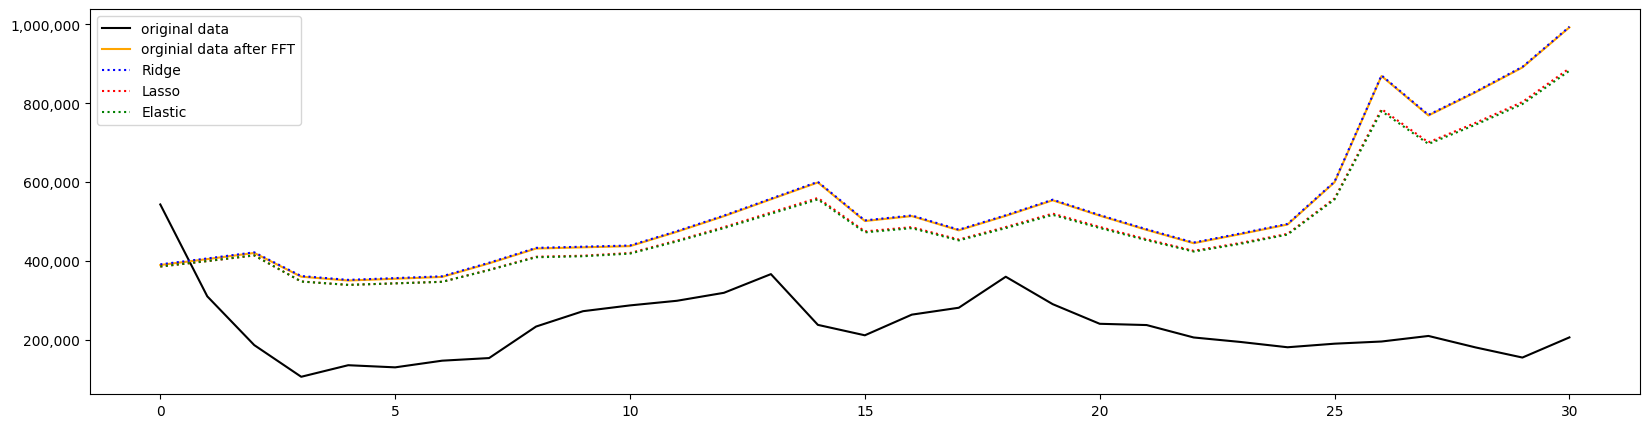

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(list(test_df['impression']), label='original data', color='black')
plt.plot(list(Y_test), label='orginial data after FFT', color='orange')
plt.plot(list(ridge_preds), label='Ridge', color='blue', linestyle='dotted')
plt.plot(list(lasso_preds), label='Lasso', color='red', linestyle='dotted')
plt.plot(list(elastic_preds), label='Elastic', color='green', linestyle='dotted')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.legend()
plt.show()

# FFT predict (노스트라다무스) -- Traffic 만

In [35]:
impression= [43054,36783,75977,90744,117439,131089,124974,144765,143323,113765,109654,105887,91234,102563,108391,88621,67058,88960,105842,108258,102127,124184,116526,123911,116656,118508,96167,98735,113361,129525,112764,110785,120490,215266,234896,258802,259676,272108,215925,222605,198378,199946,225180,210585,189657,158977,161757,117513,98994,100747,101731,101879,81783,81026,98875,152196,179602,202724,204456,220786,140845,105178,100383,113486,113564,109323,100142,173290,188048,188991,197301,204985,201362,193866,196671,215515,207774,226843,218470,193832,191085,180703,170059,175277,186072,178388,168640,175820,204935,172787,141006,119061,129092,115728,122369,111310,83735,71126,87646,99291,115156,120595,125980,117349,129885,144293,120819,106610,65925,55551,73861,91620,100201,108683,95224,97027,94066,91468,94991,102236,123312,151975,142702,157552,184089,188184,166933,139312,129266,103174,105542,109177,106066,115115,101676,87364,82614,88661,95193,97532,104465,72947,63559,72642,74012,69479,80032,89368,89054,83921,115227,114749,116546,126022,144993,139586,137589,122040,130509,123925,125040,135363,160445,173958,173032,187952,198098,199545,207158,173130,132266,133663,131414,121642,114319,139183,113252,70206,62403,55371,51137,102272,108495,105881,101988,101536,100066,103397,108955,111600,105440,100535,95030,92076,89808,91744,98640,98269,98604,93660,87588,108447,120825,133796,136639,138108,133488,134569,153555,156845,179363,177118,149063,136018,126711,143744,160454,169834,148647,152610,164471,159946,160189,165434,160472,171979,164477,154197,155405,161082,167626,162799,161846,145924,146065,146893,161929,226212,236651,180294,140289,198723,179979,61800,0,0,0,45058,51316,63816,91391,159837,186636,185049,177357,177963,178716,199503,234109,271410,243305,191002,192850,198484,213359,229479,270175,278058,198567,180824,214246,231900,207975,229029,239108,232644,168940,164950,129114,104737,123030,124451,108724,104769,84716,62002,67733,72021,101822,174625,174235,180344,188929,194662,186287,175571,159403,106042,55162,57577,61607,68107,63765,57870,57031,59733,41667,30024,16938,0,0,0,34450,27841,34662,39741,66323,61022,66594,64649,70184,79253,75789,64714,61062,63059,105327,106024,114991,109382,100782,86879,76614,79823,66139,64830,69064,52938,43872,42063,46959,84005,95007,92967,87132,73218,70515,83661,123415,128627,122554,119934,111217,110340,112575,114148,118782,125371,131558,134084,121672,133306,153608,167360,182552]
cost= [106878,103024,229032,291706,289034,293020,296588,321603,305590,296037,292130,287457,292625,304258,319301,255511,198608,194577,230018,366498,380434,420137,406162,392762,380900,390571,407999,400571,421174,404286,392618,381368,387261,778864,832954,844209,904497,1090483,994902,968094,884591,873296,951910,880951,787962,708642,676822,557745,491069,534665,510810,495974,413502,385591,504594,778173,851126,899243,985097,977463,695165,588639,600611,633738,604691,590879,588046,707484,878311,899458,953976,907919,883305,879587,877715,890735,906763,951162,913746,886486,883034,873396,886436,905740,951002,910212,884638,951950,1159517,937555,767648,473363,455085,444001,448667,446724,377714,286137,316832,446235,508527,439318,437795,436637,461052,473659,450738,441568,300305,236945,311636,384617,420774,406287,397938,392347,391865,391777,399012,421654,498535,690376,675436,684277,695766,708876,737301,632624,587649,471688,436248,437186,456970,473948,451476,439018,444462,441603,443546,455947,453028,340148,294431,305273,308063,296618,292060,306675,306852,344440,536676,508128,478694,478503,513223,491538,492185,509745,518048,501639,489931,529990,706591,785174,843068,921810,921543,966422,1006816,765937,641278,627718,629609,576213,552154,586645,460430,350104,332058,272942,240140,521197,518721,493562,491380,478596,483993,496459,519914,518577,489280,467689,441237,447377,445414,455525,474322,454078,439736,434822,441250,530410,598544,632131,596077,586950,576601,580995,616230,638057,707354,685349,490529,481531,489494,493557,512675,526603,526183,626767,634976,630364,625830,682674,681782,653917,640265,592480,637521,644092,699943,681783,640393,613071,612992,625921,711333,935647,972578,764946,623560,974880,987163,303931,0,0,0,366199,330626,282442,423298,716166,779796,749115,758143,756206,773913,903170,1069479,1200654,1140673,1052290,1054653,1074639,1131518,1152257,1300006,1259439,977963,831214,820607,830342,843455,882719,852490,833711,614929,678381,519692,350380,377075,364197,356146,355030,276642,196054,198779,209959,416552,903522,893025,907141,946843,1020116,1042333,970167,936707,648405,357077,359746,363591,388222,378165,371861,345096,342916,217080,92152,51076,0,0,0,188050,95188,98101,104555,217942,214727,213315,212268,215270,221923,209394,202409,196699,195832,424839,427597,446594,419103,405192,394264,390449,379011,247371,204281,209119,167252,147231,146558,146186,269362,274077,262470,252478,246270,244832,285034,433139,459022,472249,453104,434671,442103,443984,444109,459780,470733,454803,441110,430401,490990,594847,604616,632114]

test_impression= [218600,118928,40697,0,0,0,0,0,20469,62481,69745,82799,90793,97575,73917,80308,113352,98746,88556,66766,65288,62835,59324,60581,59736,57188,58957,63092,63921,48155,60876]
test_cost= [605162,410252,189851,0,0,0,0,0,65891,192786,193527,251526,299014,314657,248064,329063,438649,397887,350051,231093,210075,206958,198520,196882,195709,195977,195879,210221,205414,158901,204039]

preprocessed_train_df = pd.DataFrame({'impression' : impression, 'cost': cost})
preprocessed_train_df = preprocessed_train_df.drop([244, 245, 246, 309, 310, 311], axis=0).reset_index(drop=True)
preprocessed_train_df['date'] = pd.to_datetime(pd.date_range('2023-01', '2023-12-25'))

train_romand_df = preprocessed_train_df.copy()
train_df = train_romand_df.iloc[:, [0,2]]

preprocessed_test_df = pd.DataFrame({'impression' : test_impression, 'cost': test_cost})
preprocessed_test_df = preprocessed_test_df.drop([3,4,5,6,7], axis=0).reset_index(drop=True)
preprocessed_test_df['date'] = pd.to_datetime(pd.date_range('2023-12-26', '2024-01-20'))

test_romand_df = preprocessed_test_df.copy()
test_df = test_romand_df.iloc[:, [0,2]]

In [ ]:
# 우선 바로 다음날짜만 구해보는 것 시도, 노이즈 데이터 제거 할 수 있으면 베리 굿
# 끝에서부터
# import warnings; warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

train_df = train_romand_df.loc[:, ['impression', 'date']] # 처음 시작때 데이터 프레임 초기화 --> impression만 가져옴, 이후 cost 등의 데이터도 가져올 수 있음

range_days_list = list(range(3, 24+1))

prediction_excel_file_df = pd.DataFrame()                 # 예측 데이터 엑셀로 내보내기 위한 데이터 프레임
prediction_excel_file_df['date'] = pd.to_datetime(pd.date_range('2023-12-26', '2024-01-20'))
prediction_excel_file_df['test_data'] = test_romand_df['impression']

for r in tqdm(range_days_list):

  for iter in range(len(test_df)):                        # 22일치의 데이터에 대한 예측 --> 변동 가능
    # print(iter)

    # -- 유사도 측정 --
    range_days = r                                                                             # FFT로 사용할 기간 범위
    fixed_range = list(train_df['impression'].iloc[-range_days:])                              # train_df 맨끝에서부터 range_days에 대한 고정된 기간
    linear_list, fft_list, psd_list = list(), list(), list()                                   # 선형, FFT, PSD를 담아줄 리스트
    fft_df = pd.DataFrame(columns = ['linear_similarity', 'fft_similarity', 'psd_similarity']) # 위의 리스트를 데이터프레임화

    for i in range(1, len(train_df)):
      flexible_range = list(train_df['impression'].iloc[-(range_days+i):-i])                             # 하루씩 밀리는 변동되는 구간 --> "fixed range" (고정된 기간)과 FFT를 통해 유사도를 측정
      linear_similarity, fft_similarity, psd_simliarity = fft_media_expect(flexible_range, fixed_range)  # FFT 함수 적용

      linear_list.append(float(linear_similarity))    # 적용 후의 선형 유사도 --> negative가 아닌 것을 찾기 위해
      fft_list.append(float(fft_similarity))          # 적용 후의 FFT 유사도
      psd_list.append(float(psd_simliarity))          # 적용 후의 PSD 유사도

      if (len(train_df) - 1) - (range_days+i) < 0:    # range_days보다 적은 데이터를 유사도로 측정할 경우 stop
        break

    fft_df['linear_similarity'], fft_df['fft_similarity'], fft_df['psd_similarity'] = linear_list, fft_list, psd_list # 유사도 리스트들을 데이터프레임화

    # -- FFT 유사도가 가장 높고 선형 유사도는 negative가 아닌 데이터의 인덱스 찾기 --
    argsort_idx_list = list(np.argsort(list(fft_df['fft_similarity']))[::-1])                                         # np.argsort를 통해 FFT 유사도가 가장 높은 순으로 정렬
    idx = 0
    next_point_idx = 0


    while True:
      if fft_df.loc[argsort_idx_list[idx], 'linear_similarity'] > 0:
        # print('FFT 유사도: ', fft_df.loc[argsort_idx_list[idx], 'fft_similarity'])
        next_point_idx = argsort_idx_list[idx]+1
        break
      else: # 선형 유사도가 negative라면 인덱스 (idx)에 +1
        idx+=1

    current_point = train_df.loc[argsort_idx_list[idx], 'impression']          # 예측을 하기 전의 데이터 포인트
    next_point = train_df.loc[next_point_idx, 'impression']                    # 예측 후의 데이터 포인트


    # prev_momentum_ratio = (next_point - current_point) / current_point      # 유사도가 가장 높았던 선의 바로 다음 데이터 포인트의 변동률 (momentum)
    # prediction = (list(train_df['impression'])[-1])*(1+prev_momentum_ratio) # 변동률을 실제 예측하기 직전 데이터 포인트에 적용 --> 최종 예측값

    tan_momentum = next_point - current_point                               # tan 변동률
    prediction = (list(train_df['impression'])[-1])+tan_momentum

    # train_romand_df에 예측값 넣어주기
    train_df.loc[len(train_df), 'impression'] = prediction                               # 최종 예측값을 train_df 맨 뒤에 넣기
    last_day = pd.to_datetime(train_df.loc[len(train_df)-2, 'date']) + timedelta(days=1) # 최종 예측값에 다음 날짜를 적용
    train_df.loc[len(train_df)-1, 'date'] = last_day                                     # 최종 예측값에 다음 날짜를 적용 22

  # 시각화
  train_ts_df = train_df[(len(train_df) - len(test_df)):].set_index('date')
  test_ts_df = test_df.set_index('date')

  plt.figure(figsize=(20,5))
  plt.plot(train_ts_df, label='prediction', color='red', linestyle='dashed')
  plt.plot(test_ts_df, label='real', color='black')
  plt.legend()
  plt.title(f'{range_days} days of prediction')
  plt.show()

  prediction_excel_file_df[f'best_preds_{range_days}days'] = list(train_df.loc[(len(train_df) - len(test_df)):, 'impression'])

  train_df = train_romand_df.loc[:, ['impression', 'date']] # 새로운 기간 범위로 예측을 해주기 위해 데이터 다시 비워주기

In [ ]:
# excel file로 추출
prediction_excel_file_df.to_excel('노다무_V3_트래픽만_tan.xlsx', index=False)

In [ ]:
# 우선 바로 다음날짜만 구해보는 것 시도, 노이즈 데이터 제거 할 수 있으면 베리 굿
# 끝에서부터
# import warnings; warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm

train_df = train_romand_df.loc[:, ['impression', 'date']] # 처음 시작때 데이터 프레임 초기화 --> impression만 가져옴, 이후 cost 등의 데이터도 가져올 수 있음

range_days_list = list(range(3, 24+1))

prediction_excel_file_df = pd.DataFrame()                 # 예측 데이터 엑셀로 내보내기 위한 데이터 프레임
prediction_excel_file_df['date'] = pd.to_datetime(pd.date_range('2023-12-26', '2024-01-20'))
prediction_excel_file_df['test_data'] = test_romand_df['impression']

for r in tqdm(range_days_list):

  for iter in range(len(test_df)):                        # 22일치의 데이터에 대한 예측 --> 변동 가능
    # print(iter)

    # -- 유사도 측정 --
    range_days = r                                                                             # FFT로 사용할 기간 범위
    fixed_range = list(train_df['impression'].iloc[-range_days:])                              # train_df 맨끝에서부터 range_days에 대한 고정된 기간
    linear_list, fft_list, psd_list = list(), list(), list()                                   # 선형, FFT, PSD를 담아줄 리스트
    fft_df = pd.DataFrame(columns = ['linear_similarity', 'fft_similarity', 'psd_similarity']) # 위의 리스트를 데이터프레임화

    for i in range(1, len(train_df)):
      flexible_range = list(train_df['impression'].iloc[-(range_days+i):-i])                             # 하루씩 밀리는 변동되는 구간 --> "fixed range" (고정된 기간)과 FFT를 통해 유사도를 측정
      linear_similarity, fft_similarity, psd_simliarity = fft_media_expect(flexible_range, fixed_range)  # FFT 함수 적용

      linear_list.append(float(linear_similarity))    # 적용 후의 선형 유사도 --> negative가 아닌 것을 찾기 위해
      fft_list.append(float(fft_similarity))          # 적용 후의 FFT 유사도
      psd_list.append(float(psd_simliarity))          # 적용 후의 PSD 유사도

      if (len(train_df) - 1) - (range_days+i) < 0:    # range_days보다 적은 데이터를 유사도로 측정할 경우 stop
        break

    fft_df['linear_similarity'], fft_df['fft_similarity'], fft_df['psd_similarity'] = linear_list, fft_list, psd_list # 유사도 리스트들을 데이터프레임화

    # -- FFT 유사도가 가장 높고 선형 유사도는 negative가 아닌 데이터의 인덱스 찾기 --
    argsort_idx_list = list(np.argsort(list(fft_df['fft_similarity']))[::-1])                                         # np.argsort를 통해 FFT 유사도가 가장 높은 순으로 정렬
    idx = 0
    next_point_idx = 0


    while True:
      if fft_df.loc[argsort_idx_list[idx], 'linear_similarity'] > 0:
        # print('FFT 유사도: ', fft_df.loc[argsort_idx_list[idx], 'fft_similarity'])
        next_point_idx = argsort_idx_list[idx]+1
        break
      else: # 선형 유사도가 negative라면 인덱스 (idx)에 +1
        idx+=1

    current_point = train_df.loc[argsort_idx_list[idx], 'impression']          # 예측을 하기 전의 데이터 포인트
    next_point = train_df.loc[next_point_idx, 'impression']                    # 예측 후의 데이터 포인트


    prev_momentum_ratio = (next_point - current_point) / current_point      # 유사도가 가장 높았던 선의 바로 다음 데이터 포인트의 변동률 (momentum)
    prediction = (list(train_df['impression'])[-1])*(1+prev_momentum_ratio) # 변동률을 실제 예측하기 직전 데이터 포인트에 적용 --> 최종 예측값

    # new_momentum_ratio =

    # train_romand_df에 예측값 넣어주기
    train_df.loc[len(train_df), 'impression'] = prediction                               # 최종 예측값을 train_df 맨 뒤에 넣기
    last_day = pd.to_datetime(train_df.loc[len(train_df)-2, 'date']) + timedelta(days=1) # 최종 예측값에 다음 날짜를 적용
    train_df.loc[len(train_df)-1, 'date'] = last_day                                     # 최종 예측값에 다음 날짜를 적용 22

  # 시각화
  train_ts_df = train_df.set_index('date')
  test_ts_df = test_df.set_index('date')

  plt.figure(figsize=(20,5))
  plt.plot(train_ts_df, label='prediction', color='red', linestyle='dashed')
  plt.plot(test_ts_df, label='real', color='black')
  plt.legend()
  plt.title(f'{range_days} days of prediction')
  plt.show()

  prediction_excel_file_df[f'best_preds_{range_days}days'] = list(train_df.loc[(len(train_df) - len(test_df)):, 'impression'])

  train_df = train_romand_df.loc[:, ['impression', 'date']] # 새로운 기간 범위로 예측을 해주기 위해 데이터 다시 비워주기

In [ ]:
ㅠ